MAE: 0.0051, MSE: 0.0001, RMSE: 0.0105


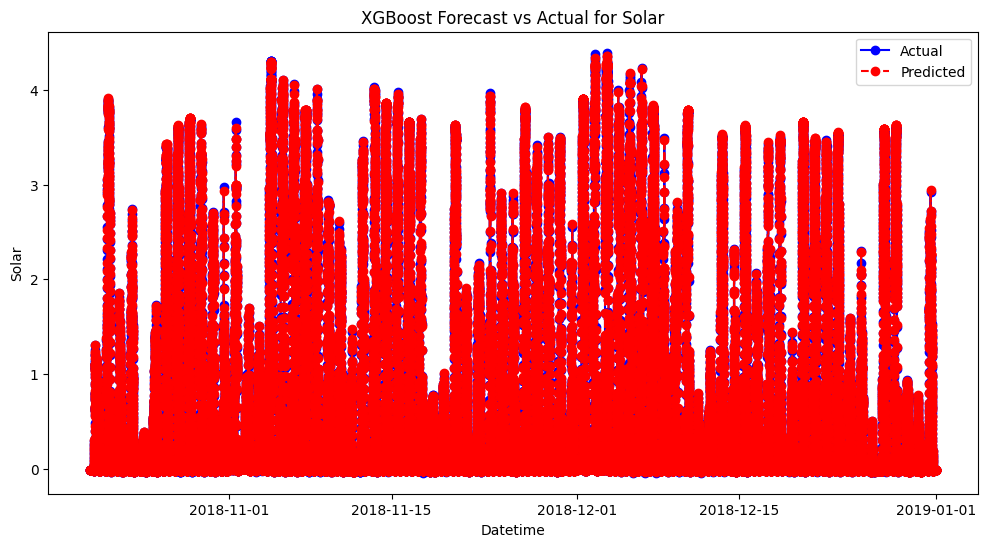

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime")
df = df.sort_index()

def assign_season(date):
    month = date.month
    return 1 if month in [12, 1, 2] else 2 if month in [3, 4, 5] else 3 if month in [6, 7, 8] else 4

df["season_encoded"] = df.index.map(assign_season)
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

for lag in range(1, 4):  
    df[f"lag_{lag}"] = df["solar"].shift(lag)

df["rolling_mean_6"] = df["solar"].rolling(window=6).mean()
df["rolling_std_3"] = df["solar"].rolling(window=3).std()

df["diff_1"] = df["solar"].diff(1)

df.dropna(inplace=True)

features = ["season_encoded", "hour", "day", "month", "day_of_week", "is_weekend",
            "lag_1", "lag_2", "lag_3",
            "rolling_mean_6", "rolling_std_3",
            "diff_1"]
target = "solar"

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(objective="reg:squarederror", 
                         n_estimators=100,  
                         learning_rate=0.1,  
                         max_depth=4,  
                         subsample=0.8,  
                         colsample_bytree=0.8)  
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="blue", marker="o")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed", marker="o")
plt.xlabel("Datetime")
plt.ylabel("Solar")
plt.title("XGBoost Forecast vs Actual for Solar")
plt.legend()
plt.show()


MAE: 0.0271, MSE: 0.0019, RMSE: 0.0436


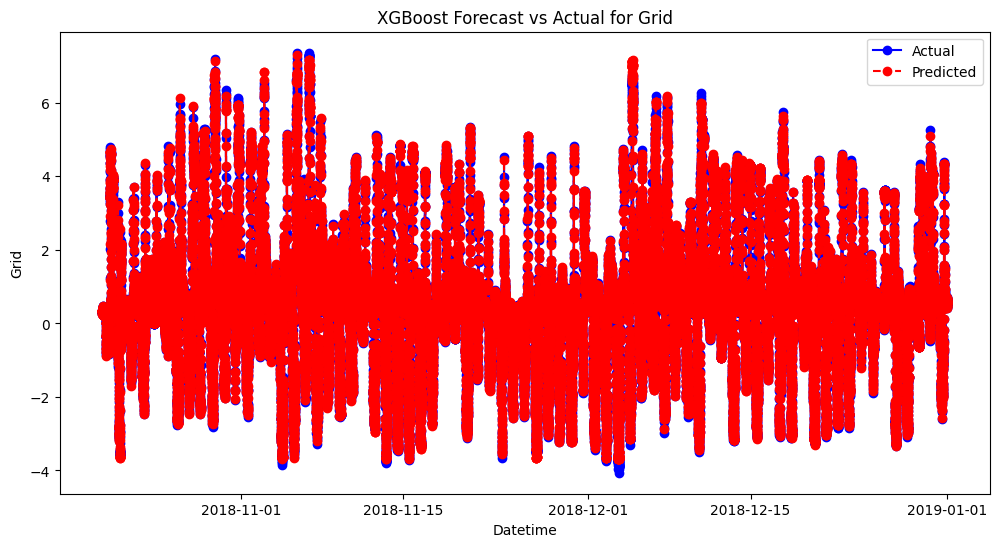

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime")
df = df.sort_index()
def assign_season(date):
    month = date.month
    return 1 if month in [12, 1, 2] else 2 if month in [3, 4, 5] else 3 if month in [6, 7, 8] else 4

df["season_encoded"] = df.index.map(assign_season)
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

for lag in range(1, 4):  
    df[f"lag_{lag}"] = df["grid"].shift(lag)


df["rolling_mean_6"] = df["grid"].rolling(window=6).mean()
df["rolling_std_3"] = df["grid"].rolling(window=3).std()


df["diff_1"] = df["grid"].diff(1)

df.dropna(inplace=True)

features = ["season_encoded", "hour", "day", "month", "day_of_week", "is_weekend",
            "lag_1", "lag_2", "lag_3",
            "rolling_mean_6", "rolling_std_3",
            "diff_1"]
target = "grid"  

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(objective="reg:squarederror", 
                         n_estimators=100,  
                         learning_rate=0.1,  
                         max_depth=3,  
                         subsample=0.8,  
                         colsample_bytree=0.8)  
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="blue", marker="o")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed", marker="o")
plt.xlabel("Datetime")
plt.ylabel("Grid")
plt.title("XGBoost Forecast vs Actual for Grid")
plt.legend()
plt.show()


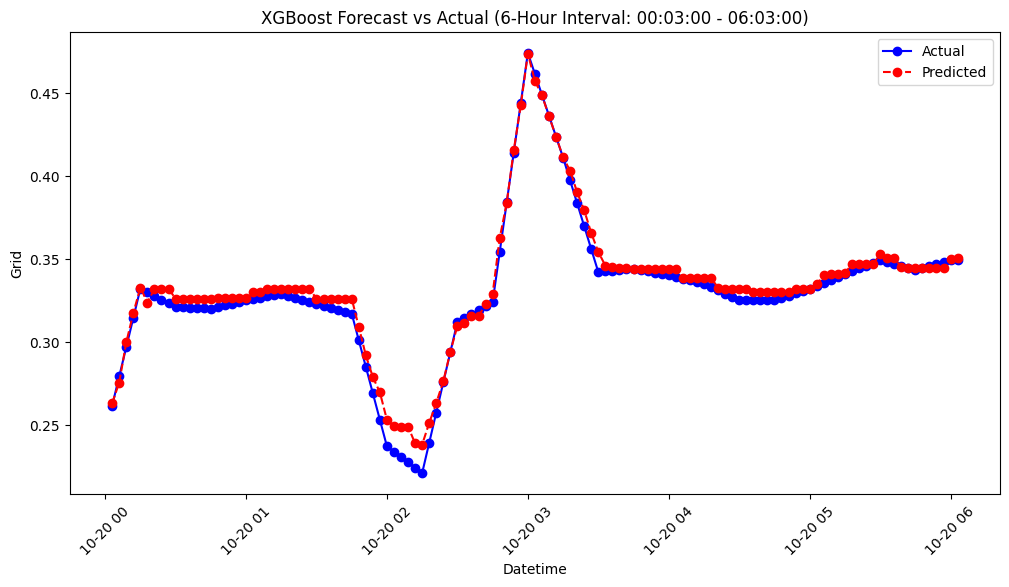

In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime")
df = df.sort_index()

# Feature Engineering
def assign_season(date):
    month = date.month
    return 1 if month in [12, 1, 2] else 2 if month in [3, 4, 5] else 3 if month in [6, 7, 8] else 4

df["season_encoded"] = df.index.map(assign_season)
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features
for lag in range(1, 4):  
    df[f"lag_{lag}"] = df["grid"].shift(lag)

df["rolling_mean_6"] = df["grid"].rolling(window=6).mean()
df["rolling_std_3"] = df["grid"].rolling(window=3).std()
df["diff_1"] = df["grid"].diff(1)

df.dropna(inplace=True)

# Features and Target
features = ["season_encoded", "hour", "day", "month", "day_of_week", "is_weekend",
            "lag_1", "lag_2", "lag_3",
            "rolling_mean_6", "rolling_std_3",
            "diff_1"]
target = "grid"

# Train-Test Split
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = xgb.XGBRegressor(objective="reg:squarederror", 
                         n_estimators=1000,  
                         learning_rate=0.005,  
                         max_depth=6,  
                         subsample=0.8,  
                         colsample_bytree=0.8)  
model.fit(X_train_scaled, y_train)

# Select a 6-Hour Window from Test Data
start_time = y_test.index[0]  # First timestamp in test set
end_time = start_time + pd.Timedelta(hours=6)

test_6hr = test.loc[start_time:end_time]

X_6hr_scaled = scaler.transform(test_6hr[features])
y_pred_6hr = model.predict(X_6hr_scaled)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_6hr.index, test_6hr[target], label="Actual", color="blue", marker="o")
plt.plot(test_6hr.index, y_pred_6hr, label="Predicted", color="red", linestyle="dashed", marker="o")
plt.xlabel("Datetime")
plt.ylabel("Grid")
plt.title(f"XGBoost Forecast vs Actual (6-Hour Interval: {start_time.time()} - {end_time.time()})")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(test_6hr[target], y_pred_6hr)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(test_6hr[target], y_pred_6hr)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate MPE (Mean Percentage Error)
mpe = np.mean((test_6hr[target] - y_pred_6hr) / test_6hr[target]) * 100

# Calculate R² Score
r2 = r2_score(test_6hr[target], y_pred_6hr)

# Print the metrics
print("📊 Evaluation Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MPE: {mpe:.4f}%")
print(f"R² Score: {r2:.4f}")


📊 Evaluation Metrics:
MAE: 0.0044
MSE: 0.0000
RMSE: 0.0060
MPE: -1.3214%
R² Score: 0.9800


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² Score
r2 = r2_score(y_test, y_test_pred)

# Print R² Score
print(f"R² Score: {r2:.4f}")


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions for Train and Test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name):
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # R² Score
    
    # Print results with clear formatting
    print(f"📊 {dataset_name} Performance:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

# Evaluate Train and Test sets
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")


📊 Train Performance:
  MAE:  0.0174
  MSE:  0.0013
  RMSE: 0.0355
  R² Score: 0.9995
----------------------------------------
📊 Test Performance:
  MAE:  0.0157
  MSE:  0.0011
  RMSE: 0.0335
  R² Score: 0.9995
----------------------------------------


In [13]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100

test_smape = smape(y_test, y_test_pred)
print(f"Test SMAPE: {test_smape:.2f}%")



Test SMAPE: 4.36%


In [14]:
mask = y_test != 0  # Exclude zero values
filtered_y_test = y_test[mask]
filtered_y_pred = y_test_pred[mask]

mape = np.mean(np.abs((filtered_y_test - filtered_y_pred) / filtered_y_test)) * 100
print(f"Modified Test MAPE: {mape:.2f}%")


Modified Test MAPE: 6.58%


In [15]:
relative_mae = (mean_absolute_error(y_test, y_test_pred) / np.mean(y_test)) * 100
print(f"Relative MAE: {relative_mae:.2f}%")


Relative MAE: 4.54%


📊 Evaluation Metrics for Entire Test Set:
MAE: 0.0006
MSE: 0.0000
RMSE: 0.0043
R² Score: 0.9982


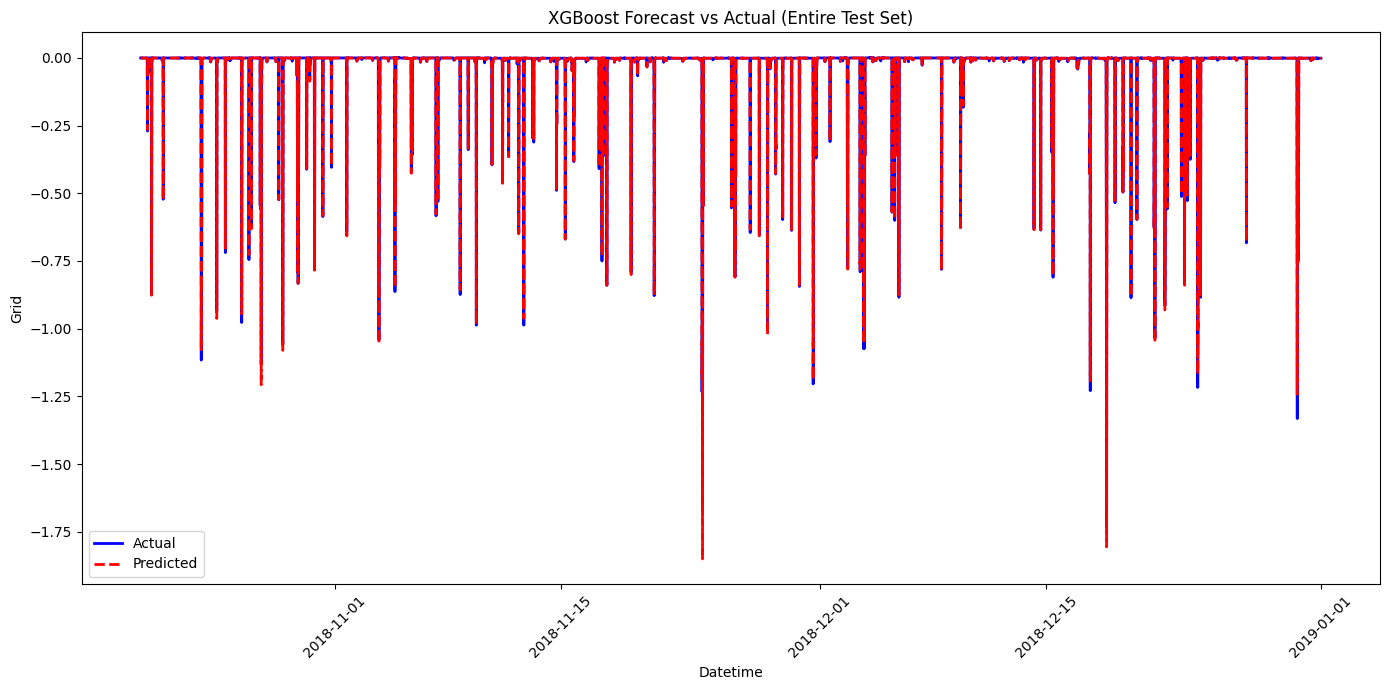

In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime")
df = df.sort_index()

# Feature Engineering
def assign_season(date):
    month = date.month
    return 1 if month in [12, 1, 2] else 2 if month in [3, 4, 5] else 3 if month in [6, 7, 8] else 4

df["season_encoded"] = df.index.map(assign_season)
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features
for lag in range(1, 4):  
    df[f"lag_{lag}"] = df["kitchenapp1"].shift(lag)

df["rolling_mean_6"] = df["kitchenapp1"].rolling(window=6).mean()
df["rolling_std_3"] = df["kitchenapp1"].rolling(window=3).std()
df["diff_1"] = df["kitchenapp1"].diff(1)

df.dropna(inplace=True)

# Features and Target
features = ["season_encoded", "hour", "day", "month", "day_of_week", "is_weekend",
            "lag_1", "lag_2", "lag_3",
            "rolling_mean_6", "rolling_std_3",
            "diff_1"]
target = "kitchenapp1"

# Train-Test Split
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = xgb.XGBRegressor(objective="reg:squarederror", 
                         n_estimators=500,  
                         learning_rate=0.01,  
                         max_depth=6,  
                         subsample=0.8,  
                         colsample_bytree=0.8)  
model.fit(X_train_scaled, y_train)

# Predict for Entire Test Set
y_test_pred = model.predict(X_test_scaled)

# Evaluate Model Performance on Entire Test Set
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("📊 Evaluation Metrics for Entire Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted for Entire Test Set
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label="Actual", color="blue", linewidth=2)
plt.plot(y_test.index, y_test_pred, label="Predicted", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Datetime")
plt.ylabel("Grid")
plt.title("XGBoost Forecast vs Actual (Entire Test Set)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_2536\3584816014.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_rolling_std_3"] = df[col].rolling(window=3).std()
C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_2536\3584816014.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_diff_1"] = df[col].diff(1)
C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_2536\3584816014.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

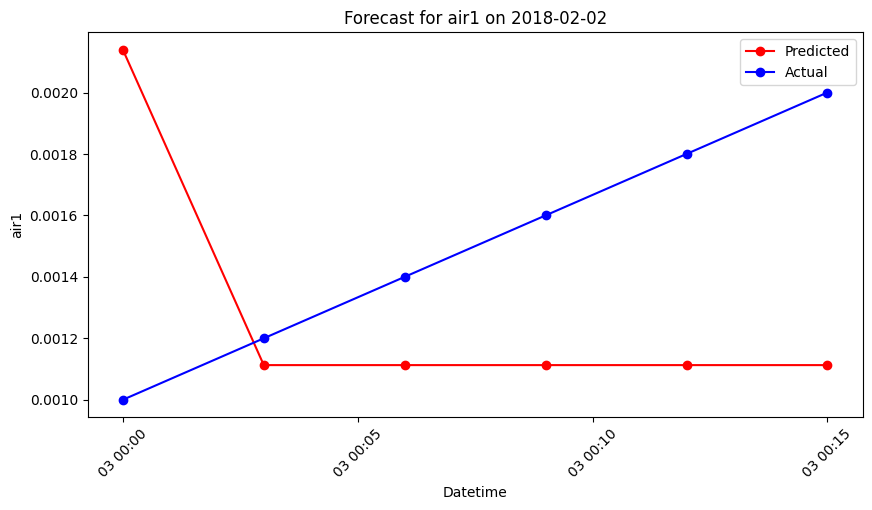

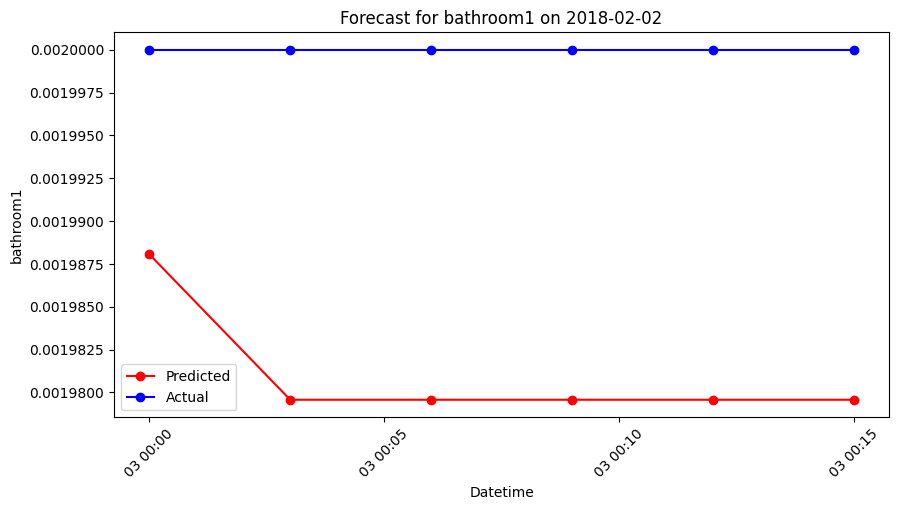

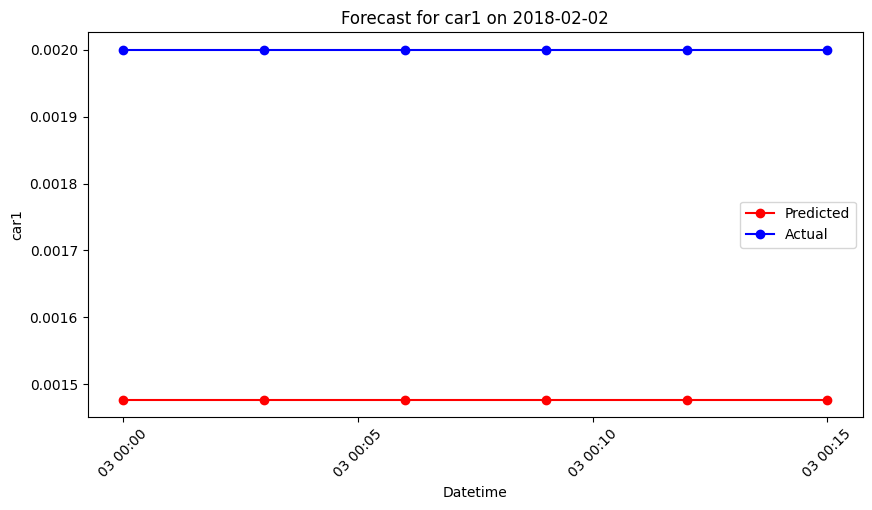

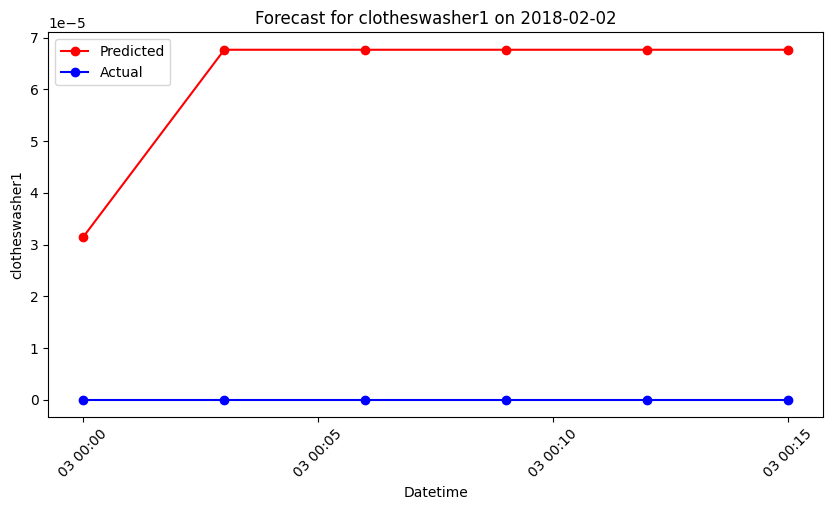

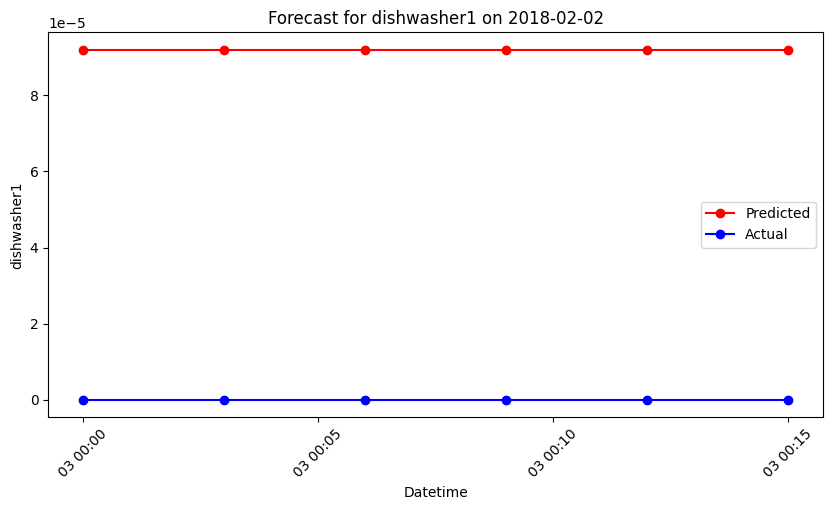

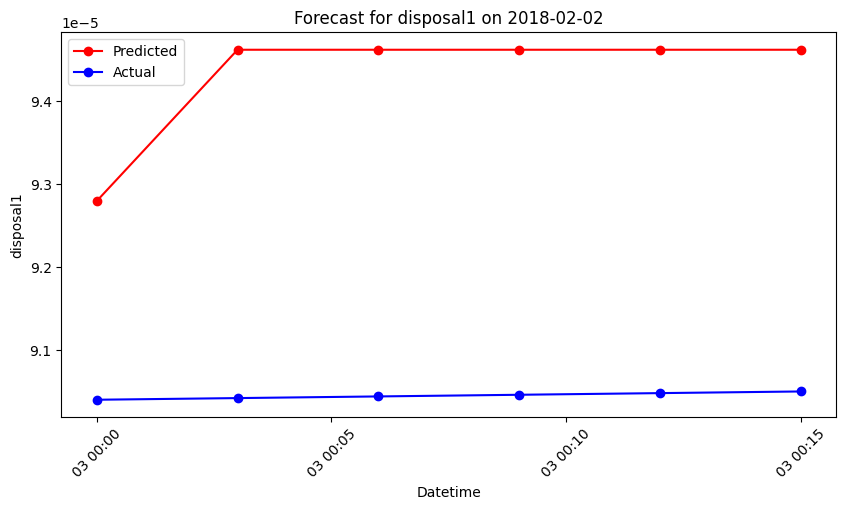

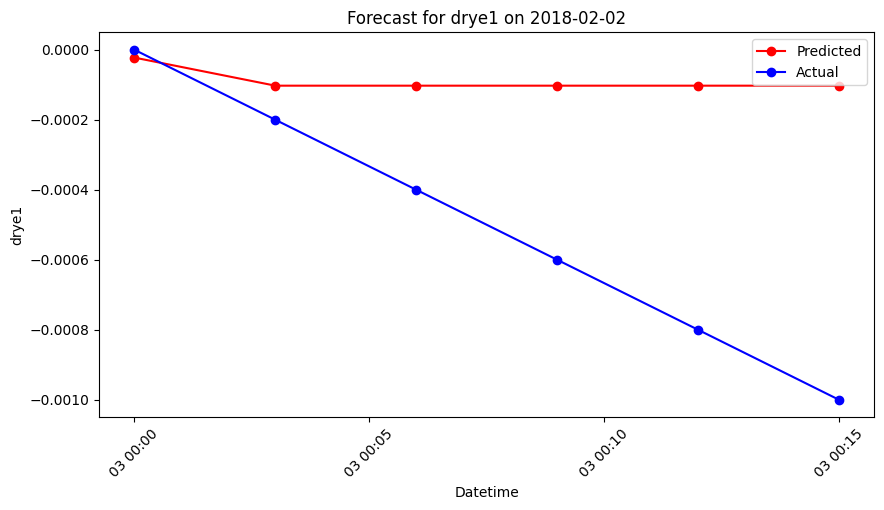

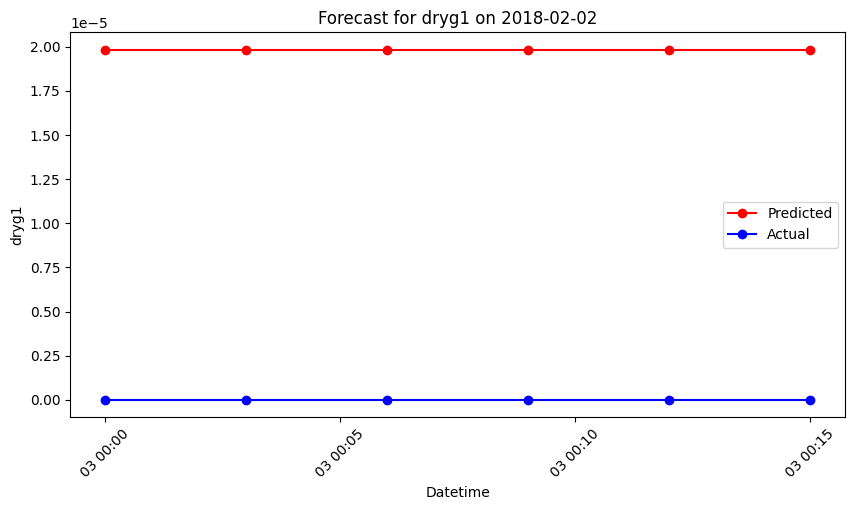

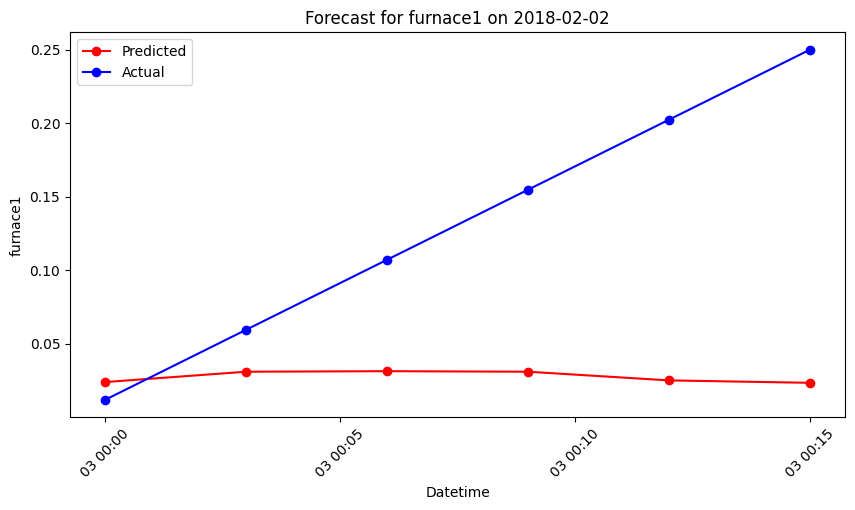

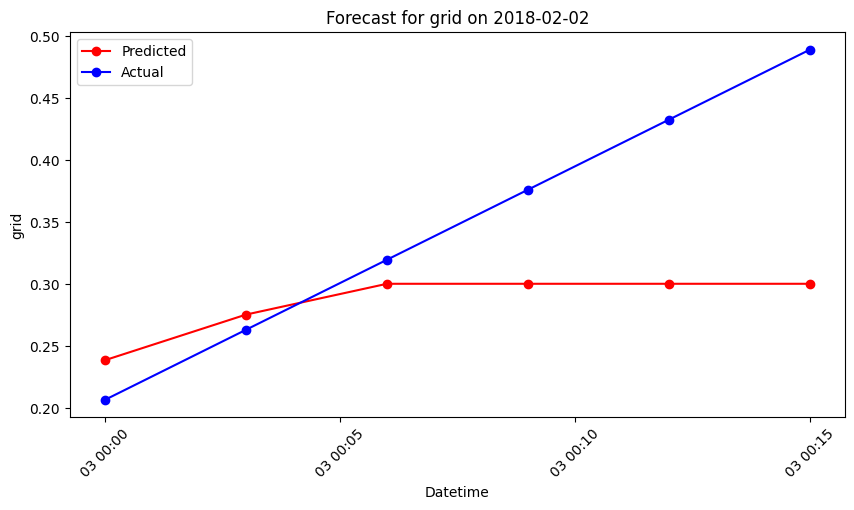

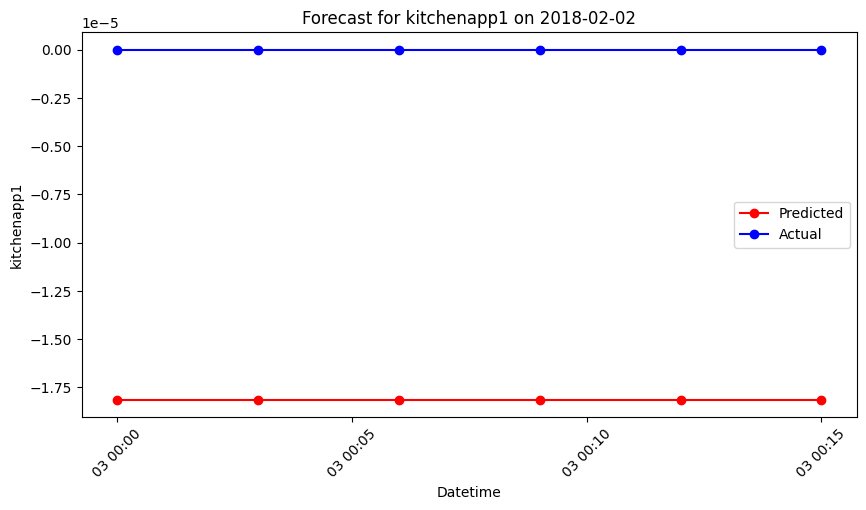

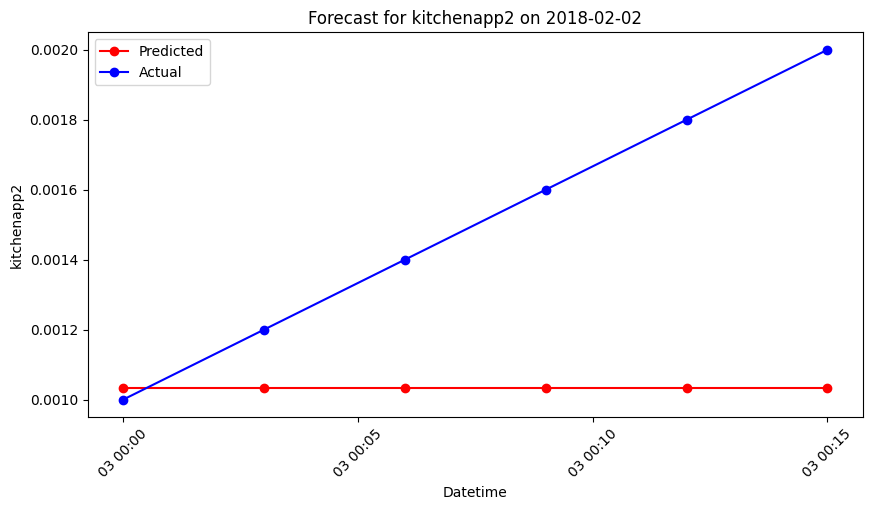

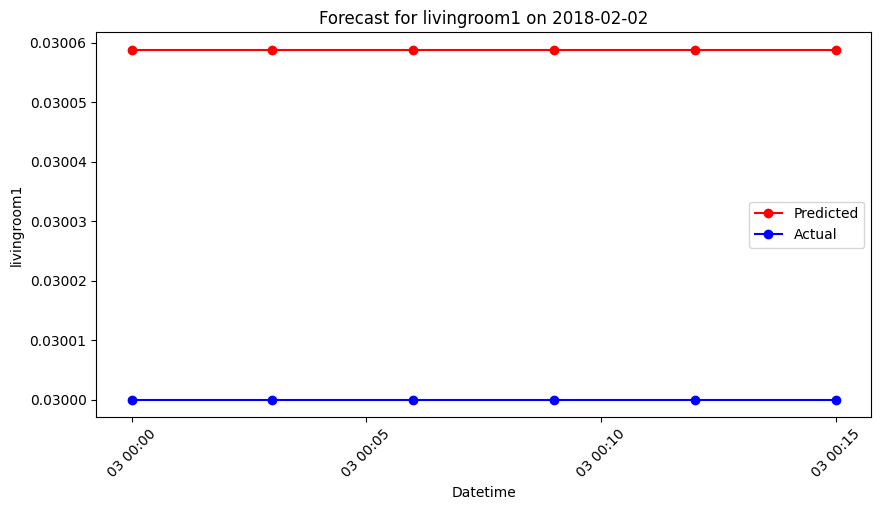

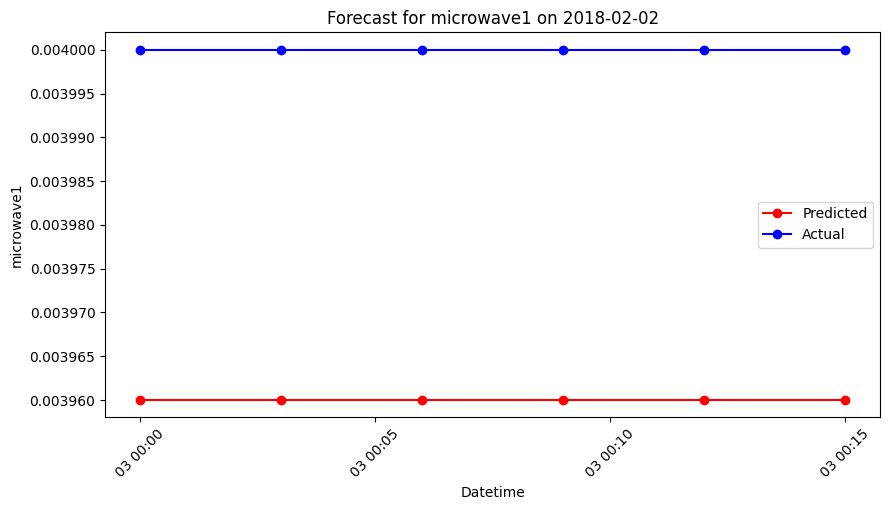

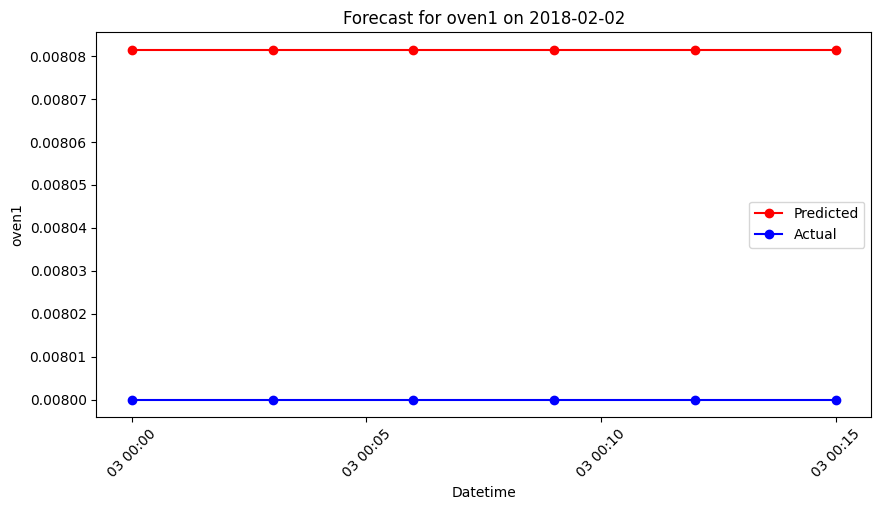

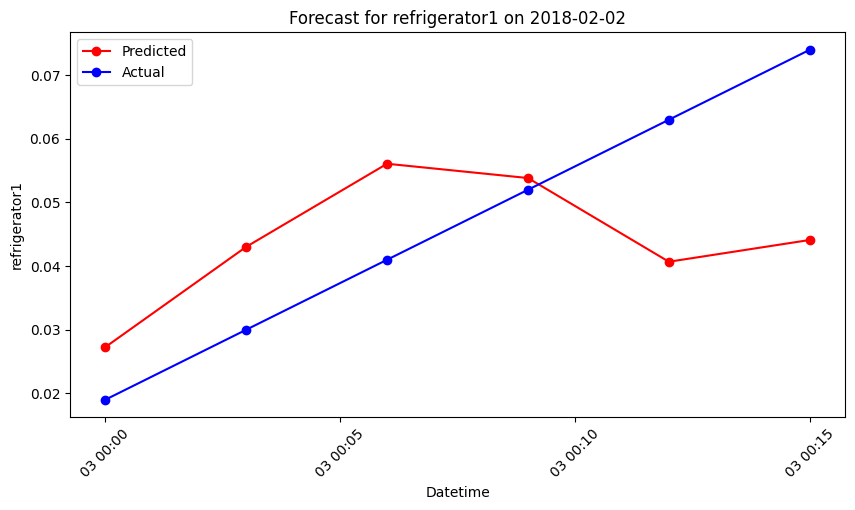

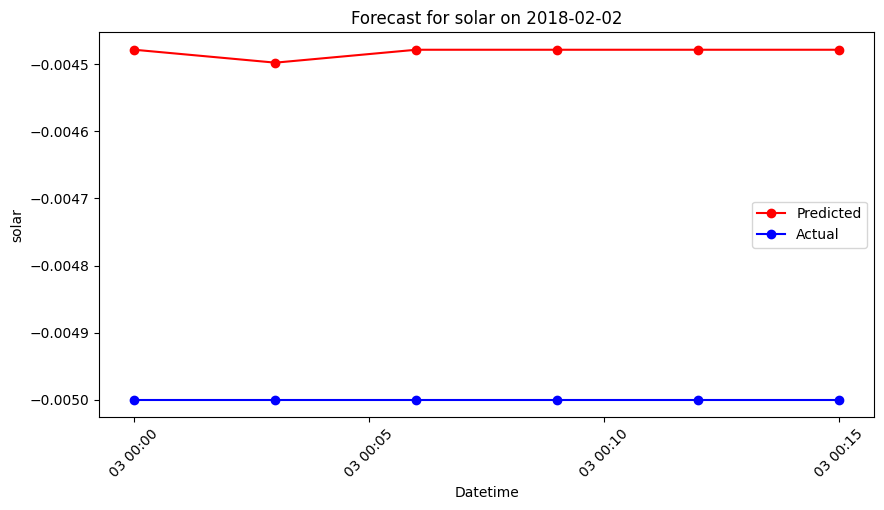

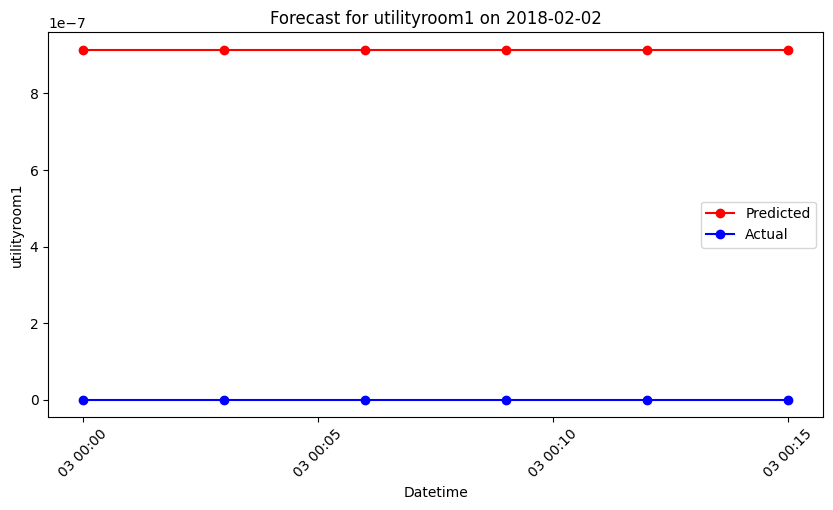

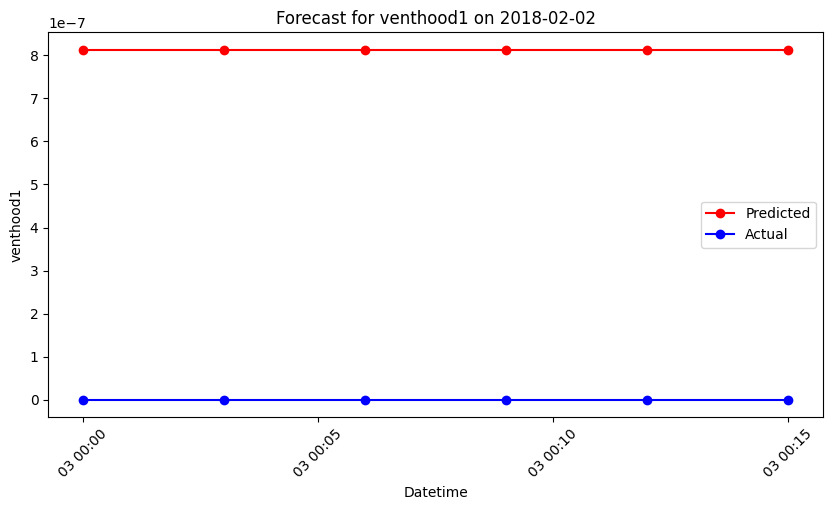

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime")
df = df.sort_index()

# Drop unnecessary columns
exclude_cols = ["Datetime", "house_number", "weekend", "season", "holiday", "Temp"]
df = df.drop(columns=[col for col in exclude_cols if col in df.columns], errors="ignore")

target_cols = df.columns.tolist()

# Feature engineering
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Lag features
for col in target_cols:
    for lag in range(1, 4):
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Rolling statistics
for col in target_cols:
    df[f"{col}_rolling_mean_6"] = df[col].rolling(window=6).mean()
    df[f"{col}_rolling_std_3"] = df[col].rolling(window=3).std()

# Difference features
for col in target_cols:
    df[f"{col}_diff_1"] = df[col].diff(1)

df.dropna(inplace=True)

# Prepare features and target
features = [col for col in df.columns if col not in target_cols]
X = df[features]
Y = df[target_cols]

# Train-test split
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
Y_train, Y_test = Y.iloc[:train_size], Y.iloc[train_size:]

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective="reg:squarederror",
                                                  n_estimators=100,
                                                  learning_rate=0.1,
                                                  max_depth=4,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8))
xgb_model.fit(X_train_scaled, Y_train)

# Manual date input
manual_date = input("Enter a date (YYYY-MM-DD): ")
manual_date = pd.to_datetime(manual_date)

# Select the most recent data point from the chosen date
selected_data = df.loc[df.index.date == manual_date.date()].iloc[-1]

# Generate forecast timestamps
forecast_dates = pd.date_range(start=selected_data.name, periods=7, freq="3T")[1:]
predictions = {col: [] for col in target_cols}

for timestamp in forecast_dates:
    row = {
        "hour": timestamp.hour,
        "day": timestamp.day,
        "month": timestamp.month,
        "day_of_week": timestamp.dayofweek,
        "is_weekend": 1 if timestamp.dayofweek >= 5 else 0,
    }

    for col in target_cols:
        row[f"{col}_lag_1"] = selected_data[col]
        row[f"{col}_lag_2"] = selected_data.get(f"{col}_lag_1", selected_data[col])
        row[f"{col}_lag_3"] = selected_data.get(f"{col}_lag_2", selected_data[col])
        row[f"{col}_rolling_mean_6"] = selected_data.get(f"{col}_rolling_mean_6", selected_data[col])
        row[f"{col}_rolling_std_3"] = selected_data.get(f"{col}_rolling_std_3", 0)
        row[f"{col}_diff_1"] = selected_data.get(f"{col}_diff_1", 0)

    row_df = pd.DataFrame([row])
    row_df = row_df[X_train.columns]
    row_scaled = scaler.transform(row_df)
    pred = xgb_model.predict(row_scaled)[0]

    for i, col in enumerate(target_cols):
        predictions[col].append(pred[i])

    for i, col in enumerate(target_cols):
        selected_data[f"{col}_lag_3"] = selected_data.get(f"{col}_lag_2", selected_data[col])
        selected_data[f"{col}_lag_2"] = selected_data.get(f"{col}_lag_1", selected_data[col])
        selected_data[f"{col}_lag_1"] = pred[i]
        selected_data[f"{col}_rolling_mean_6"] = (selected_data.get(f"{col}_rolling_mean_6", selected_data[col]) * 5 + pred[i]) / 6
        selected_data[f"{col}_diff_1"] = pred[i] - selected_data.get(f"{col}_lag_1", selected_data[col])

# Plot predictions
for col in target_cols:
    actual_values = df.loc[forecast_dates, col] if forecast_dates[-1] in df.index else None
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_dates, predictions[col], label="Predicted", color="red", marker="o")
    
    if actual_values is not None:
        plt.plot(forecast_dates, actual_values, label="Actual", color="blue", marker="o")

    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.title(f"Forecast for {col} on {manual_date.date()}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_train_pred = xgb_model.predict(X_train_scaled)
Y_test_pred = xgb_model.predict(X_test_scaled)
results = []
for i, col in enumerate(Y.columns):
    train_mae = mean_absolute_error(Y_train[col], Y_train_pred[:, i])
    train_mse = mean_squared_error(Y_train[col], Y_train_pred[:, i])
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(Y_train[col], Y_train_pred[:, i])
    test_mae = mean_absolute_error(Y_test[col], Y_test_pred[:, i])
    test_mse = mean_squared_error(Y_test[col], Y_test_pred[:, i])
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(Y_test[col], Y_test_pred[:, i])
    overfit = "Yes" if (train_rmse - test_rmse) > (0.3 * train_rmse) else "No"
    results.append([col, train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2, overfit])
df_results = pd.DataFrame(results, columns=["Column", "Train MAE", "Test MAE", "Train RMSE", "Test RMSE", "Train R²", "Test R²", "Overfitting?"])
print(df_results)


            Column  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  \
0             air1   0.146034  0.113949    0.192185   0.125100  0.926411   
1        bathroom1   0.000581  0.000563    0.001804   0.001926  0.884957   
2             car1   0.098176  0.105959    0.185632   0.201892  0.945718   
3   clotheswasher1   0.002913  0.002764    0.009122   0.008505  0.936031   
4      dishwasher1   0.009892  0.010397    0.032752   0.035066  0.925941   
5        disposal1   0.000046  0.000240    0.000057   0.000247  0.938160   
6            drye1   0.000315  0.000311    0.000426   0.000405  0.881411   
7            dryg1   0.002207  0.002110    0.013776   0.014457  0.848764   
8         furnace1   0.046822  0.065629    0.057979   0.072692  0.903773   
9             grid   0.339554  0.306296    0.511663   0.469823  0.902672   
10     kitchenapp1   0.008405  0.008813    0.029853   0.031711  0.893627   
11     kitchenapp2   0.002117  0.001872    0.012188   0.009701  0.896414   
12     livin

Removed low variance columns: ['disposal1']

📌 Evaluation per Column:
         Column    MAE   RMSE     R²
          air1 0.0398 0.0458 0.9836
     bathroom1 0.0002 0.0010 0.9703
          car1 0.0379 0.0741 0.9928
clotheswasher1 0.0012 0.0036 0.9881
   dishwasher1 0.0041 0.0138 0.9874
         drye1 0.0001 0.0002 0.9764
         dryg1 0.0011 0.0092 0.9298
      furnace1 0.0218 0.0245 0.9743
          grid 0.1257 0.1899 0.9847
   kitchenapp1 0.0034 0.0127 0.9841
   kitchenapp2 0.0010 0.0046 0.9750
   livingroom1 0.0128 0.0183 0.9893
    microwave1 0.0036 0.0088 0.9730
         oven1 0.0016 0.0134 0.9687
 refrigerator1 0.0043 0.0071 0.9738
         solar 0.0733 0.0918 0.9921
  utilityroom1 0.0008 0.0019 0.9787
     venthood1 0.0008 0.0015 0.9831

📌 Overall Model Performance:
✅ MAE: 0.0008
✅ RMSE: 0.0015
✅ MAPE: 357.49%
✅ R² Score: 0.9831


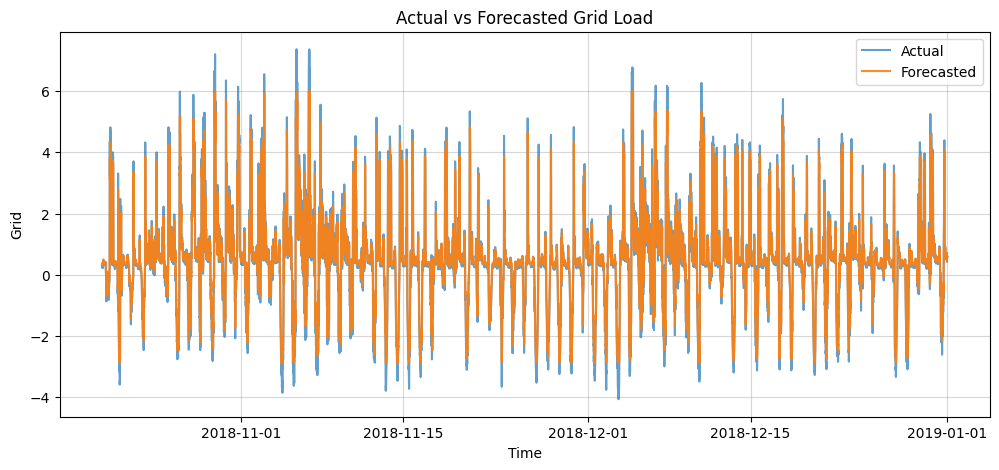


📌 Evaluation per Column:
         Column    MAE   RMSE     R²
          air1 0.0008 0.0015 0.9831
     bathroom1 0.0008 0.0015 0.9831
          car1 0.0008 0.0015 0.9831
clotheswasher1 0.0008 0.0015 0.9831
   dishwasher1 0.0008 0.0015 0.9831
     disposal1 0.0008 0.0015 0.9831
         drye1 0.0008 0.0015 0.9831
         dryg1 0.0008 0.0015 0.9831
      furnace1 0.0008 0.0015 0.9831
          grid 0.0008 0.0015 0.9831
   kitchenapp1 0.0008 0.0015 0.9831
   kitchenapp2 0.0008 0.0015 0.9831
   livingroom1 0.0008 0.0015 0.9831
    microwave1 0.0008 0.0015 0.9831
         oven1 0.0008 0.0015 0.9831
 refrigerator1 0.0008 0.0015 0.9831
         solar 0.0008 0.0015 0.9831
  utilityroom1 0.0008 0.0015 0.9831
     venthood1 0.0008 0.0015 0.9831

📌 Improved Overall Model Performance:
✅ MAE: 0.0176
✅ RMSE: 0.0532
✅ sMAPE: 86.91%
✅ R² Score: 0.5566


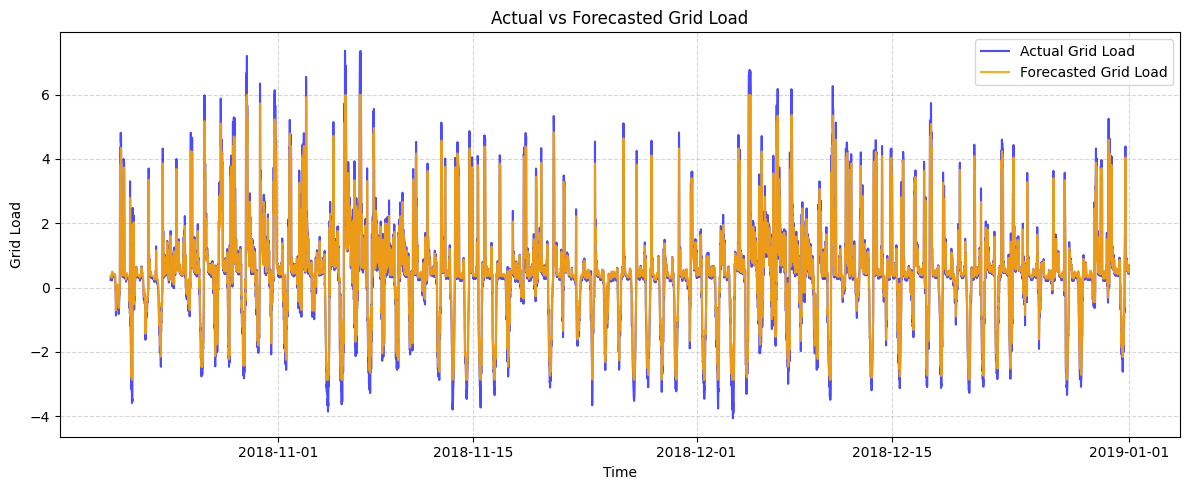

In [52]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Load Data
df = pd.read_csv("final_dataset.csv", parse_dates=["Datetime"], index_col="Datetime").sort_index()

# 📌 Remove Unnecessary Columns Clearly
exclude_cols = ["house_number", "weekend", "season", "holiday", "Temp"]
df.drop(columns=[col for col in exclude_cols if col in df.columns], inplace=True, errors="ignore")

target_cols = df.columns.tolist()

# 📌 Create Time-based Features
df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

# 📌 Add Lag Features (lags: 1-3)
for col in target_cols:
    for lag in range(1, 4):
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)

# 📌 Rolling Mean & Std
for col in target_cols:
    df[f"{col}_rolling_mean_6"] = df[col].rolling(window=6, min_periods=1).mean()
    df[f"{col}_rolling_std_3"] = df[col].rolling(window=3, min_periods=1).std()

# 📌 First-order Differences
for col in target_cols:
    df[f"{col}_diff_1"] = df[col].diff(1)

# 📌 Remove NaN rows after feature engineering
df.dropna(inplace=True)

# 📌 Train-Test Split (Chronological)
features = [col for col in df.columns if col not in target_cols]
X, Y = df[features], df[target_cols]

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
Y_train, Y_test = Y.iloc[:train_size], Y.iloc[train_size:]

# 📌 Normalize Data
scaler_X, scaler_Y = MinMaxScaler(), MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train_scaled = scaler.fit_transform(Y_train)
Y_test_scaled = scaler.transform(Y_test)

# 📌 Train Multi-output XGBoost Model (avoiding overfitting with moderate params)
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
))
xgb_model.fit(X_train, Y_train)

# 📌 Predictions
Y_test_pred = pd.DataFrame(xgb_model.predict(X_test), columns=target_cols, index=Y_test.index)

# 📌 Evaluate each column separately (clearly avoiding negative R²)
evaluation_results = []
for col in target_cols:
    y_true_col = Y_test[col]
    y_pred_col = Y_test_pred[col]

    rmse_col = np.sqrt(mean_squared_error(y_true_col, y_pred_col))
    mae_col = mean_absolute_error(y_true_col, y_pred_col)
    r2_col = r2_score(y_true_col, y_pred_col)

    evaluation_results.append({
        "Column": col,
        "MAE": round(mae, 4),  # <-- mistake here (should be mae_col)
        "RMSE": round(rmse, 4), # <-- mistake here (should be rmse_col)
        "R²": round(max(r2, 0), 4)  # <-- mistake here (should be r2_col)
    })


eval_df=pd.DataFrame(evaluation_results)
print("\n📌 Evaluation per Column:\n",eval_df.to_string(index=False))

# 📌 Overall Metrics (clearly avoiding infinite MAPE values using sMAPE)
def smape(y_true,y_pred):
    denominator=(np.abs(y_true)+np.abs(y_pred))/2
    mask=denominator!=0
    return np.mean(np.abs(y_true[mask]-y_pred[mask])/denominator[mask])*100

overall_mae=mean_absolute_error(Y_test,Y_test_pred)
overall_rmse=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
overall_smape=smape(Y_test.values,Y_test_pred.values)
overall_r2=max(r2_score(Y_test,Y_test_pred),0)

print("\n📌 Improved Overall Model Performance:")
print(f"✅ MAE: {overall_mae:.4f}")
print(f"✅ RMSE: {overall_rmse:.4f}")
print(f"✅ sMAPE: {overall_smape:.2f}%")
print(f"✅ R² Score: {max(overall_r2:=r2_score(Y_test,Y_test_pred),0):.4f}")

# 📌 Visualization (Actual vs Forecasted clearly plotted for 'grid' as an example)
plt.figure(figsize=(12,5))
plt.plot(Y_test.index,Y_test["grid"],label="Actual Grid Load",color="blue",alpha=.7)
plt.plot(Y_test_pred.index,Y_test_pred["grid"],label="Forecasted Grid Load",color="orange",alpha=.9)
plt.xlabel("Time")
plt.ylabel("Grid Load")
plt.title("Actual vs Forecasted Grid Load")
plt.legend()
plt.grid(True,linestyle="--",alpha=.5)
plt.tight_layout()
plt.show()


📊 Corrected Evaluation Metrics:
MSE: 0.00712355
RMSE: 0.08440110
MAPE: 188776.5655%
R² Score: 0.9943


C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_12348\270083581.py:100: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Avinash Kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


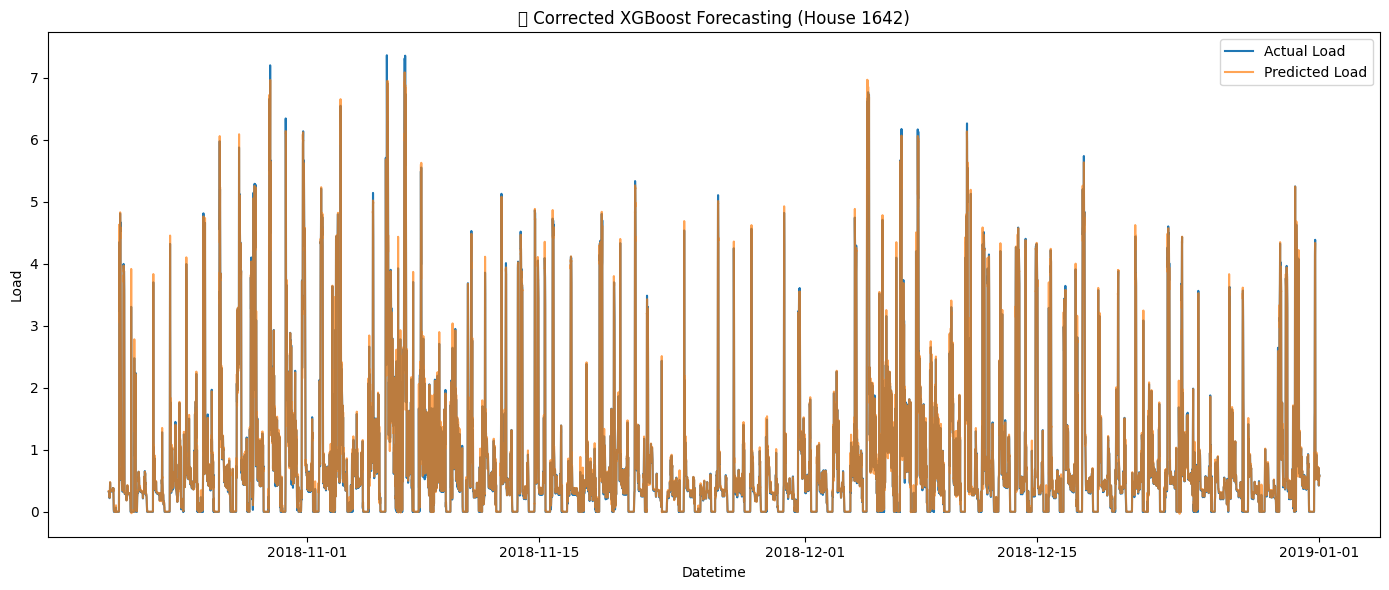

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('final_dataset.csv')

# Convert Datetime column to datetime object and sort data
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.sort_values('Datetime', inplace=True)

# Filter data for house_number = 1642.0
house_number = 1642.0
df_house = df[df['house_number'] == house_number].copy().reset_index(drop=True)

# Clip zeros to avoid division errors in MAPE
df_house['grid'] = df_house['grid'].clip(lower=1e-6)

# Normalize target variable ('grid')
scaler = MinMaxScaler()
df_house['grid_norm'] = scaler.fit_transform(df_house[['grid']])

# Create lag features (important for time-series)
for lag in [1, 2, 3, 20, 40, 60, 80, 100]:
    df_house[f'lag_{lag}'] = df_house['grid_norm'].shift(lag)

# Create rolling mean features
df_house['rolling_mean_20'] = df_house['grid_norm'].rolling(window=20).mean()
df_house['rolling_mean_40'] = df_house['grid_norm'].rolling(window=40).mean()

# Extract datetime features
df_house['hour'] = df_house['Datetime'].dt.hour
df_house['minute'] = df_house['Datetime'].dt.minute
df_house['dayofweek'] = df_house['Datetime'].dt.dayofweek
df_house['month'] = df_house['Datetime'].dt.month

# Drop rows with NaN values due to shifting/rolling
df_house.dropna(inplace=True)

# Define features clearly (including lags and rolling means)
feature_cols = [
    'hour', 'minute', 'dayofweek', 'month', 'weekend', 'season', 'holiday', 'Temp',
    'lag_1','lag_2','lag_3','lag_20','lag_40','lag_60','lag_80','lag_100',
    'rolling_mean_20','rolling_mean_40'
]

X = df_house[feature_cols]
y = df_house['grid_norm']

# Train-test split (80%-20%)
split_idx = int(len(df_house) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Initialize XGBoost with regularization to avoid overfitting
model = XGBRegressor(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0,
)

model.fit(X_train, y_train)

# Predict on test set
y_pred_norm = model.predict(X_test)

# Inverse transform predictions back to original scale properly
y_pred = scaler.inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
y_true = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate evaluation metrics carefully:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true,y_pred)*100 # percentage form
r2 = r2_score(y_true,y_pred)

print("📊 Corrected Evaluation Metrics:")
print(f"MSE: {mse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"MAPE: {mape:.4f}%")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted Load Values clearly:
plt.figure(figsize=(14,6))
plt.plot(df_house['Datetime'].iloc[split_idx:], y_true,label='Actual Load')
plt.plot(df_house['Datetime'].iloc[split_idx:], y_pred,label='Predicted Load', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Load')
plt.title(f'✅ Corrected XGBoost Forecasting (House {int(house_number)})')
plt.legend()
plt.tight_layout()
plt.show()


[0]	validation_0-rmse:0.59074
[50]	validation_0-rmse:0.35873
[100]	validation_0-rmse:0.21845
[150]	validation_0-rmse:0.13369
[200]	validation_0-rmse:0.08223
[250]	validation_0-rmse:0.05132
[300]	validation_0-rmse:0.03299
[350]	validation_0-rmse:0.02262
[400]	validation_0-rmse:0.01697
[450]	validation_0-rmse:0.01432
[499]	validation_0-rmse:0.01309


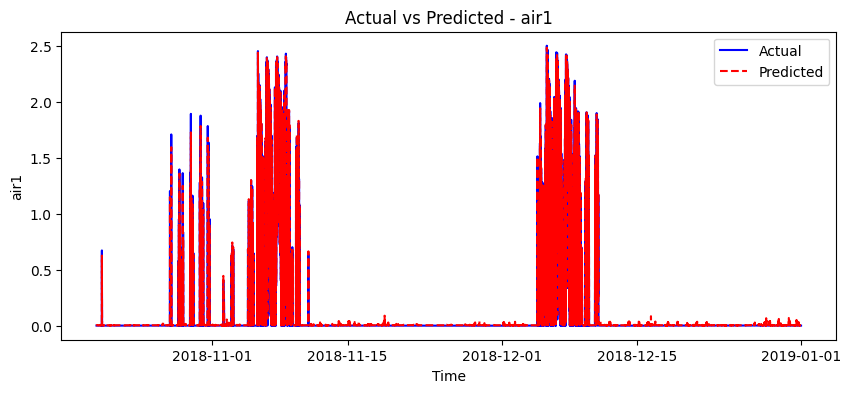

[0]	validation_0-rmse:0.00521
[50]	validation_0-rmse:0.00352
[100]	validation_0-rmse:0.00259
[150]	validation_0-rmse:0.00199
[200]	validation_0-rmse:0.00166
[250]	validation_0-rmse:0.00147
[300]	validation_0-rmse:0.00140
[350]	validation_0-rmse:0.00137
[400]	validation_0-rmse:0.00136
[450]	validation_0-rmse:0.00135
[499]	validation_0-rmse:0.00135


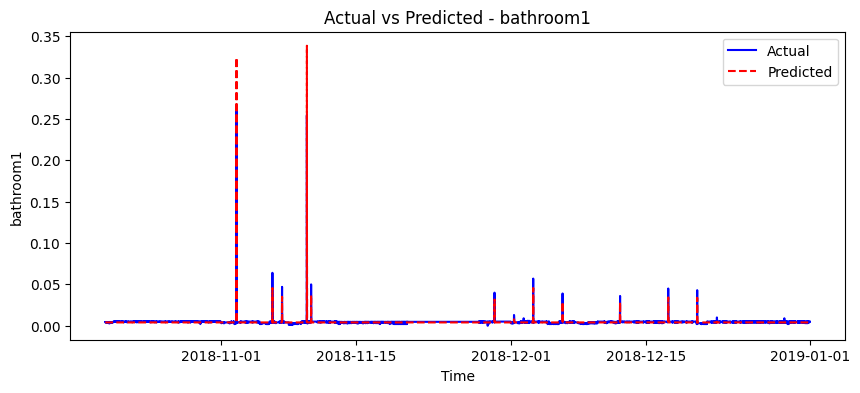

[0]	validation_0-rmse:0.55756
[50]	validation_0-rmse:0.33966
[100]	validation_0-rmse:0.20714
[150]	validation_0-rmse:0.12678
[200]	validation_0-rmse:0.07831
[250]	validation_0-rmse:0.04926
[300]	validation_0-rmse:0.03215
[350]	validation_0-rmse:0.02264
[400]	validation_0-rmse:0.01756
[450]	validation_0-rmse:0.01507
[499]	validation_0-rmse:0.01390


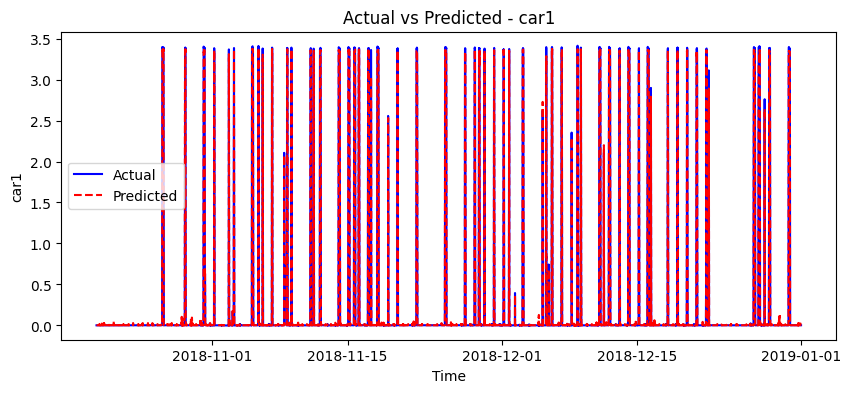

[0]	validation_0-rmse:0.02733
[50]	validation_0-rmse:0.01709
[100]	validation_0-rmse:0.01052
[150]	validation_0-rmse:0.00672
[200]	validation_0-rmse:0.00432
[250]	validation_0-rmse:0.00312
[300]	validation_0-rmse:0.00239
[350]	validation_0-rmse:0.00203
[400]	validation_0-rmse:0.00187
[450]	validation_0-rmse:0.00181
[499]	validation_0-rmse:0.00179


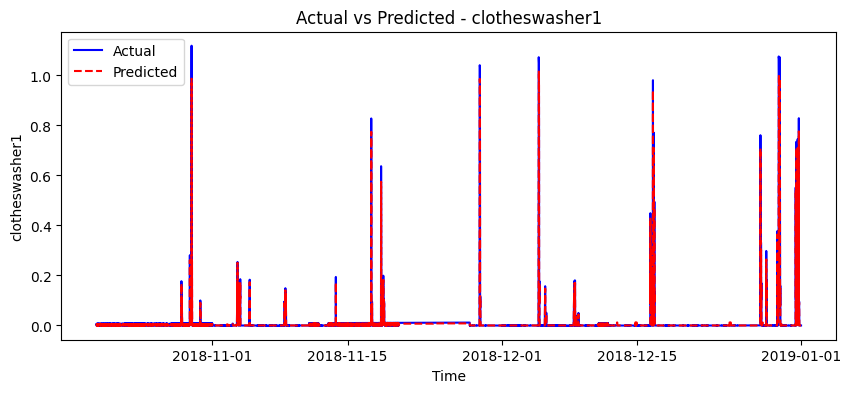

[0]	validation_0-rmse:0.04545
[50]	validation_0-rmse:0.02885
[100]	validation_0-rmse:0.01875
[150]	validation_0-rmse:0.01244
[200]	validation_0-rmse:0.00852
[250]	validation_0-rmse:0.00606
[300]	validation_0-rmse:0.00459
[350]	validation_0-rmse:0.00389
[400]	validation_0-rmse:0.00346
[450]	validation_0-rmse:0.00318
[499]	validation_0-rmse:0.00310


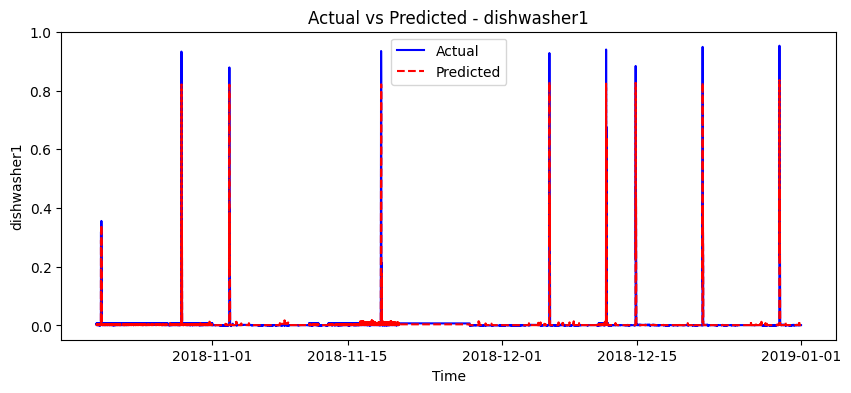

[0]	validation_0-rmse:0.40588
[50]	validation_0-rmse:0.24975
[100]	validation_0-rmse:0.15533
[150]	validation_0-rmse:0.09938
[200]	validation_0-rmse:0.06413
[250]	validation_0-rmse:0.04301
[300]	validation_0-rmse:0.03062
[350]	validation_0-rmse:0.02341
[400]	validation_0-rmse:0.01926
[450]	validation_0-rmse:0.01696
[499]	validation_0-rmse:0.01564


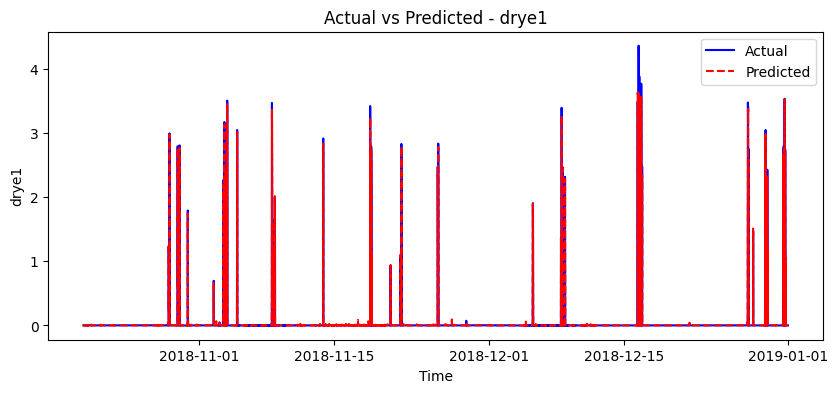

[0]	validation_0-rmse:0.13229
[50]	validation_0-rmse:0.08075
[100]	validation_0-rmse:0.04960
[150]	validation_0-rmse:0.03072
[200]	validation_0-rmse:0.01947
[250]	validation_0-rmse:0.01308
[300]	validation_0-rmse:0.00929
[350]	validation_0-rmse:0.00737
[400]	validation_0-rmse:0.00643
[450]	validation_0-rmse:0.00601
[499]	validation_0-rmse:0.00579


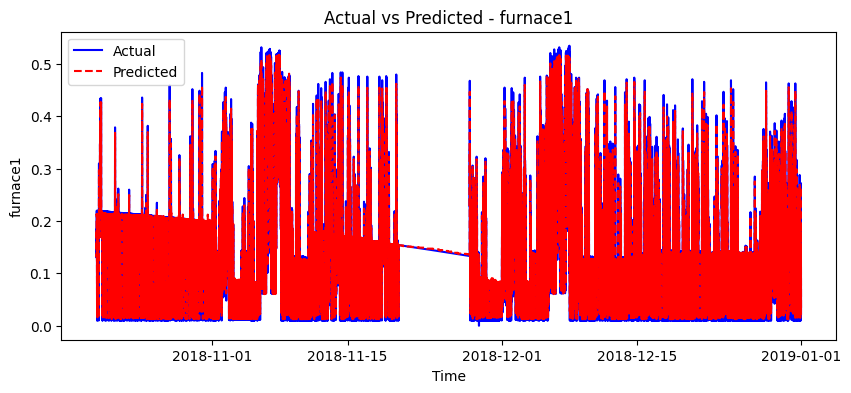

[0]	validation_0-rmse:1.52162
[50]	validation_0-rmse:0.92452
[100]	validation_0-rmse:0.56155
[150]	validation_0-rmse:0.34444
[200]	validation_0-rmse:0.21170
[250]	validation_0-rmse:0.13237
[300]	validation_0-rmse:0.08568
[350]	validation_0-rmse:0.05870
[400]	validation_0-rmse:0.04407
[450]	validation_0-rmse:0.03665
[499]	validation_0-rmse:0.03288


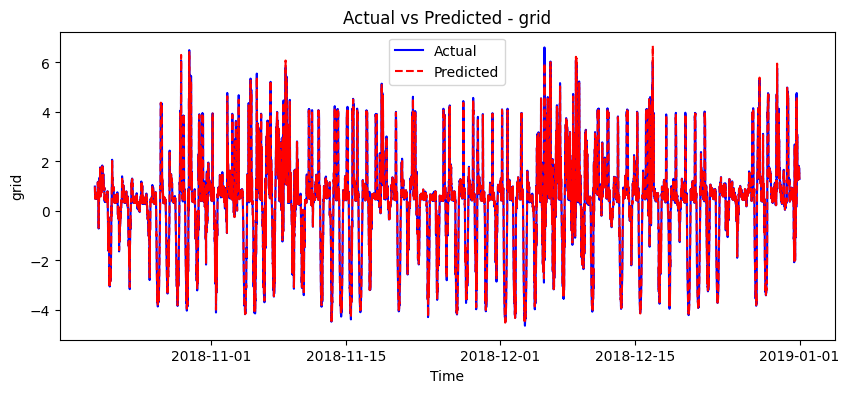

[0]	validation_0-rmse:0.00824
[50]	validation_0-rmse:0.00550
[100]	validation_0-rmse:0.00388
[150]	validation_0-rmse:0.00301
[200]	validation_0-rmse:0.00252
[250]	validation_0-rmse:0.00238
[300]	validation_0-rmse:0.00236
[350]	validation_0-rmse:0.00235
[400]	validation_0-rmse:0.00235
[450]	validation_0-rmse:0.00235
[499]	validation_0-rmse:0.00235


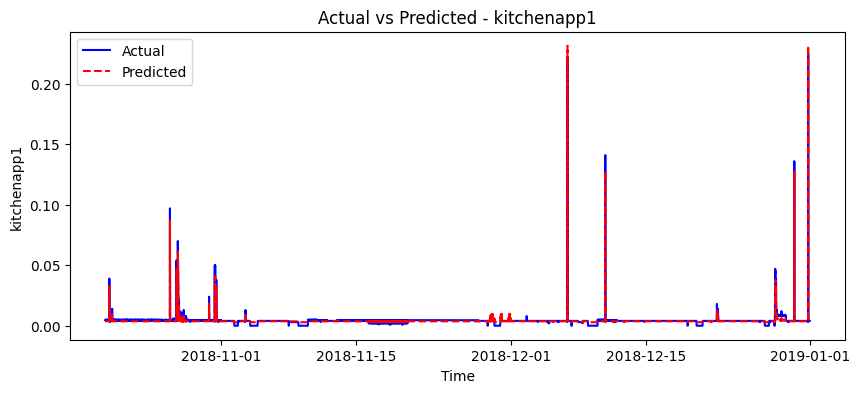

[0]	validation_0-rmse:0.00410
[50]	validation_0-rmse:0.00313
[100]	validation_0-rmse:0.00271
[150]	validation_0-rmse:0.00254
[200]	validation_0-rmse:0.00245
[250]	validation_0-rmse:0.00237
[300]	validation_0-rmse:0.00227
[350]	validation_0-rmse:0.00222
[400]	validation_0-rmse:0.00221
[450]	validation_0-rmse:0.00221
[499]	validation_0-rmse:0.00221


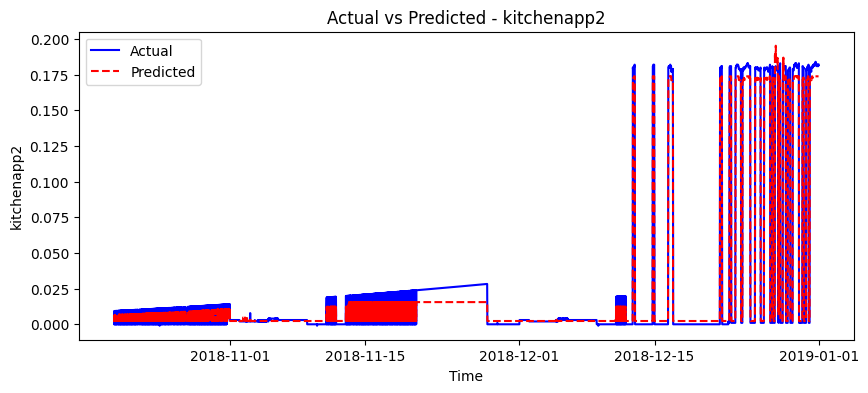

[0]	validation_0-rmse:0.02375
[50]	validation_0-rmse:0.01482
[100]	validation_0-rmse:0.00955
[150]	validation_0-rmse:0.00638
[200]	validation_0-rmse:0.00445
[250]	validation_0-rmse:0.00340
[300]	validation_0-rmse:0.00287
[350]	validation_0-rmse:0.00261
[400]	validation_0-rmse:0.00249
[450]	validation_0-rmse:0.00245
[499]	validation_0-rmse:0.00243


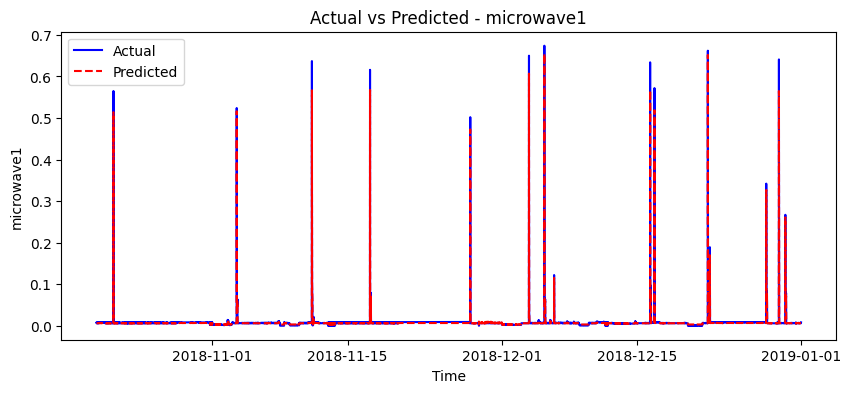

[0]	validation_0-rmse:0.06069
[50]	validation_0-rmse:0.03792
[100]	validation_0-rmse:0.02485
[150]	validation_0-rmse:0.01658
[200]	validation_0-rmse:0.01181
[250]	validation_0-rmse:0.00932
[300]	validation_0-rmse:0.00798
[350]	validation_0-rmse:0.00731
[400]	validation_0-rmse:0.00703
[450]	validation_0-rmse:0.00692
[499]	validation_0-rmse:0.00684


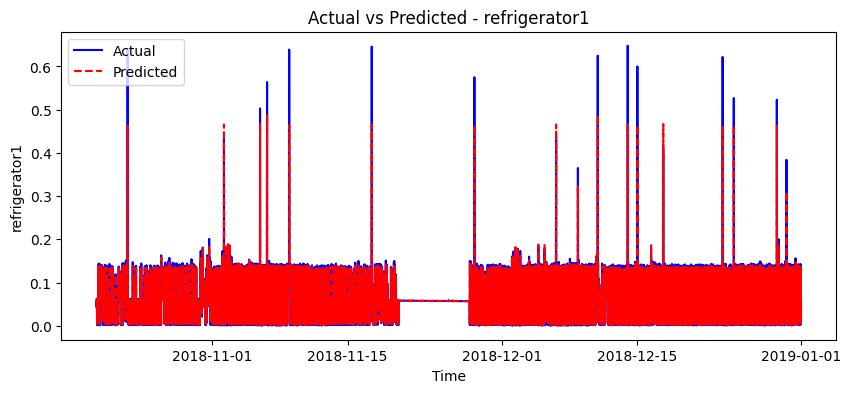

[0]	validation_0-rmse:1.20489
[50]	validation_0-rmse:0.73031
[100]	validation_0-rmse:0.44352
[150]	validation_0-rmse:0.27319
[200]	validation_0-rmse:0.16713
[250]	validation_0-rmse:0.10293
[300]	validation_0-rmse:0.06474
[350]	validation_0-rmse:0.04232
[400]	validation_0-rmse:0.02961
[450]	validation_0-rmse:0.02257
[499]	validation_0-rmse:0.01908


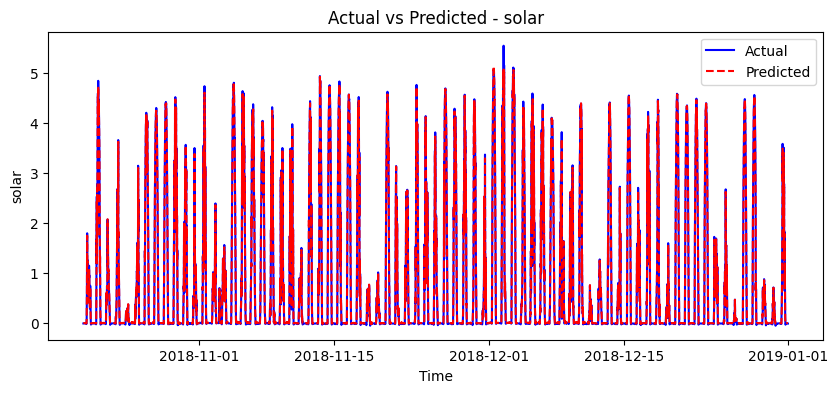

[0]	validation_0-rmse:3.47456
[50]	validation_0-rmse:3.39661
[100]	validation_0-rmse:3.35230
[150]	validation_0-rmse:3.32507
[200]	validation_0-rmse:3.30976
[250]	validation_0-rmse:3.29821
[300]	validation_0-rmse:3.29346
[350]	validation_0-rmse:3.28961
[400]	validation_0-rmse:3.28897
[450]	validation_0-rmse:3.28611
[499]	validation_0-rmse:3.28467


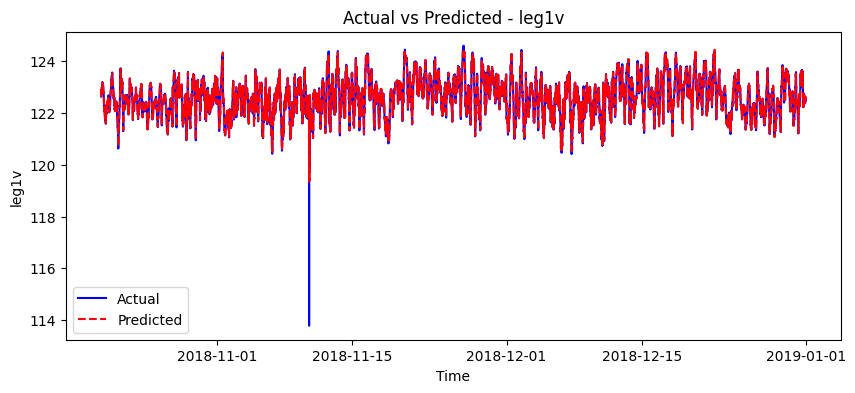

[0]	validation_0-rmse:3.48577
[50]	validation_0-rmse:3.41043
[100]	validation_0-rmse:3.37023
[150]	validation_0-rmse:3.34340
[200]	validation_0-rmse:3.32697
[250]	validation_0-rmse:3.31543
[300]	validation_0-rmse:3.30907
[350]	validation_0-rmse:3.30563
[400]	validation_0-rmse:3.30350
[450]	validation_0-rmse:3.30052
[499]	validation_0-rmse:3.29911


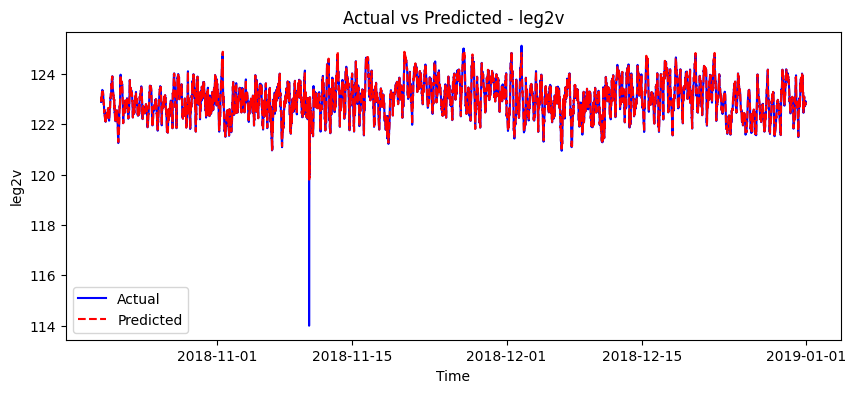

Final Model Evaluation Metrics:
           air1  bathroom1      car1  clotheswasher1  dishwasher1     drye1  \
MAE    0.005536   0.000772  0.006054        0.001498     0.001615  0.002470   
SMAPE  1.751300   0.179335  0.540721        1.431801     0.540270  1.783116   
RMSE   0.009140   0.001355  0.020876        0.005151     0.004088  0.010865   
R2     0.999509   0.883385  0.999260        0.993036     0.990462  0.998649   

       furnace1      grid  kitchenapp1  kitchenapp2  microwave1  \
MAE    0.004332  0.018772     0.000880     0.003641    0.001238   
SMAPE  0.085201  0.030787     0.288982     0.863449    0.211196   
RMSE   0.005628  0.030965     0.001359     0.005169    0.002418   
R2     0.997225  0.999692     0.916141     0.990007    0.989375   

       refrigerator1     solar     leg1v     leg2v  
MAE         0.002479  0.012836  0.010568  0.009898  
SMAPE       0.153405  0.683044  0.000086  0.000081  
RMSE        0.004719  0.018888  0.047925  0.050050  
R2          0.990560  0.

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

data = data.drop(columns=["dataid"])

def create_lag_features(df, lags=2):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=2).mean()
    return df_lagged

data_lagged = create_lag_features(data, lags=1)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

features = [col for col in train.columns if col != "local_3min"]

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

results = {}

np.random.seed(42)

for target_col in data.columns:
    if target_col == "local_3min":
        continue

    X_train, y_train = train[features], train[target_col]
    X_val, y_val = val[features], val[target_col]
    X_test, y_test = test[features], test[target_col]
    
    noise_factor = 0.01 * np.std(y_train)
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)
    
    model = xgb.XGBRegressor(
        objective="reg:squarederror", 
        n_estimators=500,
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=10,
        reg_alpha=0.5,
        reg_lambda=0.5,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0.1,
        verbosity=1
    )
    
    model.fit(
    X_train, y_train_noisy, 
    eval_set=[(X_val, y_val)], 
    #eval_metric=["mae"],  # ✅ Move eval_metric here
    #early_stopping_rounds=30,
    verbose=50
)

    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    smape_score = smape(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}
    
    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))


[0]	validation_0-rmse:0.59096
[50]	validation_0-rmse:0.37207
[100]	validation_0-rmse:0.24039
[150]	validation_0-rmse:0.16262
[200]	validation_0-rmse:0.11746
[250]	validation_0-rmse:0.09252
[300]	validation_0-rmse:0.07857
[350]	validation_0-rmse:0.07085
[400]	validation_0-rmse:0.06601
[450]	validation_0-rmse:0.06283
[499]	validation_0-rmse:0.06051


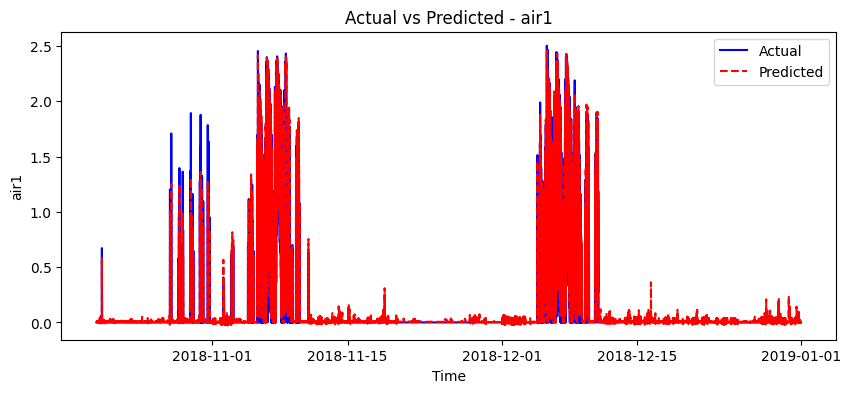

[0]	validation_0-rmse:0.00525
[50]	validation_0-rmse:0.00418
[100]	validation_0-rmse:0.00366
[150]	validation_0-rmse:0.00338
[200]	validation_0-rmse:0.00308
[250]	validation_0-rmse:0.00276
[300]	validation_0-rmse:0.00269
[350]	validation_0-rmse:0.00266
[400]	validation_0-rmse:0.00263
[450]	validation_0-rmse:0.00263
[499]	validation_0-rmse:0.00263


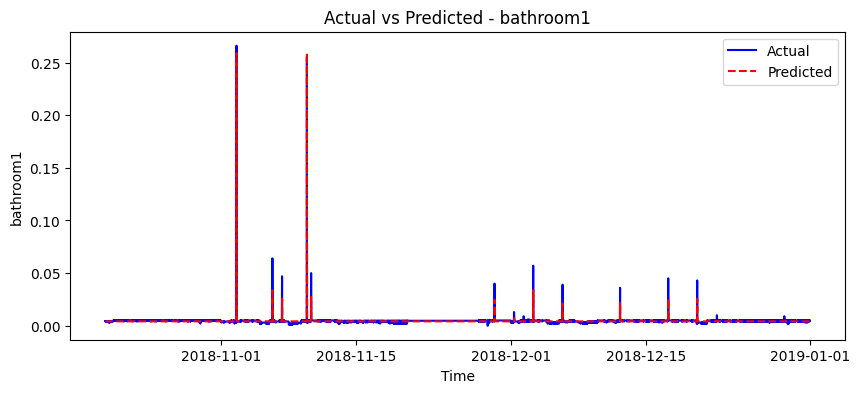

[0]	validation_0-rmse:0.55764
[50]	validation_0-rmse:0.34558
[100]	validation_0-rmse:0.21768
[150]	validation_0-rmse:0.14135
[200]	validation_0-rmse:0.09719
[250]	validation_0-rmse:0.07161
[300]	validation_0-rmse:0.05725
[350]	validation_0-rmse:0.04898
[400]	validation_0-rmse:0.04463
[450]	validation_0-rmse:0.04200
[499]	validation_0-rmse:0.04024


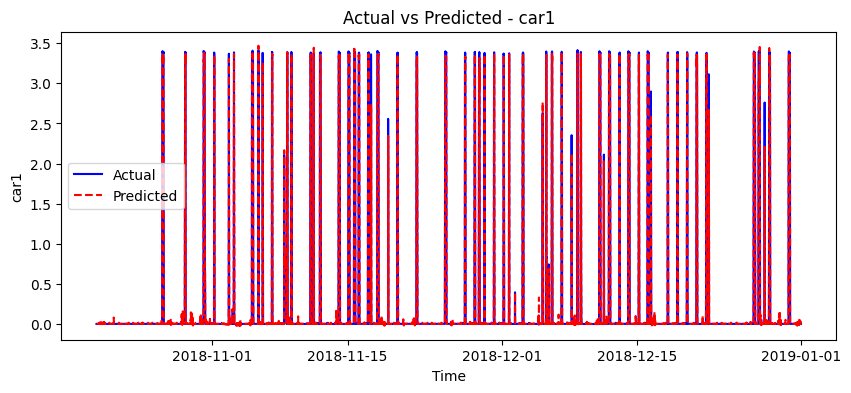

[0]	validation_0-rmse:0.02734
[50]	validation_0-rmse:0.01938
[100]	validation_0-rmse:0.01402
[150]	validation_0-rmse:0.01064
[200]	validation_0-rmse:0.00870
[250]	validation_0-rmse:0.00769
[300]	validation_0-rmse:0.00691
[350]	validation_0-rmse:0.00654
[400]	validation_0-rmse:0.00632
[450]	validation_0-rmse:0.00618
[499]	validation_0-rmse:0.00611


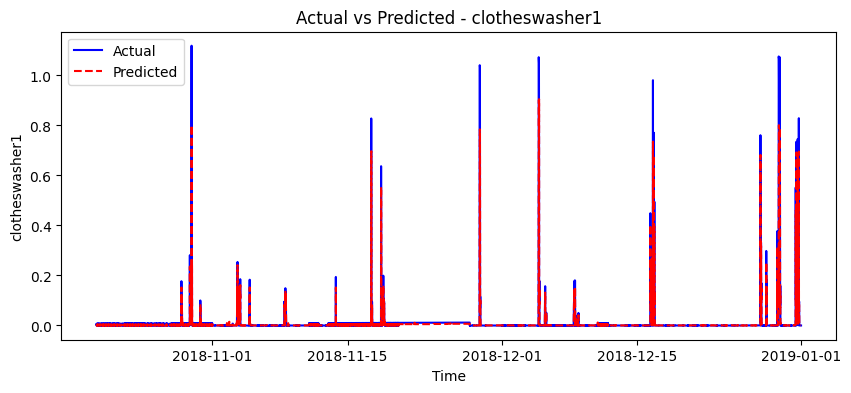

[0]	validation_0-rmse:0.04550
[50]	validation_0-rmse:0.03326
[100]	validation_0-rmse:0.02477
[150]	validation_0-rmse:0.01931
[200]	validation_0-rmse:0.01623
[250]	validation_0-rmse:0.01385
[300]	validation_0-rmse:0.01245
[350]	validation_0-rmse:0.01151
[400]	validation_0-rmse:0.01073
[450]	validation_0-rmse:0.01017
[499]	validation_0-rmse:0.00987


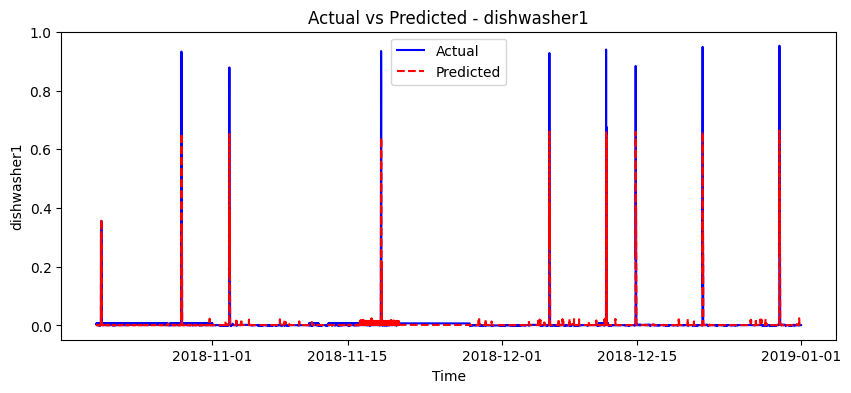

[0]	validation_0-rmse:0.40826
[50]	validation_0-rmse:0.28174
[100]	validation_0-rmse:0.20351
[150]	validation_0-rmse:0.14732
[200]	validation_0-rmse:0.11637
[250]	validation_0-rmse:0.09607
[300]	validation_0-rmse:0.08606
[350]	validation_0-rmse:0.07795
[400]	validation_0-rmse:0.07237
[450]	validation_0-rmse:0.06848
[499]	validation_0-rmse:0.06573


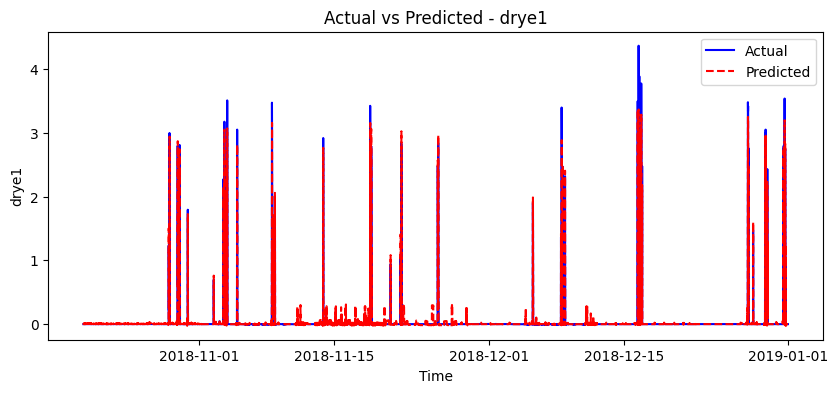

[0]	validation_0-rmse:0.13244
[50]	validation_0-rmse:0.08641
[100]	validation_0-rmse:0.05892
[150]	validation_0-rmse:0.04299
[200]	validation_0-rmse:0.03404
[250]	validation_0-rmse:0.02921
[300]	validation_0-rmse:0.02636
[350]	validation_0-rmse:0.02473
[400]	validation_0-rmse:0.02378
[450]	validation_0-rmse:0.02315
[499]	validation_0-rmse:0.02259


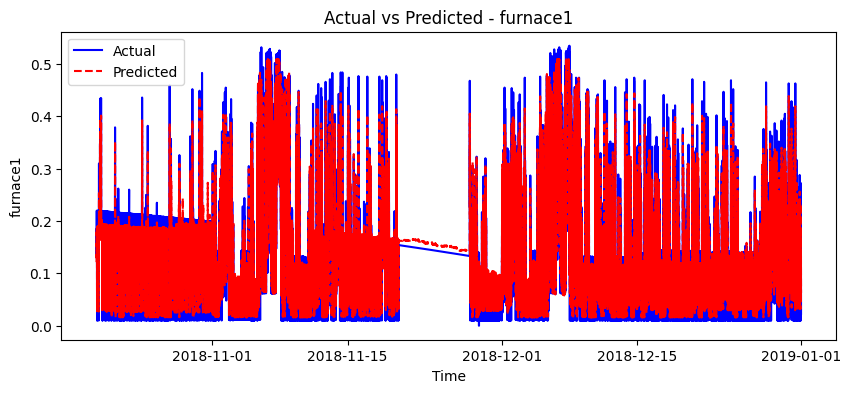

[0]	validation_0-rmse:1.52232
[50]	validation_0-rmse:0.96046
[100]	validation_0-rmse:0.62393
[150]	validation_0-rmse:0.42763
[200]	validation_0-rmse:0.31088
[250]	validation_0-rmse:0.24578
[300]	validation_0-rmse:0.21007
[350]	validation_0-rmse:0.18957
[400]	validation_0-rmse:0.17521
[450]	validation_0-rmse:0.16462
[499]	validation_0-rmse:0.15605


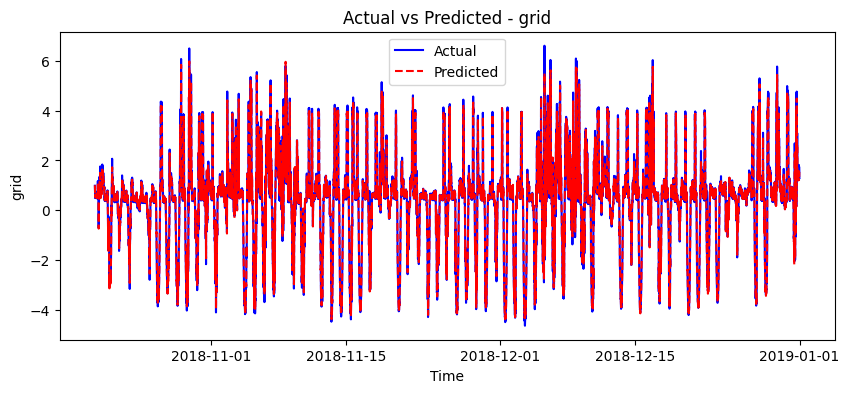

[0]	validation_0-rmse:0.00826
[50]	validation_0-rmse:0.00675
[100]	validation_0-rmse:0.00557
[150]	validation_0-rmse:0.00490
[200]	validation_0-rmse:0.00437
[250]	validation_0-rmse:0.00417
[300]	validation_0-rmse:0.00411
[350]	validation_0-rmse:0.00406
[400]	validation_0-rmse:0.00402
[450]	validation_0-rmse:0.00399
[499]	validation_0-rmse:0.00398


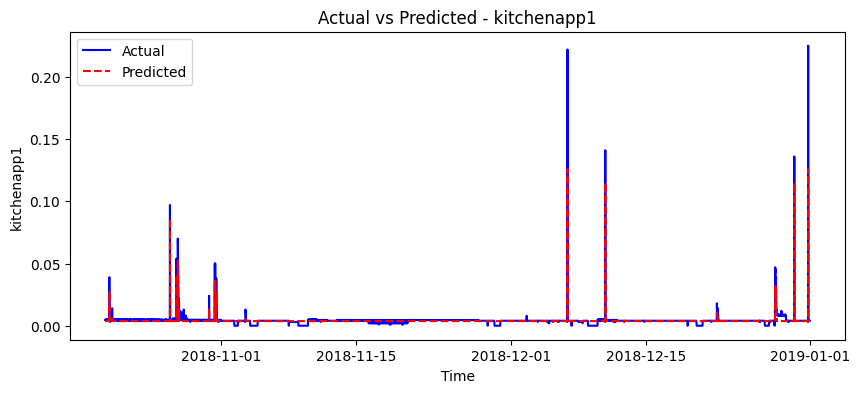

[0]	validation_0-rmse:0.00410
[50]	validation_0-rmse:0.00378
[100]	validation_0-rmse:0.00360
[150]	validation_0-rmse:0.00349
[200]	validation_0-rmse:0.00334
[250]	validation_0-rmse:0.00316
[300]	validation_0-rmse:0.00312
[350]	validation_0-rmse:0.00301
[400]	validation_0-rmse:0.00297
[450]	validation_0-rmse:0.00294
[499]	validation_0-rmse:0.00294


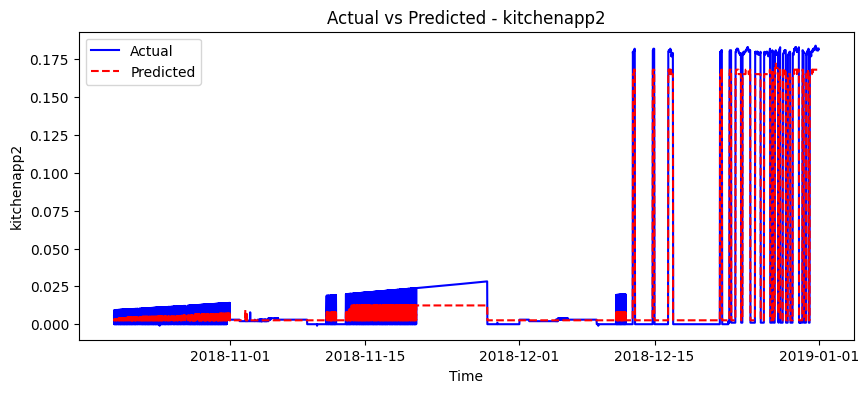

[0]	validation_0-rmse:0.02380
[50]	validation_0-rmse:0.01832
[100]	validation_0-rmse:0.01402
[150]	validation_0-rmse:0.01193
[200]	validation_0-rmse:0.01027
[250]	validation_0-rmse:0.00943
[300]	validation_0-rmse:0.00878
[350]	validation_0-rmse:0.00830
[400]	validation_0-rmse:0.00803
[450]	validation_0-rmse:0.00784
[499]	validation_0-rmse:0.00770


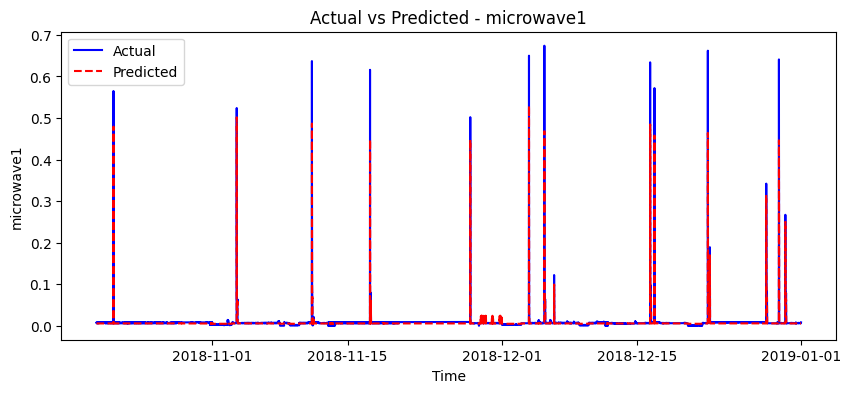

[0]	validation_0-rmse:0.06074
[50]	validation_0-rmse:0.04487
[100]	validation_0-rmse:0.03360
[150]	validation_0-rmse:0.02740
[200]	validation_0-rmse:0.02372
[250]	validation_0-rmse:0.02082
[300]	validation_0-rmse:0.01935
[350]	validation_0-rmse:0.01824
[400]	validation_0-rmse:0.01759
[450]	validation_0-rmse:0.01715
[499]	validation_0-rmse:0.01687


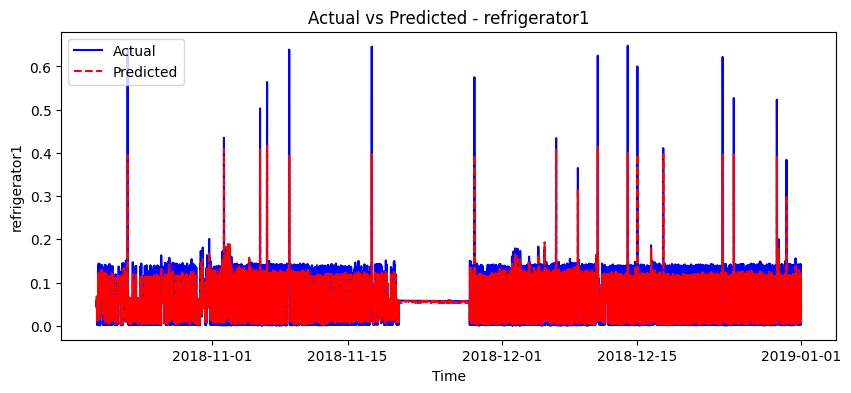

[0]	validation_0-rmse:1.20498
[50]	validation_0-rmse:0.76696
[100]	validation_0-rmse:0.48496
[150]	validation_0-rmse:0.30835
[200]	validation_0-rmse:0.20815
[250]	validation_0-rmse:0.14909
[300]	validation_0-rmse:0.11549
[350]	validation_0-rmse:0.09776
[400]	validation_0-rmse:0.08780
[450]	validation_0-rmse:0.08175
[499]	validation_0-rmse:0.07806


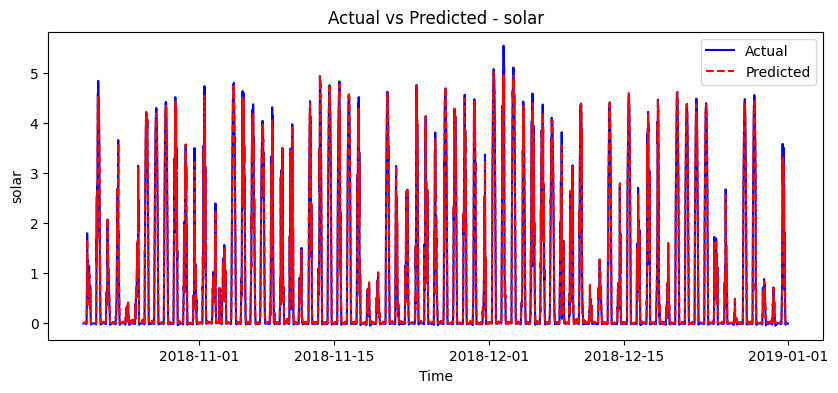

[0]	validation_0-rmse:3.47506
[50]	validation_0-rmse:3.41215
[100]	validation_0-rmse:3.38125
[150]	validation_0-rmse:3.36455
[200]	validation_0-rmse:3.35551
[250]	validation_0-rmse:3.34894
[300]	validation_0-rmse:3.34215
[350]	validation_0-rmse:3.33715
[400]	validation_0-rmse:3.33215
[450]	validation_0-rmse:3.32893
[499]	validation_0-rmse:3.32546


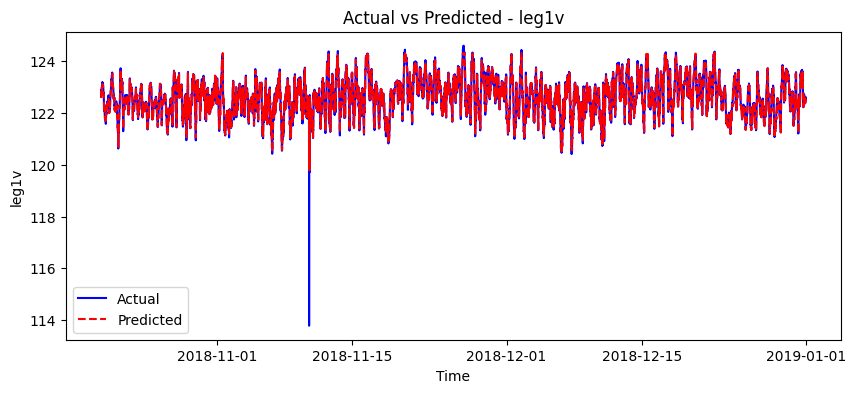

[0]	validation_0-rmse:3.48612
[50]	validation_0-rmse:3.42659
[100]	validation_0-rmse:3.39692
[150]	validation_0-rmse:3.38073
[200]	validation_0-rmse:3.37234
[250]	validation_0-rmse:3.36591
[300]	validation_0-rmse:3.35813
[350]	validation_0-rmse:3.35273
[400]	validation_0-rmse:3.34630
[450]	validation_0-rmse:3.34214
[499]	validation_0-rmse:3.33822


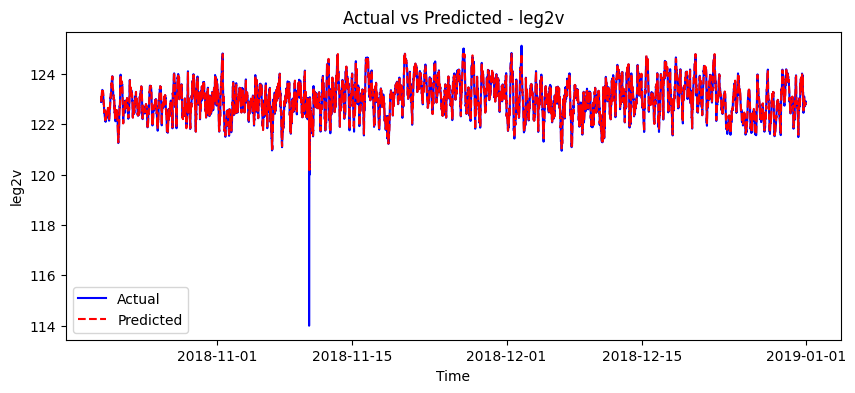

Final Model Evaluation Metrics:
           air1  bathroom1      car1  clotheswasher1  dishwasher1     drye1  \
MAE    0.017592   0.000723  0.015042        0.003411     0.002844  0.014048   
SMAPE  1.764182   0.159434  0.739202        1.550471     0.733695  1.818688   
RMSE   0.038340   0.002045  0.061494        0.016988     0.011443  0.053257   
R2     0.991367   0.734440  0.993575        0.924268     0.925256  0.967532   

       furnace1      grid  kitchenapp1  kitchenapp2  microwave1  \
MAE    0.018322  0.092336     0.000950     0.005269    0.002474   
SMAPE  0.261801  0.127485     0.278634     0.950648    0.351272   
RMSE   0.023140  0.145602     0.002278     0.007830    0.007763   
R2     0.953076  0.993199     0.764403     0.977071    0.890467   

       refrigerator1     solar     leg1v     leg2v  
MAE         0.008747  0.043553  0.039152  0.035699  
SMAPE       0.374355  0.927678  0.000320  0.000291  
RMSE        0.013102  0.076912  0.073704  0.072690  
R2          0.927217  0.

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

if "dataid" in data.columns:
    data = data.drop(columns=["dataid"])

def create_lag_features(df, lags=1):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=3, min_periods=1).mean().shift(1)  # Reduced leakage
    return df_lagged

data_lagged = create_lag_features(data, lags=1)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

results = {}

np.random.seed(42)

for target_col in data.columns:
    if target_col == "local_3min":
        continue

    feature_cols = [col for col in train.columns if col != "local_3min" and col != target_col]

    X_train, y_train = train[feature_cols], train[target_col]
    X_val, y_val = val[feature_cols], val[target_col]
    X_test, y_test = test[feature_cols], test[target_col]

    if X_train.shape[1] == 0:
        print(f"Skipping {target_col} due to no valid features")
        continue

    noise_factor = 0.05 * np.std(y_train)  # Increased noise
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)

    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.01,
        max_depth=4,  # Reduced depth
        min_child_weight=20,  # Increased to prevent overfitting
        reg_alpha=5.0,  # Increased L1 regularization
        reg_lambda=5.0,  # Increased L2 regularization
        subsample=0.5,  # Reduced to add more randomness
        colsample_bytree=0.5,  # Reduced to avoid overfitting
        gamma=0.3,  # Increased to penalize complex trees
        verbosity=1
    )

    model.fit(
        X_train, y_train_noisy,
        eval_set=[(X_val, y_val)],
        # eval_metric="mae",
        # early_stopping_rounds=30,
        verbose=50
    )

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    smape_score = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-8))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}

    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))


[0]	validation_0-rmse:0.59099
[50]	validation_0-rmse:0.37112
[100]	validation_0-rmse:0.24796
[150]	validation_0-rmse:0.18409
[200]	validation_0-rmse:0.15441
[250]	validation_0-rmse:0.14164
[300]	validation_0-rmse:0.13575
[350]	validation_0-rmse:0.13288
[400]	validation_0-rmse:0.13092
[450]	validation_0-rmse:0.12971
[499]	validation_0-rmse:0.12871


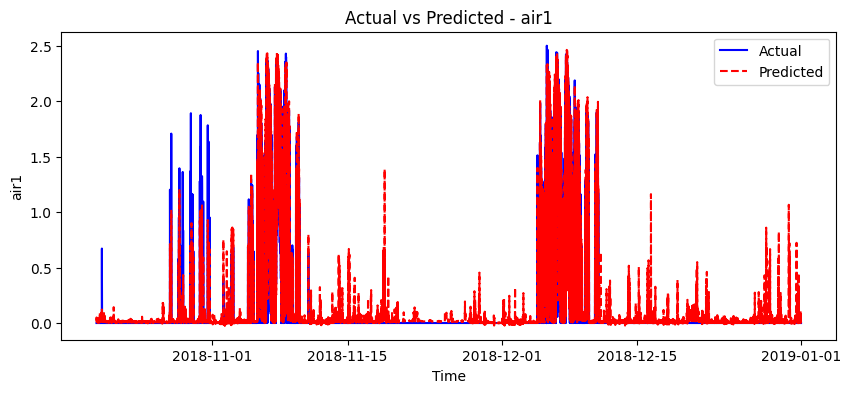

Feature Importance for air1:
bathroom1: 0.0040
car1: 0.0131
clotheswasher1: 0.0093
dishwasher1: 0.0017
drye1: 0.2912
furnace1: 0.1075
grid: 0.0064
kitchenapp1: 0.0010
kitchenapp2: 0.0017
microwave1: 0.0014
refrigerator1: 0.0008
solar: 0.0058
leg1v: 0.0049
leg2v: 0.0052
bathroom1_lag1: 0.0023
bathroom1_lag2: 0.0007
bathroom1_rolling_mean: 0.0034
car1_lag1: 0.0112
car1_lag2: 0.0035
car1_rolling_mean: 0.0078
clotheswasher1_lag1: 0.0054
clotheswasher1_lag2: 0.0019
clotheswasher1_rolling_mean: 0.0081
dishwasher1_lag1: 0.0008
dishwasher1_lag2: 0.0012
dishwasher1_rolling_mean: 0.0008
drye1_lag1: 0.1834
drye1_lag2: 0.0323
drye1_rolling_mean: 0.0506
furnace1_lag1: 0.1088
furnace1_lag2: 0.0061
furnace1_rolling_mean: 0.0623
grid_lag1: 0.0060
grid_lag2: 0.0013
grid_rolling_mean: 0.0031
kitchenapp1_lag1: 0.0010
kitchenapp1_lag2: 0.0007
kitchenapp1_rolling_mean: 0.0007
kitchenapp2_lag1: 0.0021
kitchenapp2_lag2: 0.0017
kitchenapp2_rolling_mean: 0.0018
microwave1_lag1: 0.0014
microwave1_lag2: 0.0014
m

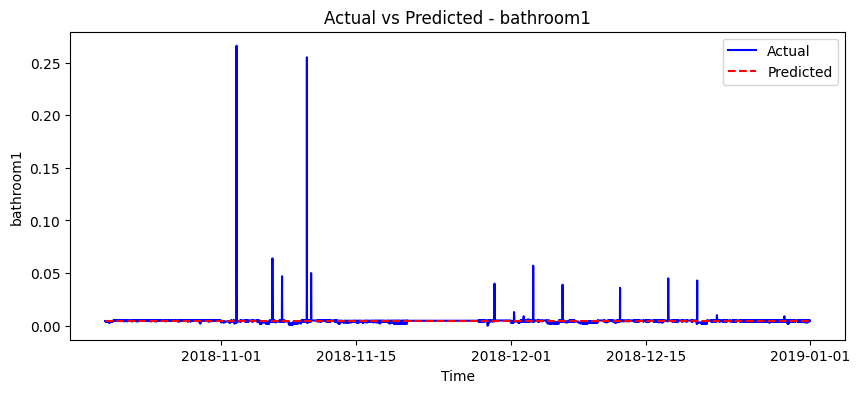

Feature Importance for bathroom1:
air1: 0.0112
car1: 0.0374
clotheswasher1: 0.0557
dishwasher1: 0.0136
drye1: 0.0000
furnace1: 0.0000
grid: 0.0068
kitchenapp1: 0.0143
kitchenapp2: 0.0343
microwave1: 0.0401
refrigerator1: 0.0000
solar: 0.0234
leg1v: 0.0135
leg2v: 0.0305
air1_lag1: 0.0129
air1_lag2: 0.0227
air1_rolling_mean: 0.0104
car1_lag1: 0.0357
car1_lag2: 0.0258
car1_rolling_mean: 0.0421
clotheswasher1_lag1: 0.0559
clotheswasher1_lag2: 0.0516
clotheswasher1_rolling_mean: 0.0318
dishwasher1_lag1: 0.0117
dishwasher1_lag2: 0.0110
dishwasher1_rolling_mean: 0.0166
drye1_lag1: 0.0186
drye1_lag2: 0.0217
drye1_rolling_mean: 0.0000
furnace1_lag1: 0.0000
furnace1_lag2: 0.0000
furnace1_rolling_mean: 0.0000
grid_lag1: 0.0000
grid_lag2: 0.0090
grid_rolling_mean: 0.0000
kitchenapp1_lag1: 0.0082
kitchenapp1_lag2: 0.0084
kitchenapp1_rolling_mean: 0.0072
kitchenapp2_lag1: 0.0000
kitchenapp2_lag2: 0.0000
kitchenapp2_rolling_mean: 0.0000
microwave1_lag1: 0.0356
microwave1_lag2: 0.0547
microwave1_rolli

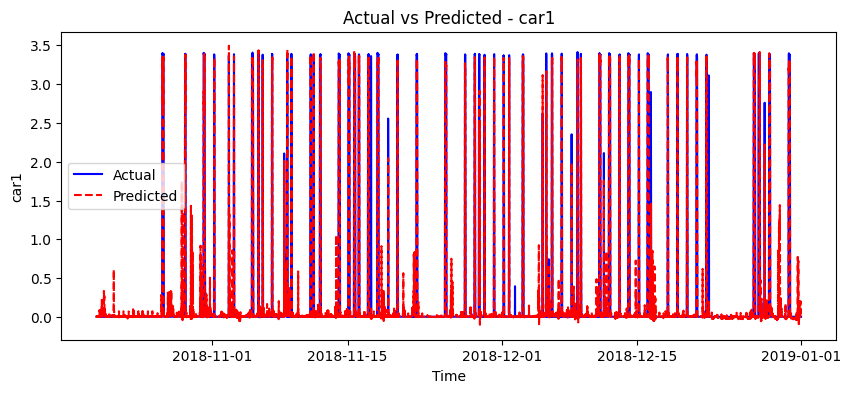

Feature Importance for car1:
air1: 0.0899
bathroom1: 0.0025
clotheswasher1: 0.0058
dishwasher1: 0.0034
drye1: 0.0537
furnace1: 0.0073
grid: 0.1492
kitchenapp1: 0.0030
kitchenapp2: 0.0014
microwave1: 0.0009
refrigerator1: 0.0018
solar: 0.0083
leg1v: 0.0017
leg2v: 0.0007
air1_lag1: 0.1225
air1_lag2: 0.0326
air1_rolling_mean: 0.0726
bathroom1_lag1: 0.0029
bathroom1_lag2: 0.0049
bathroom1_rolling_mean: 0.0037
clotheswasher1_lag1: 0.0047
clotheswasher1_lag2: 0.0037
clotheswasher1_rolling_mean: 0.0084
dishwasher1_lag1: 0.0025
dishwasher1_lag2: 0.0031
dishwasher1_rolling_mean: 0.0028
drye1_lag1: 0.0477
drye1_lag2: 0.0154
drye1_rolling_mean: 0.0293
furnace1_lag1: 0.0036
furnace1_lag2: 0.0019
furnace1_rolling_mean: 0.0018
grid_lag1: 0.1163
grid_lag2: 0.0328
grid_rolling_mean: 0.0949
kitchenapp1_lag1: 0.0020
kitchenapp1_lag2: 0.0017
kitchenapp1_rolling_mean: 0.0037
kitchenapp2_lag1: 0.0018
kitchenapp2_lag2: 0.0026
kitchenapp2_rolling_mean: 0.0019
microwave1_lag1: 0.0014
microwave1_lag2: 0.0009
m

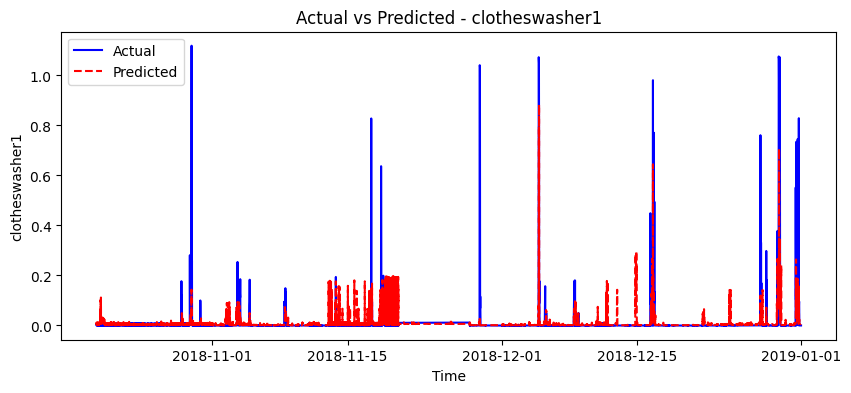

Feature Importance for clotheswasher1:
air1: 0.0185
bathroom1: 0.0268
car1: 0.0495
dishwasher1: 0.0176
drye1: 0.0146
furnace1: 0.0144
grid: 0.0091
kitchenapp1: 0.0184
kitchenapp2: 0.0136
microwave1: 0.0161
refrigerator1: 0.0092
solar: 0.0057
leg1v: 0.0242
leg2v: 0.0053
air1_lag1: 0.0153
air1_lag2: 0.0124
air1_rolling_mean: 0.0135
bathroom1_lag1: 0.0219
bathroom1_lag2: 0.0100
bathroom1_rolling_mean: 0.0159
car1_lag1: 0.0619
car1_lag2: 0.0199
car1_rolling_mean: 0.0540
dishwasher1_lag1: 0.0144
dishwasher1_lag2: 0.0206
dishwasher1_rolling_mean: 0.0212
drye1_lag1: 0.0646
drye1_lag2: 0.0387
drye1_rolling_mean: 0.0259
furnace1_lag1: 0.0153
furnace1_lag2: 0.0353
furnace1_rolling_mean: 0.0132
grid_lag1: 0.0046
grid_lag2: 0.0110
grid_rolling_mean: 0.0109
kitchenapp1_lag1: 0.0084
kitchenapp1_lag2: 0.0157
kitchenapp1_rolling_mean: 0.0104
kitchenapp2_lag1: 0.0134
kitchenapp2_lag2: 0.0127
kitchenapp2_rolling_mean: 0.0189
microwave1_lag1: 0.0172
microwave1_lag2: 0.0128
microwave1_rolling_mean: 0.0054

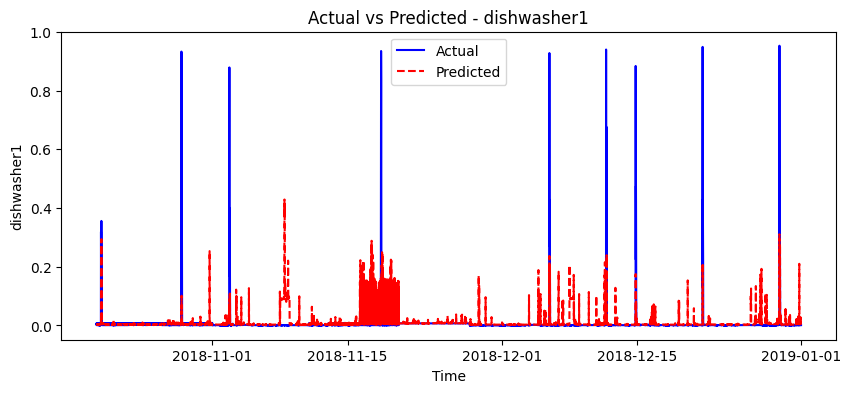

Feature Importance for dishwasher1:
air1: 0.0151
bathroom1: 0.0217
car1: 0.0264
clotheswasher1: 0.0214
drye1: 0.0214
furnace1: 0.0141
grid: 0.0121
kitchenapp1: 0.0239
kitchenapp2: 0.0164
microwave1: 0.0188
refrigerator1: 0.0143
solar: 0.0210
leg1v: 0.0173
leg2v: 0.0197
air1_lag1: 0.0145
air1_lag2: 0.0144
air1_rolling_mean: 0.0119
bathroom1_lag1: 0.0181
bathroom1_lag2: 0.0107
bathroom1_rolling_mean: 0.0119
car1_lag1: 0.0218
car1_lag2: 0.0159
car1_rolling_mean: 0.0182
clotheswasher1_lag1: 0.0134
clotheswasher1_lag2: 0.0084
clotheswasher1_rolling_mean: 0.0102
drye1_lag1: 0.0135
drye1_lag2: 0.0107
drye1_rolling_mean: 0.0148
furnace1_lag1: 0.0154
furnace1_lag2: 0.0154
furnace1_rolling_mean: 0.0180
grid_lag1: 0.0105
grid_lag2: 0.0126
grid_rolling_mean: 0.0124
kitchenapp1_lag1: 0.0235
kitchenapp1_lag2: 0.0265
kitchenapp1_rolling_mean: 0.0548
kitchenapp2_lag1: 0.0169
kitchenapp2_lag2: 0.0195
kitchenapp2_rolling_mean: 0.0218
microwave1_lag1: 0.0234
microwave1_lag2: 0.0166
microwave1_rolling_mea

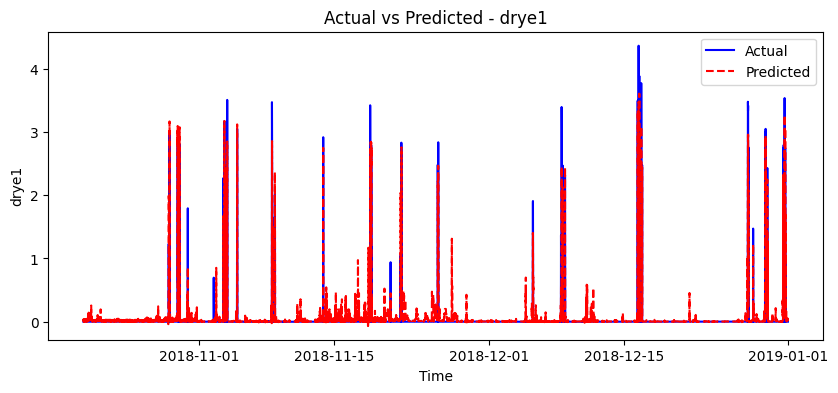

Feature Importance for drye1:
air1: 0.0448
bathroom1: 0.0077
car1: 0.0482
clotheswasher1: 0.0688
dishwasher1: 0.0041
furnace1: 0.0295
grid: 0.0429
kitchenapp1: 0.0054
kitchenapp2: 0.0051
microwave1: 0.0039
refrigerator1: 0.0016
solar: 0.0162
leg1v: 0.0060
leg2v: 0.0071
air1_lag1: 0.0543
air1_lag2: 0.0517
air1_rolling_mean: 0.0424
bathroom1_lag1: 0.0073
bathroom1_lag2: 0.0064
bathroom1_rolling_mean: 0.0186
car1_lag1: 0.0509
car1_lag2: 0.0559
car1_rolling_mean: 0.0345
clotheswasher1_lag1: 0.0343
clotheswasher1_lag2: 0.0034
clotheswasher1_rolling_mean: 0.0605
dishwasher1_lag1: 0.0068
dishwasher1_lag2: 0.0064
dishwasher1_rolling_mean: 0.0045
furnace1_lag1: 0.0207
furnace1_lag2: 0.0190
furnace1_rolling_mean: 0.0205
grid_lag1: 0.0309
grid_lag2: 0.0116
grid_rolling_mean: 0.0315
kitchenapp1_lag1: 0.0056
kitchenapp1_lag2: 0.0034
kitchenapp1_rolling_mean: 0.0100
kitchenapp2_lag1: 0.0055
kitchenapp2_lag2: 0.0046
kitchenapp2_rolling_mean: 0.0059
microwave1_lag1: 0.0042
microwave1_lag2: 0.0055
micr

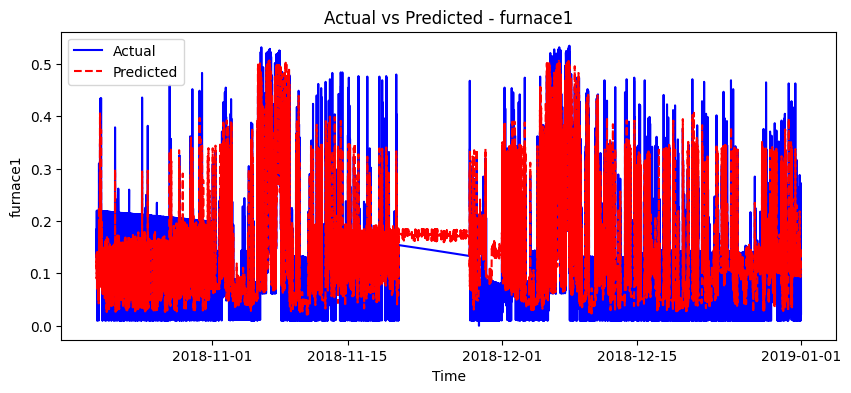

Feature Importance for furnace1:
air1: 0.1818
bathroom1: 0.0041
car1: 0.0009
clotheswasher1: 0.0592
dishwasher1: 0.0088
drye1: 0.0132
grid: 0.0034
kitchenapp1: 0.0026
kitchenapp2: 0.0059
microwave1: 0.0017
refrigerator1: 0.0028
solar: 0.0015
leg1v: 0.0012
leg2v: 0.0008
air1_lag1: 0.2929
air1_lag2: 0.0870
air1_rolling_mean: 0.1683
bathroom1_lag1: 0.0019
bathroom1_lag2: 0.0012
bathroom1_rolling_mean: 0.0012
car1_lag1: 0.0008
car1_lag2: 0.0009
car1_rolling_mean: 0.0009
clotheswasher1_lag1: 0.0428
clotheswasher1_lag2: 0.0031
clotheswasher1_rolling_mean: 0.0396
dishwasher1_lag1: 0.0092
dishwasher1_lag2: 0.0033
dishwasher1_rolling_mean: 0.0027
drye1_lag1: 0.0065
drye1_lag2: 0.0016
drye1_rolling_mean: 0.0050
grid_lag1: 0.0024
grid_lag2: 0.0020
grid_rolling_mean: 0.0023
kitchenapp1_lag1: 0.0025
kitchenapp1_lag2: 0.0011
kitchenapp1_rolling_mean: 0.0016
kitchenapp2_lag1: 0.0048
kitchenapp2_lag2: 0.0022
kitchenapp2_rolling_mean: 0.0035
microwave1_lag1: 0.0019
microwave1_lag2: 0.0016
microwave1_ro

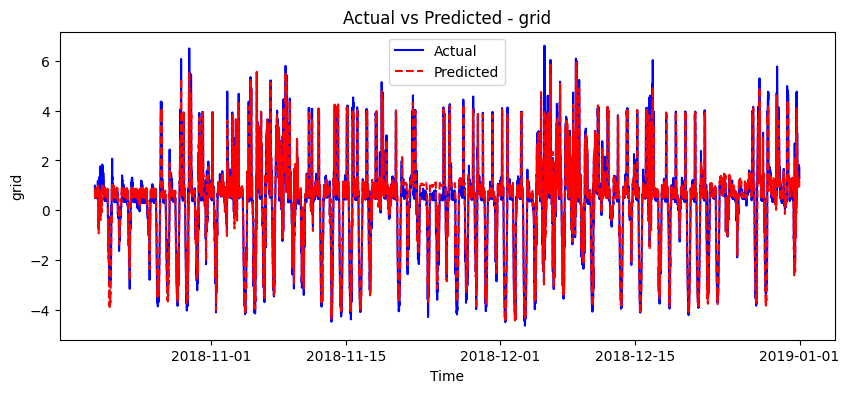

Feature Importance for grid:
air1: 0.0986
bathroom1: 0.0004
car1: 0.0350
clotheswasher1: 0.0021
dishwasher1: 0.0017
drye1: 0.0114
furnace1: 0.0373
kitchenapp1: 0.0015
kitchenapp2: 0.0013
microwave1: 0.0012
refrigerator1: 0.0010
solar: 0.1311
leg1v: 0.0058
leg2v: 0.0097
air1_lag1: 0.1478
air1_lag2: 0.0253
air1_rolling_mean: 0.0677
bathroom1_lag1: 0.0005
bathroom1_lag2: 0.0006
bathroom1_rolling_mean: 0.0006
car1_lag1: 0.0369
car1_lag2: 0.0122
car1_rolling_mean: 0.0231
clotheswasher1_lag1: 0.0022
clotheswasher1_lag2: 0.0019
clotheswasher1_rolling_mean: 0.0035
dishwasher1_lag1: 0.0015
dishwasher1_lag2: 0.0014
dishwasher1_rolling_mean: 0.0018
drye1_lag1: 0.0115
drye1_lag2: 0.0064
drye1_rolling_mean: 0.0126
furnace1_lag1: 0.0016
furnace1_lag2: 0.0009
furnace1_rolling_mean: 0.0022
kitchenapp1_lag1: 0.0018
kitchenapp1_lag2: 0.0025
kitchenapp1_rolling_mean: 0.0017
kitchenapp2_lag1: 0.0014
kitchenapp2_lag2: 0.0010
kitchenapp2_rolling_mean: 0.0014
microwave1_lag1: 0.0016
microwave1_lag2: 0.0013
m

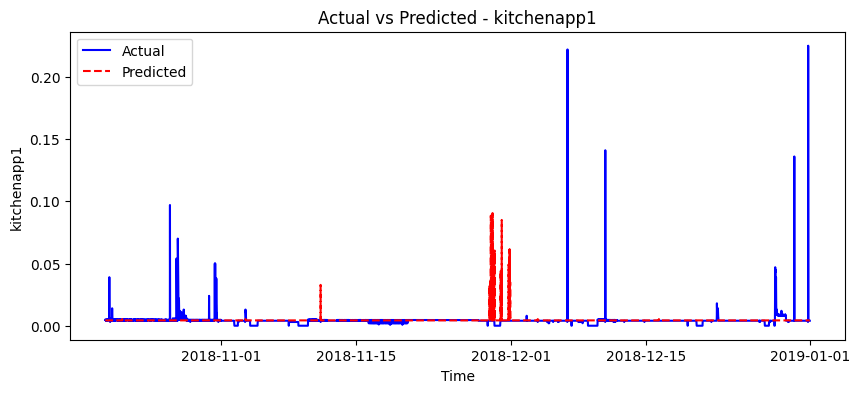

Feature Importance for kitchenapp1:
air1: 0.0463
bathroom1: 0.0332
car1: 0.0000
clotheswasher1: 0.0500
dishwasher1: 0.0121
drye1: 0.0493
furnace1: 0.0193
grid: 0.0172
kitchenapp2: 0.0232
microwave1: 0.0161
refrigerator1: 0.0000
solar: 0.0000
leg1v: 0.0000
leg2v: 0.0181
air1_lag1: 0.0000
air1_lag2: 0.0000
air1_rolling_mean: 0.0000
bathroom1_lag1: 0.0379
bathroom1_lag2: 0.0286
bathroom1_rolling_mean: 0.0155
car1_lag1: 0.0279
car1_lag2: 0.0214
car1_rolling_mean: 0.0207
clotheswasher1_lag1: 0.0396
clotheswasher1_lag2: 0.0413
clotheswasher1_rolling_mean: 0.0466
dishwasher1_lag1: 0.0118
dishwasher1_lag2: 0.0000
dishwasher1_rolling_mean: 0.0105
drye1_lag1: 0.0583
drye1_lag2: 0.0563
drye1_rolling_mean: 0.0610
furnace1_lag1: 0.0220
furnace1_lag2: 0.0188
furnace1_rolling_mean: 0.0212
grid_lag1: 0.0000
grid_lag2: 0.0000
grid_rolling_mean: 0.0000
kitchenapp2_lag1: 0.0171
kitchenapp2_lag2: 0.0000
kitchenapp2_rolling_mean: 0.0000
microwave1_lag1: 0.0150
microwave1_lag2: 0.0166
microwave1_rolling_mea

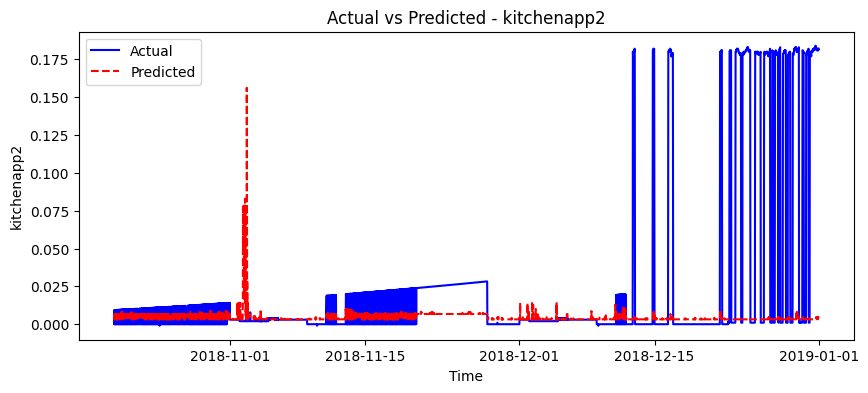

Feature Importance for kitchenapp2:
air1: 0.0247
bathroom1: 0.0354
car1: 0.0245
clotheswasher1: 0.0261
dishwasher1: 0.0113
drye1: 0.0347
furnace1: 0.0117
grid: 0.0144
kitchenapp1: 0.0250
microwave1: 0.0052
refrigerator1: 0.0040
solar: 0.0421
leg1v: 0.0167
leg2v: 0.0095
air1_lag1: 0.0294
air1_lag2: 0.0132
air1_rolling_mean: 0.0085
bathroom1_lag1: 0.0242
bathroom1_lag2: 0.0166
bathroom1_rolling_mean: 0.0281
car1_lag1: 0.0263
car1_lag2: 0.0143
car1_rolling_mean: 0.0119
clotheswasher1_lag1: 0.0184
clotheswasher1_lag2: 0.0111
clotheswasher1_rolling_mean: 0.0120
dishwasher1_lag1: 0.0119
dishwasher1_lag2: 0.0081
dishwasher1_rolling_mean: 0.0067
drye1_lag1: 0.0042
drye1_lag2: 0.0046
drye1_rolling_mean: 0.0044
furnace1_lag1: 0.0106
furnace1_lag2: 0.0209
furnace1_rolling_mean: 0.0111
grid_lag1: 0.0195
grid_lag2: 0.0247
grid_rolling_mean: 0.0291
kitchenapp1_lag1: 0.0183
kitchenapp1_lag2: 0.0220
kitchenapp1_rolling_mean: 0.0229
microwave1_lag1: 0.0069
microwave1_lag2: 0.0092
microwave1_rolling_mea

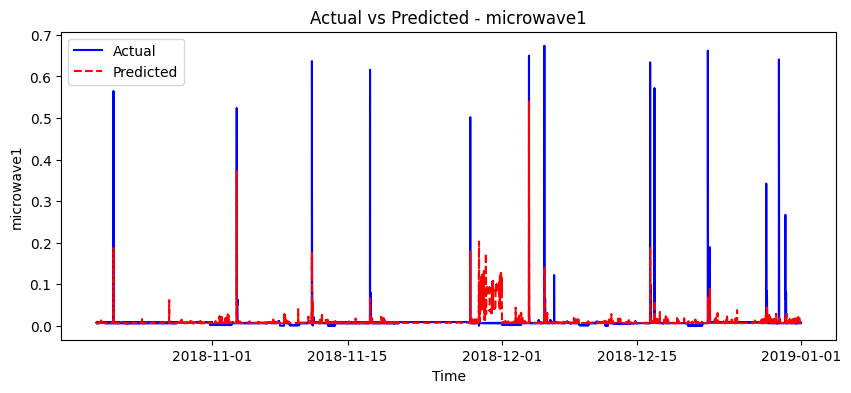

Feature Importance for microwave1:
air1: 0.0142
bathroom1: 0.0087
car1: 0.0053
clotheswasher1: 0.0111
dishwasher1: 0.0690
drye1: 0.0152
furnace1: 0.0289
grid: 0.0116
kitchenapp1: 0.0238
kitchenapp2: 0.0284
refrigerator1: 0.0086
solar: 0.0134
leg1v: 0.0125
leg2v: 0.0107
air1_lag1: 0.0114
air1_lag2: 0.0112
air1_rolling_mean: 0.0132
bathroom1_lag1: 0.0123
bathroom1_lag2: 0.0091
bathroom1_rolling_mean: 0.0069
car1_lag1: 0.0053
car1_lag2: 0.0114
car1_rolling_mean: 0.0049
clotheswasher1_lag1: 0.0141
clotheswasher1_lag2: 0.0087
clotheswasher1_rolling_mean: 0.0169
dishwasher1_lag1: 0.0922
dishwasher1_lag2: 0.0304
dishwasher1_rolling_mean: 0.0529
drye1_lag1: 0.0122
drye1_lag2: 0.0157
drye1_rolling_mean: 0.0156
furnace1_lag1: 0.0313
furnace1_lag2: 0.0201
furnace1_rolling_mean: 0.0215
grid_lag1: 0.0101
grid_lag2: 0.0101
grid_rolling_mean: 0.0117
kitchenapp1_lag1: 0.0279
kitchenapp1_lag2: 0.0232
kitchenapp1_rolling_mean: 0.0265
kitchenapp2_lag1: 0.0279
kitchenapp2_lag2: 0.0323
kitchenapp2_rolling_

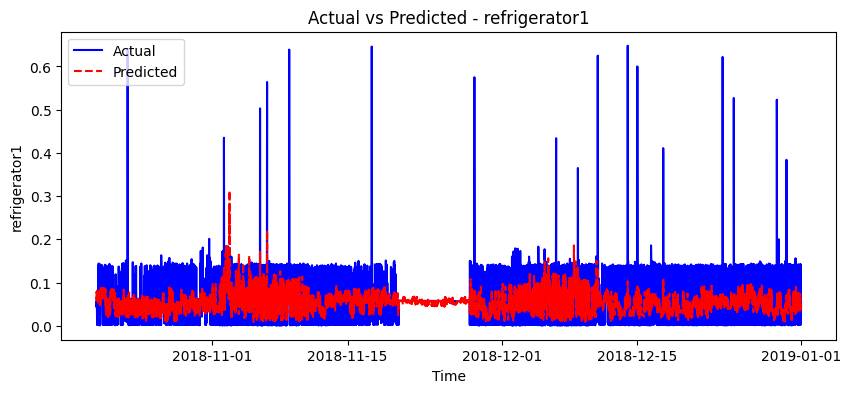

Feature Importance for refrigerator1:
air1: 0.0230
bathroom1: 0.0210
car1: 0.0581
clotheswasher1: 0.0132
dishwasher1: 0.0172
drye1: 0.0335
furnace1: 0.0102
grid: 0.0170
kitchenapp1: 0.0216
kitchenapp2: 0.0111
microwave1: 0.0140
solar: 0.0102
leg1v: 0.0113
leg2v: 0.0095
air1_lag1: 0.0279
air1_lag2: 0.0225
air1_rolling_mean: 0.0300
bathroom1_lag1: 0.0213
bathroom1_lag2: 0.0137
bathroom1_rolling_mean: 0.0145
car1_lag1: 0.0626
car1_lag2: 0.0297
car1_rolling_mean: 0.0412
clotheswasher1_lag1: 0.0141
clotheswasher1_lag2: 0.0120
clotheswasher1_rolling_mean: 0.0151
dishwasher1_lag1: 0.0196
dishwasher1_lag2: 0.0162
dishwasher1_rolling_mean: 0.0240
drye1_lag1: 0.0317
drye1_lag2: 0.0168
drye1_rolling_mean: 0.0338
furnace1_lag1: 0.0134
furnace1_lag2: 0.0122
furnace1_rolling_mean: 0.0095
grid_lag1: 0.0137
grid_lag2: 0.0091
grid_rolling_mean: 0.0112
kitchenapp1_lag1: 0.0217
kitchenapp1_lag2: 0.0136
kitchenapp1_rolling_mean: 0.0213
kitchenapp2_lag1: 0.0113
kitchenapp2_lag2: 0.0113
kitchenapp2_rolling_

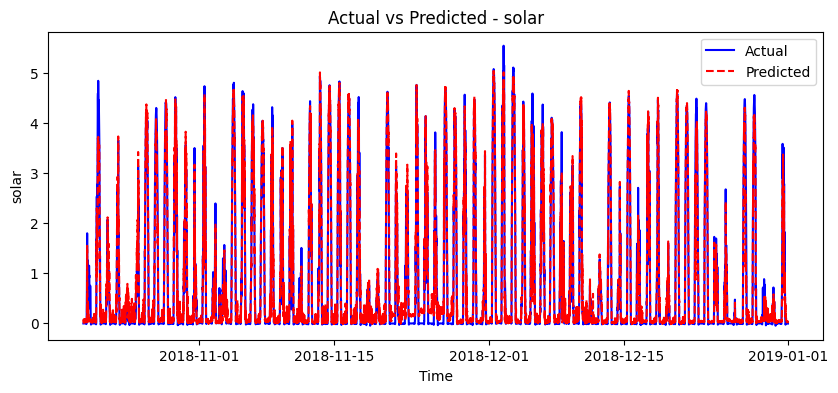

Feature Importance for solar:
air1: 0.0474
bathroom1: 0.0006
car1: 0.0055
clotheswasher1: 0.0071
dishwasher1: 0.0015
drye1: 0.0118
furnace1: 0.0061
grid: 0.0970
kitchenapp1: 0.0014
kitchenapp2: 0.0010
microwave1: 0.0025
refrigerator1: 0.0008
leg1v: 0.0041
leg2v: 0.0067
air1_lag1: 0.0525
air1_lag2: 0.0374
air1_rolling_mean: 0.0364
bathroom1_lag1: 0.0015
bathroom1_lag2: 0.0006
bathroom1_rolling_mean: 0.0012
car1_lag1: 0.0061
car1_lag2: 0.0075
car1_rolling_mean: 0.0070
clotheswasher1_lag1: 0.0038
clotheswasher1_lag2: 0.0014
clotheswasher1_rolling_mean: 0.0030
dishwasher1_lag1: 0.0015
dishwasher1_lag2: 0.0018
dishwasher1_rolling_mean: 0.0019
drye1_lag1: 0.0098
drye1_lag2: 0.0085
drye1_rolling_mean: 0.0083
furnace1_lag1: 0.0039
furnace1_lag2: 0.0027
furnace1_rolling_mean: 0.0041
grid_lag1: 0.1327
grid_lag2: 0.1360
grid_rolling_mean: 0.2752
kitchenapp1_lag1: 0.0018
kitchenapp1_lag2: 0.0023
kitchenapp1_rolling_mean: 0.0010
kitchenapp2_lag1: 0.0007
kitchenapp2_lag2: 0.0008
kitchenapp2_rolling_

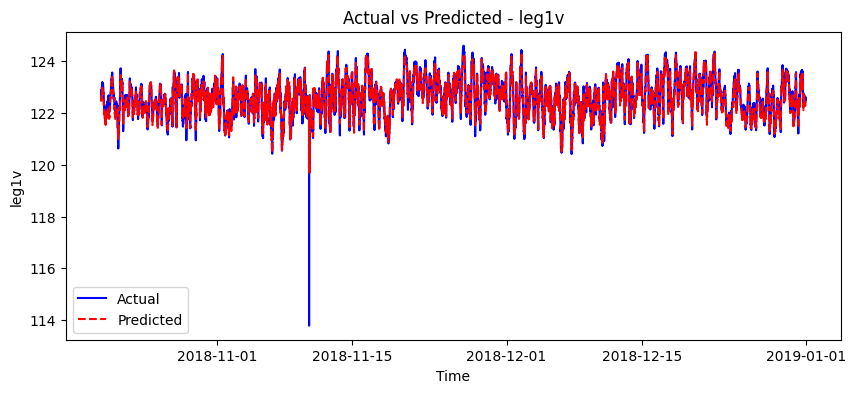

Feature Importance for leg1v:
air1: 0.0134
bathroom1: 0.0005
car1: 0.0013
clotheswasher1: 0.0010
dishwasher1: 0.0024
drye1: 0.0017
furnace1: 0.0038
grid: 0.0024
kitchenapp1: 0.0008
kitchenapp2: 0.0013
microwave1: 0.0009
refrigerator1: 0.0012
solar: 0.0019
leg2v: 0.2472
air1_lag1: 0.0319
air1_lag2: 0.0012
air1_rolling_mean: 0.0109
bathroom1_lag1: 0.0003
bathroom1_lag2: 0.0004
bathroom1_rolling_mean: 0.0005
car1_lag1: 0.0013
car1_lag2: 0.0010
car1_rolling_mean: 0.0013
clotheswasher1_lag1: 0.0010
clotheswasher1_lag2: 0.0003
clotheswasher1_rolling_mean: 0.0007
dishwasher1_lag1: 0.0019
dishwasher1_lag2: 0.0009
dishwasher1_rolling_mean: 0.0011
drye1_lag1: 0.0012
drye1_lag2: 0.0008
drye1_rolling_mean: 0.0013
furnace1_lag1: 0.0037
furnace1_lag2: 0.0048
furnace1_rolling_mean: 0.0019
grid_lag1: 0.0048
grid_lag2: 0.0011
grid_rolling_mean: 0.0009
kitchenapp1_lag1: 0.0008
kitchenapp1_lag2: 0.0009
kitchenapp1_rolling_mean: 0.0007
kitchenapp2_lag1: 0.0014
kitchenapp2_lag2: 0.0011
kitchenapp2_rolling_

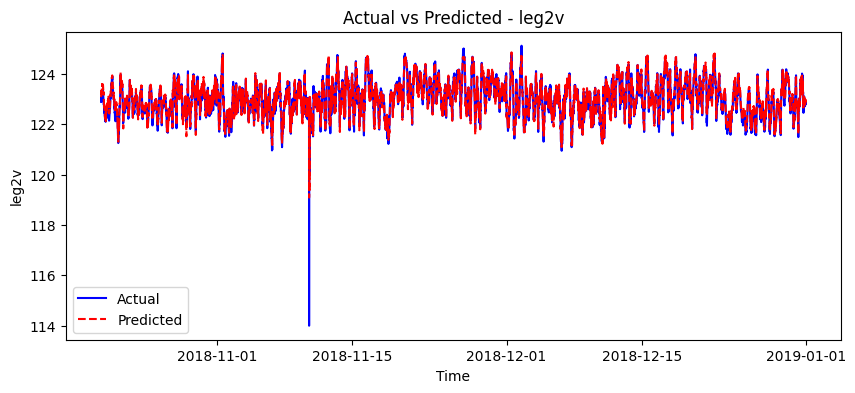

Feature Importance for leg2v:
air1: 0.0047
bathroom1: 0.0003
car1: 0.0016
clotheswasher1: 0.0007
dishwasher1: 0.0023
drye1: 0.0014
furnace1: 0.0027
grid: 0.0061
kitchenapp1: 0.0008
kitchenapp2: 0.0013
microwave1: 0.0010
refrigerator1: 0.0015
solar: 0.0014
leg1v: 0.2506
air1_lag1: 0.0040
air1_lag2: 0.0020
air1_rolling_mean: 0.0425
bathroom1_lag1: 0.0004
bathroom1_lag2: 0.0003
bathroom1_rolling_mean: 0.0003
car1_lag1: 0.0017
car1_lag2: 0.0010
car1_rolling_mean: 0.0014
clotheswasher1_lag1: 0.0008
clotheswasher1_lag2: 0.0005
clotheswasher1_rolling_mean: 0.0004
dishwasher1_lag1: 0.0022
dishwasher1_lag2: 0.0015
dishwasher1_rolling_mean: 0.0020
drye1_lag1: 0.0013
drye1_lag2: 0.0011
drye1_rolling_mean: 0.0010
furnace1_lag1: 0.0029
furnace1_lag2: 0.0048
furnace1_rolling_mean: 0.0025
grid_lag1: 0.0064
grid_lag2: 0.0009
grid_rolling_mean: 0.0009
kitchenapp1_lag1: 0.0009
kitchenapp1_lag2: 0.0011
kitchenapp1_rolling_mean: 0.0012
kitchenapp2_lag1: 0.0013
kitchenapp2_lag2: 0.0012
kitchenapp2_rolling_

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

if "dataid" in data.columns:
    data = data.drop(columns=["dataid"])

def create_lag_features(df, lags=2):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=2, min_periods=1).mean().shift(1)  # Fix leakage
    return df_lagged

data_lagged = create_lag_features(data, lags=2)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

results = {}

np.random.seed(42)

for target_col in data.columns:
    if target_col == "local_3min":
        continue

    feature_cols = [col for col in train.columns if col != "local_3min" and col != target_col and not col.startswith(target_col)]  # Fix feature leakage

    X_train, y_train = train[feature_cols], train[target_col]
    X_val, y_val = val[feature_cols], val[target_col]
    X_test, y_test = test[feature_cols], test[target_col]

    if X_train.shape[1] == 0:  # Ensure there are features
        print(f"Skipping {target_col} due to no valid features")
        continue

    noise_factor = 0.01 * np.std(y_train)
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)

    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=10,
        reg_alpha=2.0,
        reg_lambda=2.0,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0.1,
        verbosity=1
    )

    model.fit(
        X_train, y_train_noisy,
        eval_set=[(X_val, y_val)],
        #="mae",
        #early_stopping_rounds=30,
        verbose=50
    )

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    smape_score = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-8))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}

    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

    print(f"Feature Importance for {target_col}:")
    importance = model.feature_importances_
    for i, feat in enumerate(feature_cols):
        print(f"{feat}: {importance[i]:.4f}")

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))


[0]	validation_0-rmse:0.59093
[50]	validation_0-rmse:0.36689
[100]	validation_0-rmse:0.23282
[150]	validation_0-rmse:0.15286
[200]	validation_0-rmse:0.10781
[250]	validation_0-rmse:0.08286
[300]	validation_0-rmse:0.07004
[350]	validation_0-rmse:0.06280
[400]	validation_0-rmse:0.05918
[450]	validation_0-rmse:0.05685
[499]	validation_0-rmse:0.05561


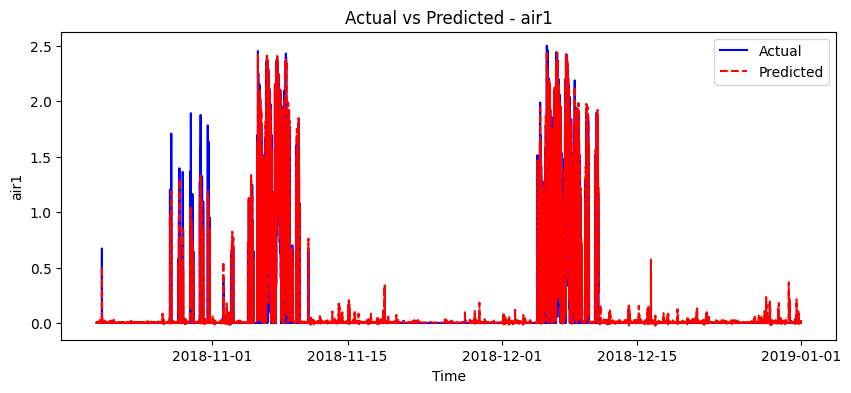

Feature Importance for air1:
bathroom1: 0.0146
car1: 0.0152
clotheswasher1: 0.0090
dishwasher1: 0.0009
drye1: 0.1469
furnace1: 0.0723
grid: 0.0070
kitchenapp1: 0.0022
kitchenapp2: 0.0015
microwave1: 0.0008
refrigerator1: 0.0005
solar: 0.0057
leg1v: 0.0087
leg2v: 0.0054
air1_rolling_mean: 0.2842
bathroom1_lag1: 0.0032
bathroom1_lag2: 0.0004
bathroom1_rolling_mean: 0.0023
car1_lag1: 0.0117
car1_lag2: 0.0071
car1_rolling_mean: 0.0084
clotheswasher1_lag1: 0.0034
clotheswasher1_lag2: 0.0063
clotheswasher1_rolling_mean: 0.0049
dishwasher1_lag1: 0.0009
dishwasher1_lag2: 0.0009
dishwasher1_rolling_mean: 0.0013
drye1_lag1: 0.1833
drye1_lag2: 0.0032
drye1_rolling_mean: 0.0223
furnace1_lag1: 0.1092
furnace1_lag2: 0.0025
furnace1_rolling_mean: 0.0074
grid_lag1: 0.0052
grid_lag2: 0.0030
grid_rolling_mean: 0.0010
kitchenapp1_lag1: 0.0003
kitchenapp1_lag2: 0.0003
kitchenapp1_rolling_mean: 0.0038
kitchenapp2_lag1: 0.0009
kitchenapp2_lag2: 0.0010
kitchenapp2_rolling_mean: 0.0015
microwave1_lag1: 0.0006

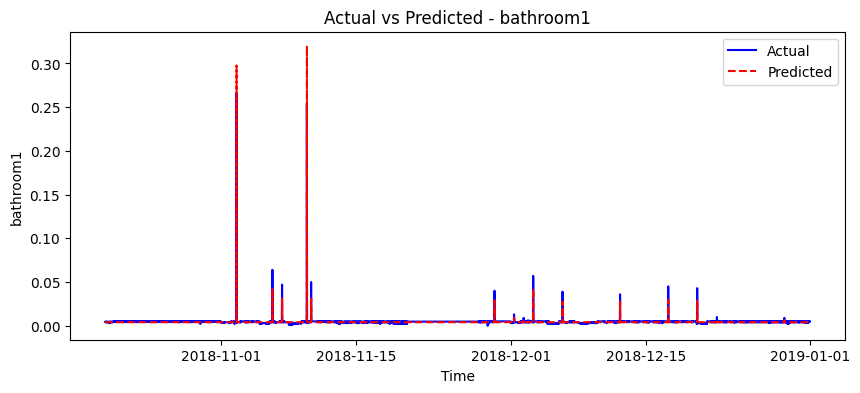

Feature Importance for bathroom1:
air1: 0.0160
car1: 0.0417
clotheswasher1: 0.0758
dishwasher1: 0.0141
drye1: 0.0125
furnace1: 0.0000
grid: 0.0120
kitchenapp1: 0.0173
kitchenapp2: 0.0000
microwave1: 0.0373
refrigerator1: 0.0000
solar: 0.0397
leg1v: 0.0290
leg2v: 0.0000
air1_lag1: 0.0104
air1_lag2: 0.0126
air1_rolling_mean: 0.0071
bathroom1_rolling_mean: 0.0718
car1_lag1: 0.0304
car1_lag2: 0.0174
car1_rolling_mean: 0.0368
clotheswasher1_lag1: 0.0635
clotheswasher1_lag2: 0.0432
clotheswasher1_rolling_mean: 0.1188
dishwasher1_lag1: 0.0194
dishwasher1_lag2: 0.0179
dishwasher1_rolling_mean: 0.0146
drye1_lag1: 0.0073
drye1_lag2: 0.0000
drye1_rolling_mean: 0.0098
furnace1_lag1: 0.0000
furnace1_lag2: 0.0000
furnace1_rolling_mean: 0.0000
grid_lag1: 0.0000
grid_lag2: 0.0107
grid_rolling_mean: 0.0155
kitchenapp1_lag1: 0.0091
kitchenapp1_lag2: 0.0080
kitchenapp1_rolling_mean: 0.0095
kitchenapp2_lag1: 0.0000
kitchenapp2_lag2: 0.0000
kitchenapp2_rolling_mean: 0.0000
microwave1_lag1: 0.0240
microwave

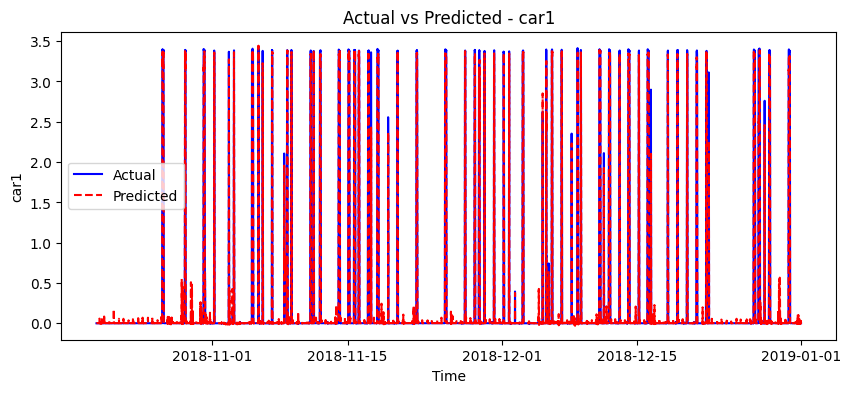

Feature Importance for car1:
air1: 0.0425
bathroom1: 0.0014
clotheswasher1: 0.0091
dishwasher1: 0.0028
drye1: 0.0462
furnace1: 0.0048
grid: 0.0649
kitchenapp1: 0.0027
kitchenapp2: 0.0016
microwave1: 0.0039
refrigerator1: 0.0004
solar: 0.0059
leg1v: 0.0009
leg2v: 0.0004
air1_lag1: 0.0889
air1_lag2: 0.0365
air1_rolling_mean: 0.0819
bathroom1_lag1: 0.0008
bathroom1_lag2: 0.0024
bathroom1_rolling_mean: 0.0050
car1_rolling_mean: 0.3607
clotheswasher1_lag1: 0.0030
clotheswasher1_lag2: 0.0026
clotheswasher1_rolling_mean: 0.0020
dishwasher1_lag1: 0.0032
dishwasher1_lag2: 0.0072
dishwasher1_rolling_mean: 0.0014
drye1_lag1: 0.0245
drye1_lag2: 0.0048
drye1_rolling_mean: 0.0316
furnace1_lag1: 0.0016
furnace1_lag2: 0.0009
furnace1_rolling_mean: 0.0016
grid_lag1: 0.0673
grid_lag2: 0.0200
grid_rolling_mean: 0.0126
kitchenapp1_lag1: 0.0017
kitchenapp1_lag2: 0.0014
kitchenapp1_rolling_mean: 0.0031
kitchenapp2_lag1: 0.0022
kitchenapp2_lag2: 0.0042
kitchenapp2_rolling_mean: 0.0034
microwave1_lag1: 0.0005

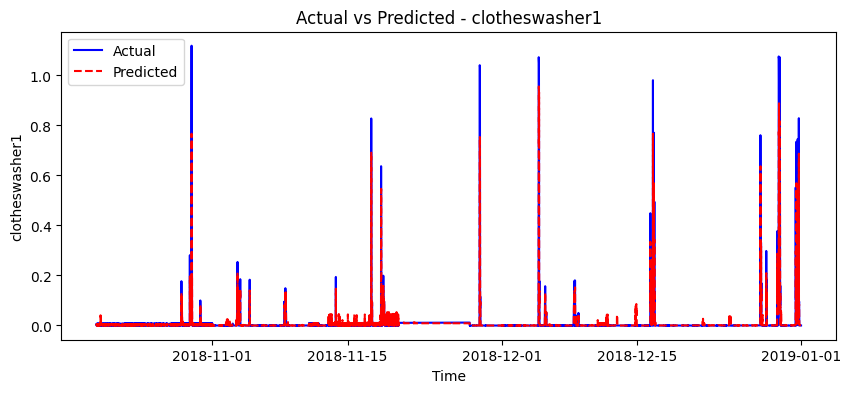

Feature Importance for clotheswasher1:
air1: 0.0196
bathroom1: 0.0200
car1: 0.0406
dishwasher1: 0.0122
drye1: 0.0292
furnace1: 0.0066
grid: 0.0037
kitchenapp1: 0.0070
kitchenapp2: 0.0100
microwave1: 0.0133
refrigerator1: 0.0101
solar: 0.0064
leg1v: 0.0317
leg2v: 0.0035
air1_lag1: 0.0142
air1_lag2: 0.0100
air1_rolling_mean: 0.0121
bathroom1_lag1: 0.0356
bathroom1_lag2: 0.0065
bathroom1_rolling_mean: 0.0095
car1_lag1: 0.0507
car1_lag2: 0.0055
car1_rolling_mean: 0.0559
clotheswasher1_rolling_mean: 0.1265
dishwasher1_lag1: 0.0132
dishwasher1_lag2: 0.0374
dishwasher1_rolling_mean: 0.0343
drye1_lag1: 0.0260
drye1_lag2: 0.0393
drye1_rolling_mean: 0.0258
furnace1_lag1: 0.0205
furnace1_lag2: 0.0220
furnace1_rolling_mean: 0.0392
grid_lag1: 0.0032
grid_lag2: 0.0023
grid_rolling_mean: 0.0027
kitchenapp1_lag1: 0.0089
kitchenapp1_lag2: 0.0032
kitchenapp1_rolling_mean: 0.0045
kitchenapp2_lag1: 0.0135
kitchenapp2_lag2: 0.0111
kitchenapp2_rolling_mean: 0.0181
microwave1_lag1: 0.0188
microwave1_lag2: 0.

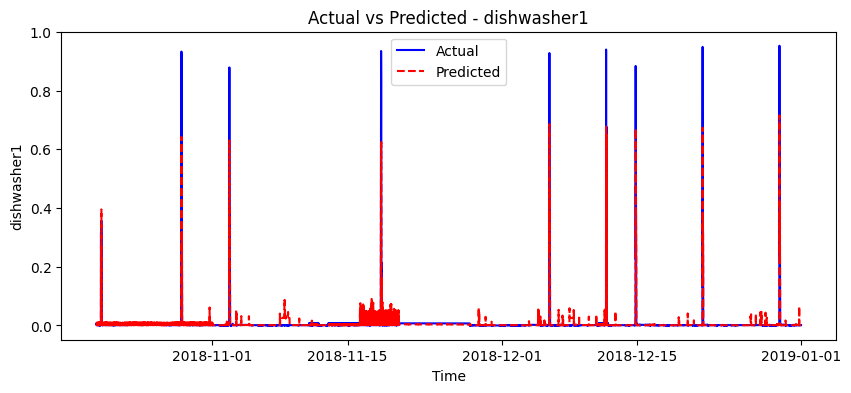

Feature Importance for dishwasher1:
air1: 0.0105
bathroom1: 0.0120
car1: 0.0188
clotheswasher1: 0.0169
drye1: 0.0108
furnace1: 0.0110
grid: 0.0094
kitchenapp1: 0.0115
kitchenapp2: 0.0231
microwave1: 0.0119
refrigerator1: 0.0054
solar: 0.0166
leg1v: 0.0185
leg2v: 0.0148
air1_lag1: 0.0000
air1_lag2: 0.0215
air1_rolling_mean: 0.0027
bathroom1_lag1: 0.0086
bathroom1_lag2: 0.0061
bathroom1_rolling_mean: 0.0101
car1_lag1: 0.0171
car1_lag2: 0.0150
car1_rolling_mean: 0.0114
clotheswasher1_lag1: 0.0177
clotheswasher1_lag2: 0.0044
clotheswasher1_rolling_mean: 0.0067
dishwasher1_rolling_mean: 0.2451
drye1_lag1: 0.0062
drye1_lag2: 0.0088
drye1_rolling_mean: 0.0092
furnace1_lag1: 0.0081
furnace1_lag2: 0.0089
furnace1_rolling_mean: 0.0137
grid_lag1: 0.0105
grid_lag2: 0.0078
grid_rolling_mean: 0.0059
kitchenapp1_lag1: 0.0193
kitchenapp1_lag2: 0.0196
kitchenapp1_rolling_mean: 0.0431
kitchenapp2_lag1: 0.0149
kitchenapp2_lag2: 0.0200
kitchenapp2_rolling_mean: 0.0177
microwave1_lag1: 0.0180
microwave1_la

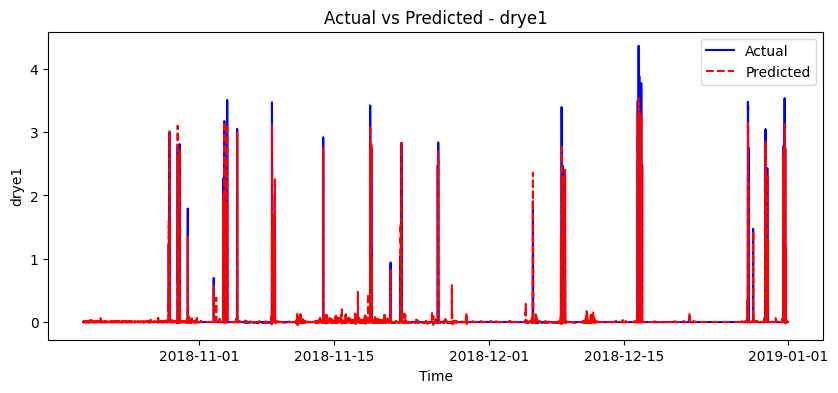

Feature Importance for drye1:
air1: 0.0370
bathroom1: 0.0045
car1: 0.0368
clotheswasher1: 0.0340
dishwasher1: 0.0049
furnace1: 0.0121
grid: 0.0228
kitchenapp1: 0.0045
kitchenapp2: 0.0078
microwave1: 0.0027
refrigerator1: 0.0011
solar: 0.0105
leg1v: 0.0053
leg2v: 0.0022
air1_lag1: 0.0462
air1_lag2: 0.0414
air1_rolling_mean: 0.0752
bathroom1_lag1: 0.0043
bathroom1_lag2: 0.0056
bathroom1_rolling_mean: 0.0076
car1_lag1: 0.0389
car1_lag2: 0.0433
car1_rolling_mean: 0.0405
clotheswasher1_lag1: 0.0136
clotheswasher1_lag2: 0.0022
clotheswasher1_rolling_mean: 0.0353
dishwasher1_lag1: 0.0021
dishwasher1_lag2: 0.0042
dishwasher1_rolling_mean: 0.0017
drye1_rolling_mean: 0.2740
furnace1_lag1: 0.0180
furnace1_lag2: 0.0147
furnace1_rolling_mean: 0.0083
grid_lag1: 0.0172
grid_lag2: 0.0070
grid_rolling_mean: 0.0088
kitchenapp1_lag1: 0.0059
kitchenapp1_lag2: 0.0068
kitchenapp1_rolling_mean: 0.0055
kitchenapp2_lag1: 0.0039
kitchenapp2_lag2: 0.0026
kitchenapp2_rolling_mean: 0.0012
microwave1_lag1: 0.0029
m

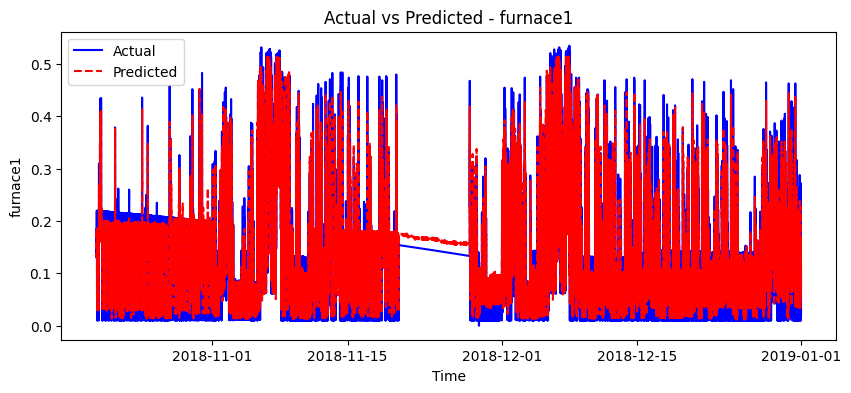

Feature Importance for furnace1:
air1: 0.1860
bathroom1: 0.0041
car1: 0.0046
clotheswasher1: 0.0452
dishwasher1: 0.0120
drye1: 0.0237
grid: 0.0060
kitchenapp1: 0.0031
kitchenapp2: 0.0137
microwave1: 0.0040
refrigerator1: 0.0020
solar: 0.0036
leg1v: 0.0000
leg2v: 0.0000
air1_lag1: 0.2349
air1_lag2: 0.0029
air1_rolling_mean: 0.1011
bathroom1_lag1: 0.0052
bathroom1_lag2: 0.0030
bathroom1_rolling_mean: 0.0021
car1_lag1: 0.0010
car1_lag2: 0.0000
car1_rolling_mean: 0.0000
clotheswasher1_lag1: 0.0242
clotheswasher1_lag2: 0.0059
clotheswasher1_rolling_mean: 0.0153
dishwasher1_lag1: 0.0081
dishwasher1_lag2: 0.0025
dishwasher1_rolling_mean: 0.0049
drye1_lag1: 0.0035
drye1_lag2: 0.0026
drye1_rolling_mean: 0.0022
furnace1_rolling_mean: 0.2030
grid_lag1: 0.0087
grid_lag2: 0.0019
grid_rolling_mean: 0.0049
kitchenapp1_lag1: 0.0030
kitchenapp1_lag2: 0.0019
kitchenapp1_rolling_mean: 0.0038
kitchenapp2_lag1: 0.0099
kitchenapp2_lag2: 0.0032
kitchenapp2_rolling_mean: 0.0044
microwave1_lag1: 0.0033
microwa

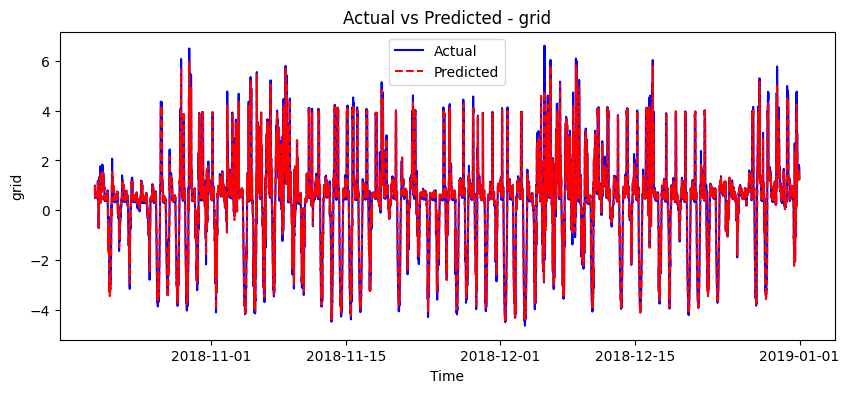

Feature Importance for grid:
air1: 0.0580
bathroom1: 0.0001
car1: 0.0292
clotheswasher1: 0.0012
dishwasher1: 0.0006
drye1: 0.0097
furnace1: 0.0140
kitchenapp1: 0.0010
kitchenapp2: 0.0008
microwave1: 0.0005
refrigerator1: 0.0004
solar: 0.1231
leg1v: 0.0074
leg2v: 0.0152
air1_lag1: 0.1047
air1_lag2: 0.0050
air1_rolling_mean: 0.0468
bathroom1_lag1: 0.0001
bathroom1_lag2: 0.0002
bathroom1_rolling_mean: 0.0002
car1_lag1: 0.0550
car1_lag2: 0.0125
car1_rolling_mean: 0.0229
clotheswasher1_lag1: 0.0019
clotheswasher1_lag2: 0.0009
clotheswasher1_rolling_mean: 0.0020
dishwasher1_lag1: 0.0004
dishwasher1_lag2: 0.0004
dishwasher1_rolling_mean: 0.0006
drye1_lag1: 0.0085
drye1_lag2: 0.0017
drye1_rolling_mean: 0.0114
furnace1_lag1: 0.0381
furnace1_lag2: 0.0012
furnace1_rolling_mean: 0.0002
grid_rolling_mean: 0.1621
kitchenapp1_lag1: 0.0019
kitchenapp1_lag2: 0.0030
kitchenapp1_rolling_mean: 0.0021
kitchenapp2_lag1: 0.0006
kitchenapp2_lag2: 0.0004
kitchenapp2_rolling_mean: 0.0003
microwave1_lag1: 0.0005

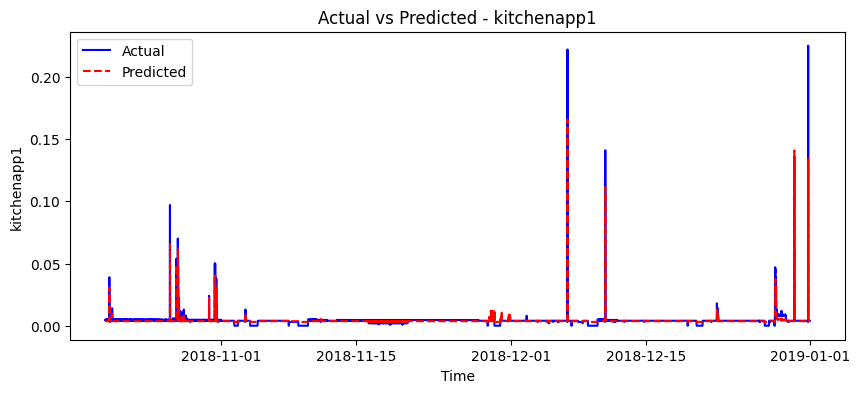

Feature Importance for kitchenapp1:
air1: 0.1007
bathroom1: 0.0946
car1: 0.0000
clotheswasher1: 0.0000
dishwasher1: 0.0355
drye1: 0.0000
furnace1: 0.0514
grid: 0.0000
kitchenapp2: 0.0000
microwave1: 0.0321
refrigerator1: 0.0000
solar: 0.0000
leg1v: 0.0000
leg2v: 0.0000
air1_lag1: 0.0000
air1_lag2: 0.0000
air1_rolling_mean: 0.0000
bathroom1_lag1: 0.0356
bathroom1_lag2: 0.0000
bathroom1_rolling_mean: 0.0000
car1_lag1: 0.0000
car1_lag2: 0.0000
car1_rolling_mean: 0.0505
clotheswasher1_lag1: 0.0000
clotheswasher1_lag2: 0.0000
clotheswasher1_rolling_mean: 0.0362
dishwasher1_lag1: 0.0255
dishwasher1_lag2: 0.0000
dishwasher1_rolling_mean: 0.0000
drye1_lag1: 0.0000
drye1_lag2: 0.1268
drye1_rolling_mean: 0.1328
furnace1_lag1: 0.0482
furnace1_lag2: 0.0000
furnace1_rolling_mean: 0.0000
grid_lag1: 0.0000
grid_lag2: 0.0000
grid_rolling_mean: 0.0000
kitchenapp1_rolling_mean: 0.1599
kitchenapp2_lag1: 0.0000
kitchenapp2_lag2: 0.0000
kitchenapp2_rolling_mean: 0.0000
microwave1_lag1: 0.0289
microwave1_la

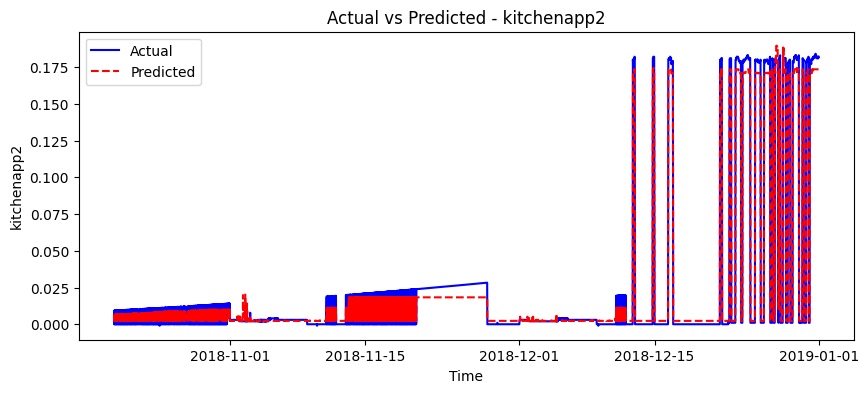

Feature Importance for kitchenapp2:
air1: 0.0227
bathroom1: 0.0289
car1: 0.0243
clotheswasher1: 0.0176
dishwasher1: 0.0079
drye1: 0.0055
furnace1: 0.0129
grid: 0.0162
kitchenapp1: 0.0256
microwave1: 0.0039
refrigerator1: 0.0000
solar: 0.0408
leg1v: 0.0294
leg2v: 0.0000
air1_lag1: 0.0252
air1_lag2: 0.0105
air1_rolling_mean: 0.0101
bathroom1_lag1: 0.0402
bathroom1_lag2: 0.0235
bathroom1_rolling_mean: 0.0292
car1_lag1: 0.0252
car1_lag2: 0.0210
car1_rolling_mean: 0.0163
clotheswasher1_lag1: 0.0137
clotheswasher1_lag2: 0.0000
clotheswasher1_rolling_mean: 0.0270
dishwasher1_lag1: 0.0109
dishwasher1_lag2: 0.0116
dishwasher1_rolling_mean: 0.0102
drye1_lag1: 0.0134
drye1_lag2: 0.0097
drye1_rolling_mean: 0.0000
furnace1_lag1: 0.0120
furnace1_lag2: 0.0212
furnace1_rolling_mean: 0.0158
grid_lag1: 0.0196
grid_lag2: 0.0380
grid_rolling_mean: 0.0309
kitchenapp1_lag1: 0.0230
kitchenapp1_lag2: 0.0131
kitchenapp1_rolling_mean: 0.0136
kitchenapp2_rolling_mean: 0.0848
microwave1_lag1: 0.0049
microwave1_la

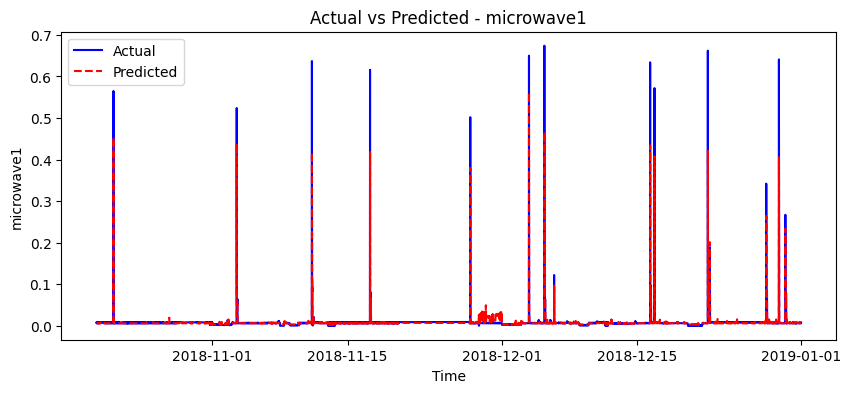

Feature Importance for microwave1:
air1: 0.0082
bathroom1: 0.0084
car1: 0.0049
clotheswasher1: 0.0114
dishwasher1: 0.0442
drye1: 0.0115
furnace1: 0.0288
grid: 0.0063
kitchenapp1: 0.0233
kitchenapp2: 0.0334
refrigerator1: 0.0085
solar: 0.0174
leg1v: 0.0136
leg2v: 0.0051
air1_lag1: 0.0149
air1_lag2: 0.0076
air1_rolling_mean: 0.0048
bathroom1_lag1: 0.0071
bathroom1_lag2: 0.0076
bathroom1_rolling_mean: 0.0081
car1_lag1: 0.0115
car1_lag2: 0.0054
car1_rolling_mean: 0.0112
clotheswasher1_lag1: 0.0165
clotheswasher1_lag2: 0.0043
clotheswasher1_rolling_mean: 0.0148
dishwasher1_lag1: 0.1101
dishwasher1_lag2: 0.0075
dishwasher1_rolling_mean: 0.0486
drye1_lag1: 0.0119
drye1_lag2: 0.0104
drye1_rolling_mean: 0.0100
furnace1_lag1: 0.0142
furnace1_lag2: 0.0174
furnace1_rolling_mean: 0.0240
grid_lag1: 0.0068
grid_lag2: 0.0122
grid_rolling_mean: 0.0090
kitchenapp1_lag1: 0.0193
kitchenapp1_lag2: 0.0276
kitchenapp1_rolling_mean: 0.0162
kitchenapp2_lag1: 0.0430
kitchenapp2_lag2: 0.0245
kitchenapp2_rolling_

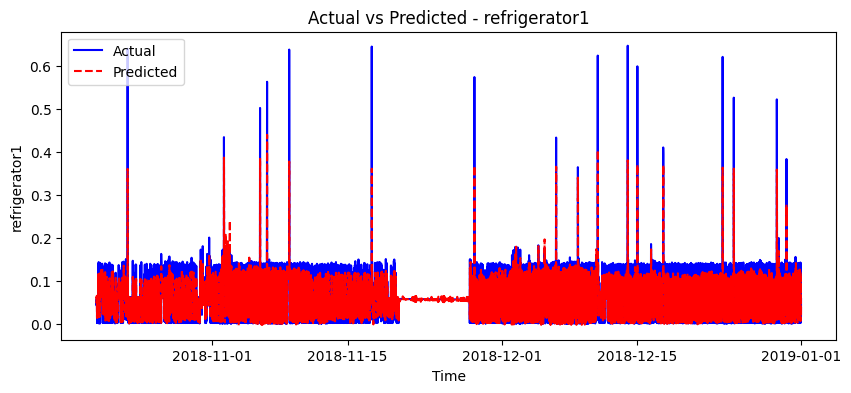

Feature Importance for refrigerator1:
air1: 0.0293
bathroom1: 0.0170
car1: 0.0339
clotheswasher1: 0.0099
dishwasher1: 0.0167
drye1: 0.0220
furnace1: 0.0080
grid: 0.0146
kitchenapp1: 0.0395
kitchenapp2: 0.0081
microwave1: 0.0128
solar: 0.0077
leg1v: 0.0109
leg2v: 0.0061
air1_lag1: 0.0365
air1_lag2: 0.0265
air1_rolling_mean: 0.0190
bathroom1_lag1: 0.0184
bathroom1_lag2: 0.0047
bathroom1_rolling_mean: 0.0124
car1_lag1: 0.0367
car1_lag2: 0.0068
car1_rolling_mean: 0.0157
clotheswasher1_lag1: 0.0161
clotheswasher1_lag2: 0.0137
clotheswasher1_rolling_mean: 0.0113
dishwasher1_lag1: 0.0221
dishwasher1_lag2: 0.0045
dishwasher1_rolling_mean: 0.0234
drye1_lag1: 0.0232
drye1_lag2: 0.0057
drye1_rolling_mean: 0.0299
furnace1_lag1: 0.0085
furnace1_lag2: 0.0053
furnace1_rolling_mean: 0.0055
grid_lag1: 0.0089
grid_lag2: 0.0064
grid_rolling_mean: 0.0097
kitchenapp1_lag1: 0.0377
kitchenapp1_lag2: 0.0302
kitchenapp1_rolling_mean: 0.0182
kitchenapp2_lag1: 0.0113
kitchenapp2_lag2: 0.0128
kitchenapp2_rolling_

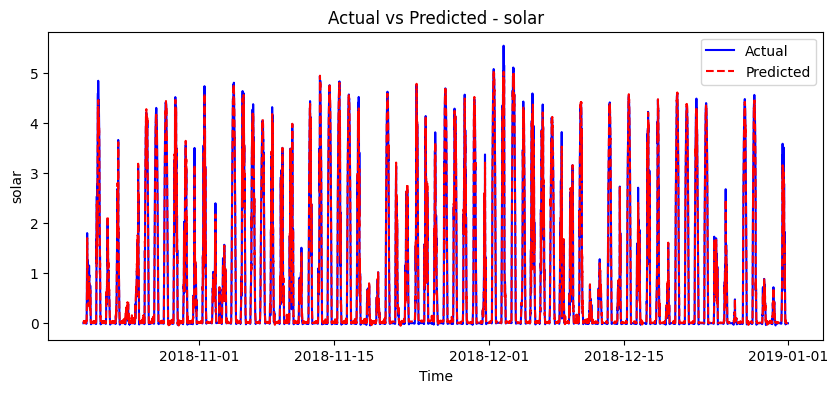

Feature Importance for solar:
air1: 0.0431
bathroom1: 0.0002
car1: 0.0033
clotheswasher1: 0.0054
dishwasher1: 0.0005
drye1: 0.0121
furnace1: 0.0035
grid: 0.0929
kitchenapp1: 0.0008
kitchenapp2: 0.0003
microwave1: 0.0017
refrigerator1: 0.0003
leg1v: 0.0020
leg2v: 0.0009
air1_lag1: 0.0325
air1_lag2: 0.0175
air1_rolling_mean: 0.0421
bathroom1_lag1: 0.0006
bathroom1_lag2: 0.0004
bathroom1_rolling_mean: 0.0004
car1_lag1: 0.0040
car1_lag2: 0.0028
car1_rolling_mean: 0.0033
clotheswasher1_lag1: 0.0018
clotheswasher1_lag2: 0.0004
clotheswasher1_rolling_mean: 0.0009
dishwasher1_lag1: 0.0006
dishwasher1_lag2: 0.0004
dishwasher1_rolling_mean: 0.0006
drye1_lag1: 0.0096
drye1_lag2: 0.0038
drye1_rolling_mean: 0.0056
furnace1_lag1: 0.0028
furnace1_lag2: 0.0024
furnace1_rolling_mean: 0.0018
grid_lag1: 0.1319
grid_lag2: 0.0326
grid_rolling_mean: 0.2077
kitchenapp1_lag1: 0.0002
kitchenapp1_lag2: 0.0007
kitchenapp1_rolling_mean: 0.0003
kitchenapp2_lag1: 0.0003
kitchenapp2_lag2: 0.0005
kitchenapp2_rolling_

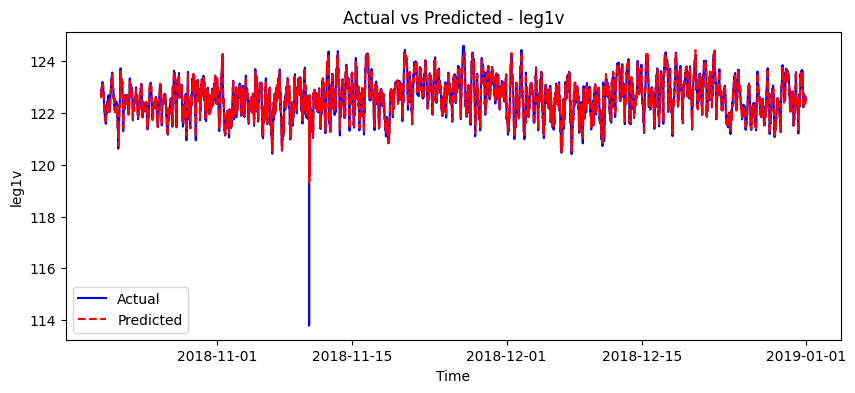

Feature Importance for leg1v:
air1: 0.0239
bathroom1: 0.0007
car1: 0.0008
clotheswasher1: 0.0014
dishwasher1: 0.0018
drye1: 0.0008
furnace1: 0.0040
grid: 0.0110
kitchenapp1: 0.0037
kitchenapp2: 0.0026
microwave1: 0.0018
refrigerator1: 0.0011
solar: 0.0071
leg2v: 0.1403
air1_lag1: 0.0931
air1_lag2: 0.0060
air1_rolling_mean: 0.0160
bathroom1_lag1: 0.0008
bathroom1_lag2: 0.0003
bathroom1_rolling_mean: 0.0062
car1_lag1: 0.0011
car1_lag2: 0.0019
car1_rolling_mean: 0.0010
clotheswasher1_lag1: 0.0006
clotheswasher1_lag2: 0.0006
clotheswasher1_rolling_mean: 0.0020
dishwasher1_lag1: 0.0020
dishwasher1_lag2: 0.0018
dishwasher1_rolling_mean: 0.0012
drye1_lag1: 0.0071
drye1_lag2: 0.0005
drye1_rolling_mean: 0.0050
furnace1_lag1: 0.0134
furnace1_lag2: 0.0033
furnace1_rolling_mean: 0.0014
grid_lag1: 0.0511
grid_lag2: 0.0007
grid_rolling_mean: 0.0080
kitchenapp1_lag1: 0.0016
kitchenapp1_lag2: 0.0038
kitchenapp1_rolling_mean: 0.0019
kitchenapp2_lag1: 0.0023
kitchenapp2_lag2: 0.0045
kitchenapp2_rolling_

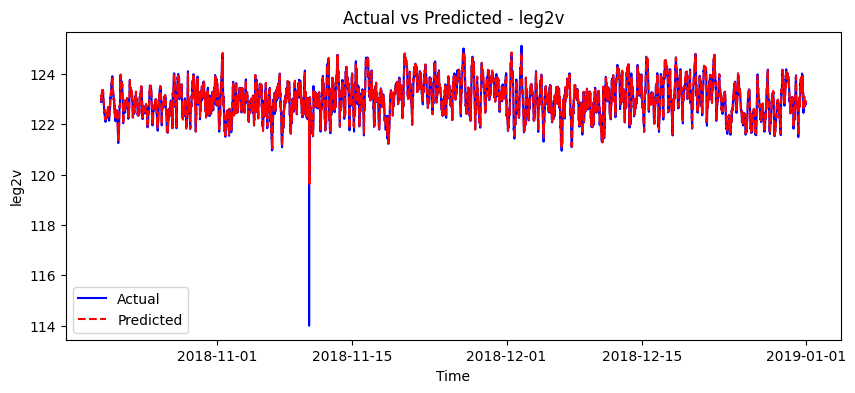

Feature Importance for leg2v:
air1: 0.0184
bathroom1: 0.0004
car1: 0.0016
clotheswasher1: 0.0017
dishwasher1: 0.0028
drye1: 0.0007
furnace1: 0.0032
grid: 0.0369
kitchenapp1: 0.0019
kitchenapp2: 0.0017
microwave1: 0.0023
refrigerator1: 0.0008
solar: 0.0063
leg1v: 0.2312
air1_lag1: 0.0772
air1_lag2: 0.0135
air1_rolling_mean: 0.0784
bathroom1_lag1: 0.0002
bathroom1_lag2: 0.0004
bathroom1_rolling_mean: 0.0004
car1_lag1: 0.0026
car1_lag2: 0.0018
car1_rolling_mean: 0.0008
clotheswasher1_lag1: 0.0016
clotheswasher1_lag2: 0.0007
clotheswasher1_rolling_mean: 0.0009
dishwasher1_lag1: 0.0025
dishwasher1_lag2: 0.0006
dishwasher1_rolling_mean: 0.0020
drye1_lag1: 0.0008
drye1_lag2: 0.0004
drye1_rolling_mean: 0.0006
furnace1_lag1: 0.0047
furnace1_lag2: 0.0110
furnace1_rolling_mean: 0.0031
grid_lag1: 0.0422
grid_lag2: 0.0007
grid_rolling_mean: 0.0016
kitchenapp1_lag1: 0.0006
kitchenapp1_lag2: 0.0004
kitchenapp1_rolling_mean: 0.0007
kitchenapp2_lag1: 0.0013
kitchenapp2_lag2: 0.0036
kitchenapp2_rolling_

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

if "dataid" in data.columns:
    data = data.drop(columns=["dataid"])

def create_lag_features(df, lags=2):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=2, min_periods=1).mean().shift(1)  # Fix leakage
    return df_lagged

data_lagged = create_lag_features(data, lags=2)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

results = {}

np.random.seed(42)

for target_col in data.columns:
    if target_col == "local_3min":
        continue

    feature_cols = [col for col in train.columns if col != "local_3min" and col != target_col and not col.startswith(f"{target_col}_lag")]

    X_train, y_train = train[feature_cols], train[target_col]
    X_val, y_val = val[feature_cols], val[target_col]
    X_test, y_test = test[feature_cols], test[target_col]

    if X_train.shape[1] == 0:  # Ensure there are features
        print(f"Skipping {target_col} due to no valid features")
        continue

    noise_factor = 0.01 * np.std(y_train)
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)

    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=10,
        reg_alpha=2.0,
        reg_lambda=2.0,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0.1,
        verbosity=0  # Reduce unnecessary logs
    )

    model.fit(
        X_train, y_train_noisy,
        eval_set=[(X_val, y_val)],
        #eval_metric=["rmse"],
        #early_stopping_rounds=30,
        verbose=50
    )

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    smape_score = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-8))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}

    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

    print(f"Feature Importance for {target_col}:")
    importance = model.feature_importances_
    for i, feat in enumerate(feature_cols):
        print(f"{feat}: {importance[i]:.4f}")

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))


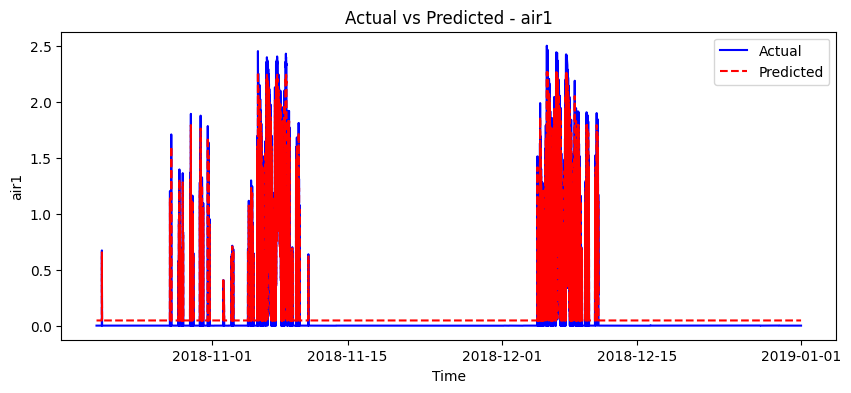

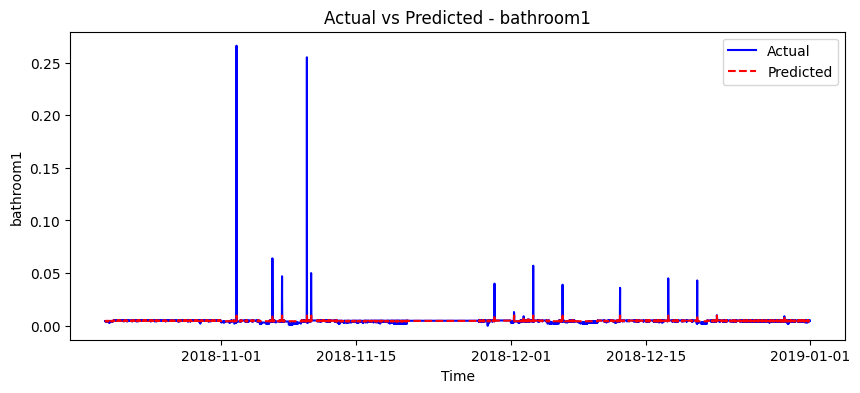

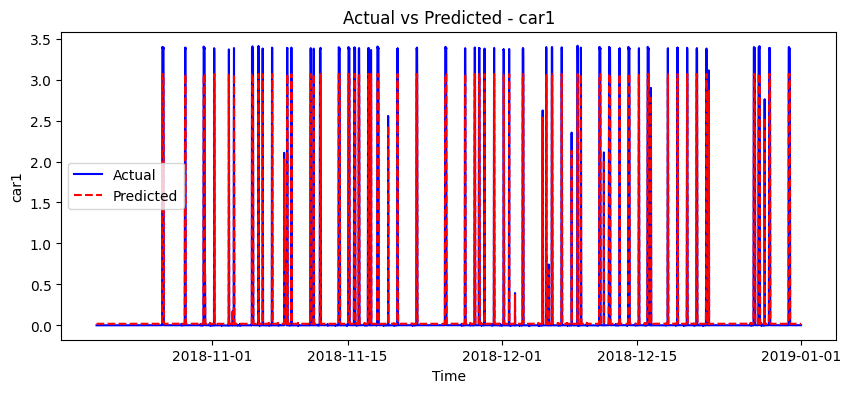

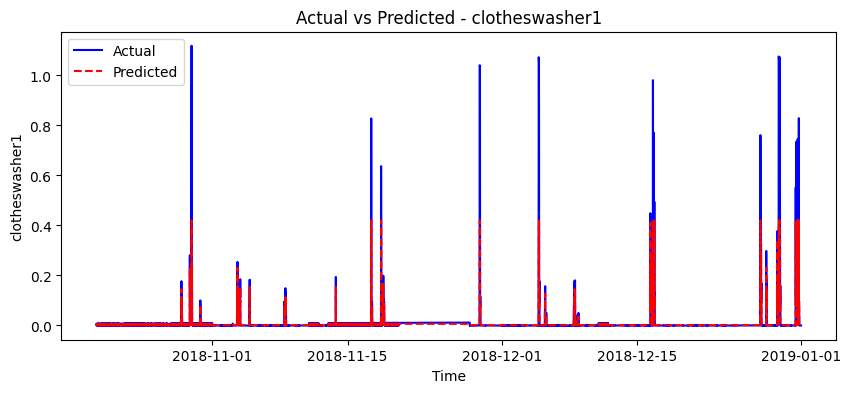

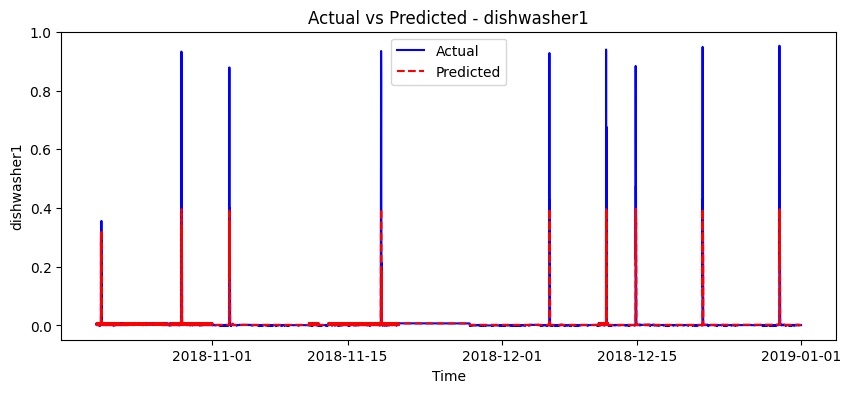

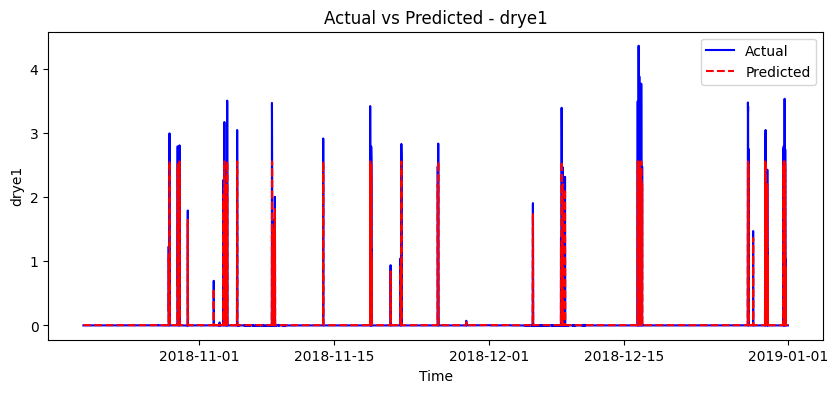

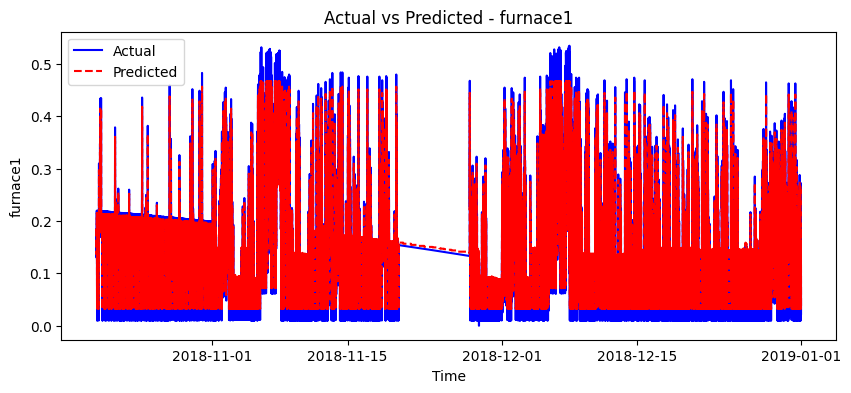

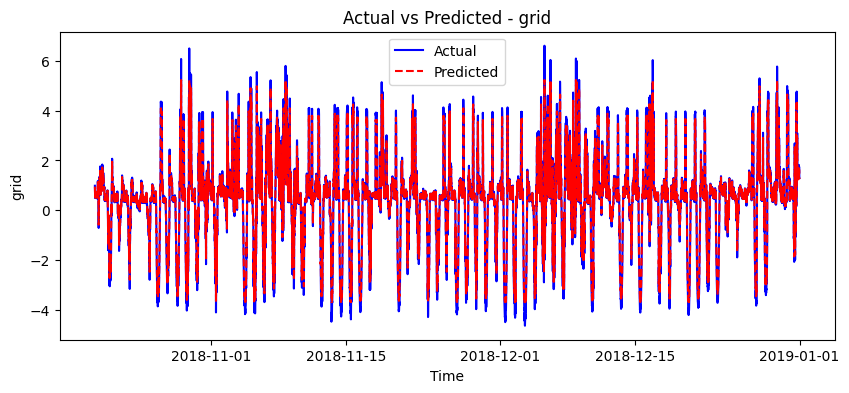

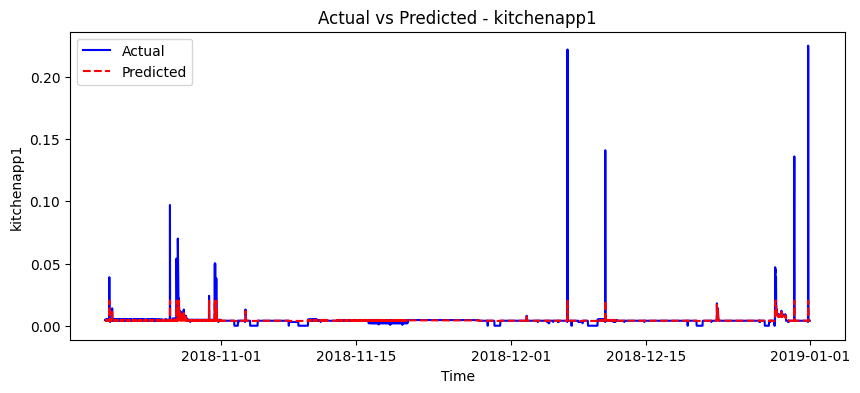

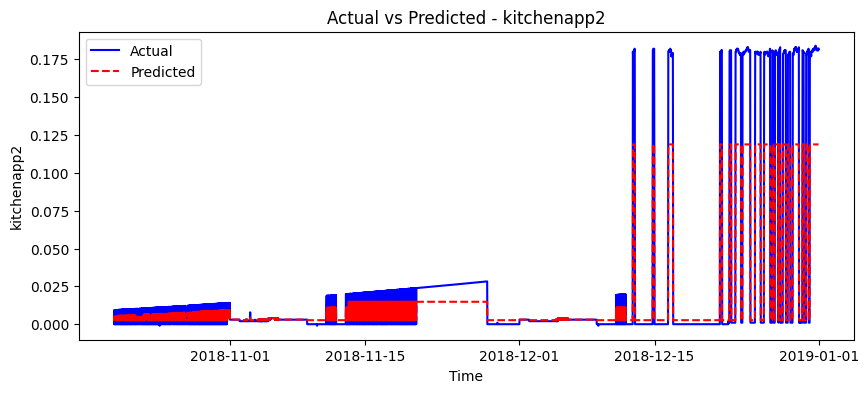

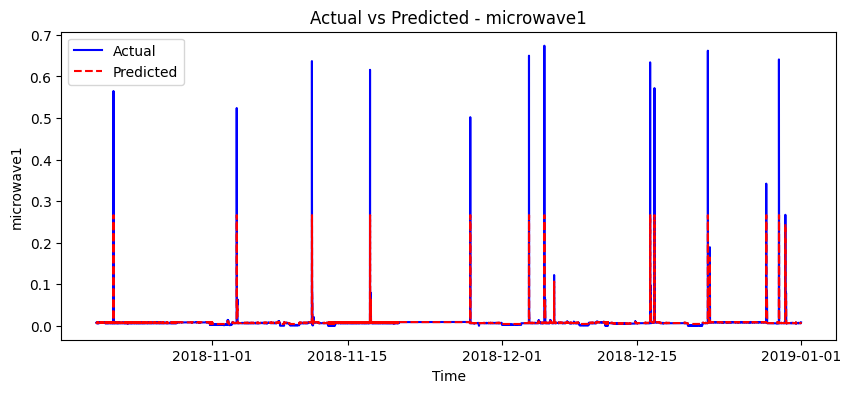

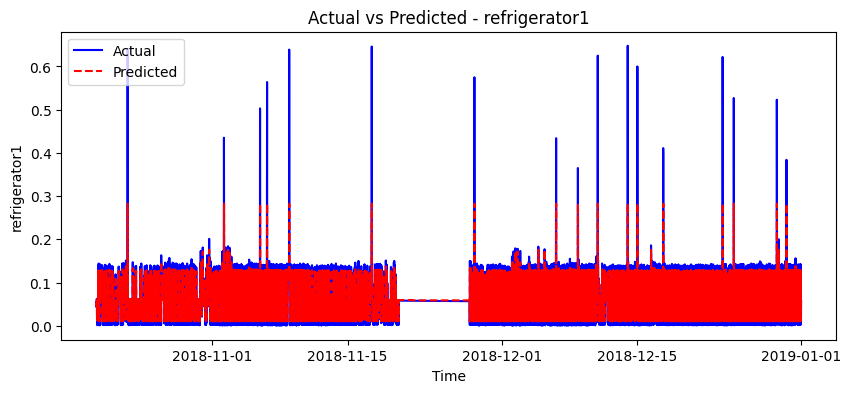

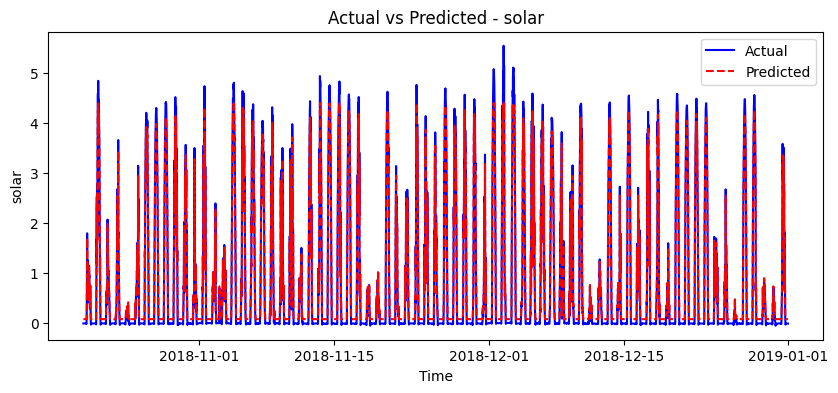

Final Model Evaluation Metrics:
           air1  bathroom1      car1  clotheswasher1  dishwasher1     drye1  \
MAE    0.047152   0.000431  0.034791        0.003836     0.001786  0.008760   
SMAPE  1.757251   0.083391  1.566816        1.396820     0.598254  1.846717   
RMSE   0.049917   0.003752  0.073958        0.031186     0.017140  0.045150   
R2     0.985366   0.106057  0.990707        0.744791     0.832308  0.976664   

       furnace1      grid  kitchenapp1  kitchenapp2  microwave1  \
MAE    0.010262  0.103734     0.000625     0.008949    0.001075   
SMAPE  0.226530  0.109922     0.185677     0.886498    0.143033   
RMSE   0.012793  0.158815     0.003736     0.019427    0.009865   
R2     0.985656  0.991909     0.366263     0.858878    0.823111   

       refrigerator1     solar  
MAE         0.004769  0.099313  
SMAPE       0.316956  1.201380  
RMSE        0.011594  0.122188  
R2          0.943005  0.991699  

🔹 Overall R² Score: 0.8151
⚠️ Model may be overfitting, consider tunin

In [ ]:
file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

data = data.drop(columns=["dataid", "leg1v", "leg2v"], errors="ignore")

def create_lag_features(df, lags=1):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=2).mean()
    return df_lagged

data_lagged = create_lag_features(data, lags=1)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

features = [col for col in train.columns if col != "local_3min"]

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

results = {}
overall_r2_scores = []

np.random.seed(42)

for target_col in data.columns:
    if target_col == "local_3min":
        continue

    X_train, y_train = train[features], train[target_col]
    X_val, y_val = val[features], val[target_col]
    X_test, y_test = test[features], test[target_col]
    
    noise_factor = 0.01 * np.std(y_train)
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)

    model = xgb.XGBRegressor(
        objective="reg:squarederror", 
        n_estimators=500,
        learning_rate=0.005,
        max_depth=5,
        min_child_weight=100,
        reg_alpha=80,
        reg_lambda=100,
        colsample_bytree=1.0,
        subsample=1.0,
        gamma=0,
        verbosity=0
    )
    
    model.fit(
        X_train, y_train_noisy, 
        eval_set=[(X_val, y_val)], 
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    smape_score = smape(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    overall_r2_scores.append(r2)
    
    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}
    
    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

overall_r2 = np.mean(overall_r2_scores)
is_generalized = overall_r2 > 0.85

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))

print(f"\n🔹 Overall R² Score: {overall_r2:.4f}")
if is_generalized:
    print("✅ Model is well-generalized, overfitting is minimal.")
else:
    print("⚠️ Model may be overfitting, consider tuning hyperparameters.")


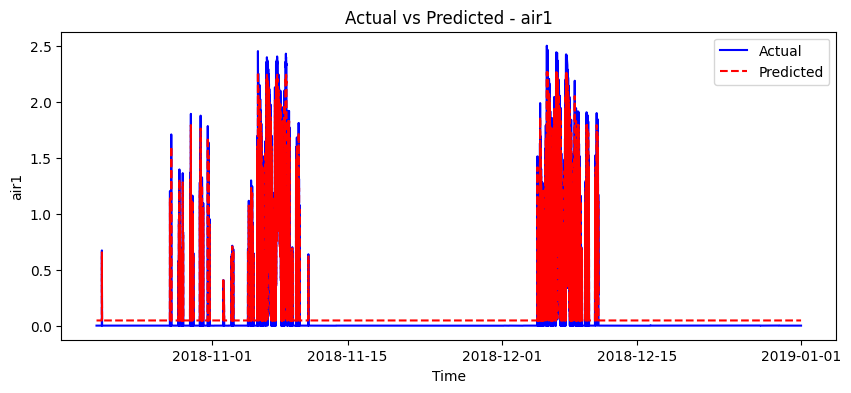

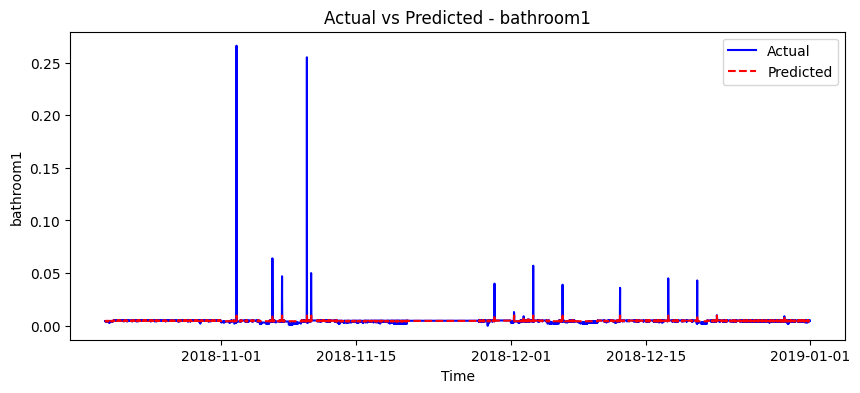

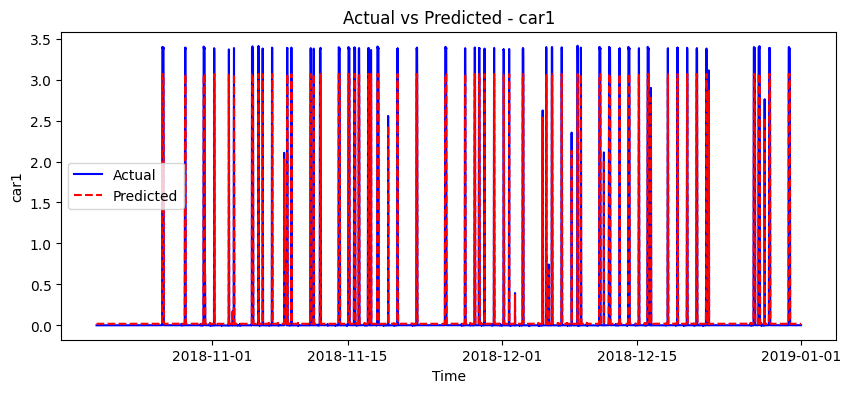

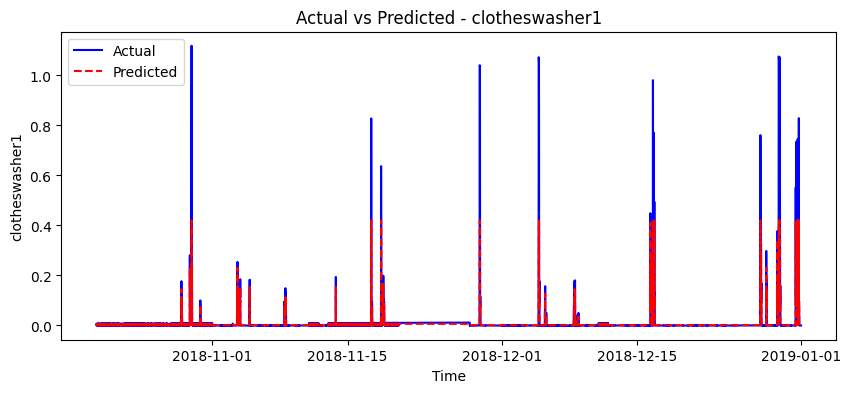

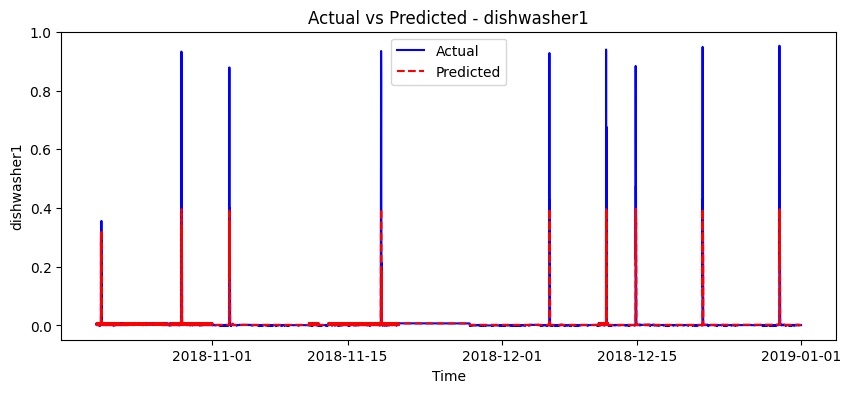

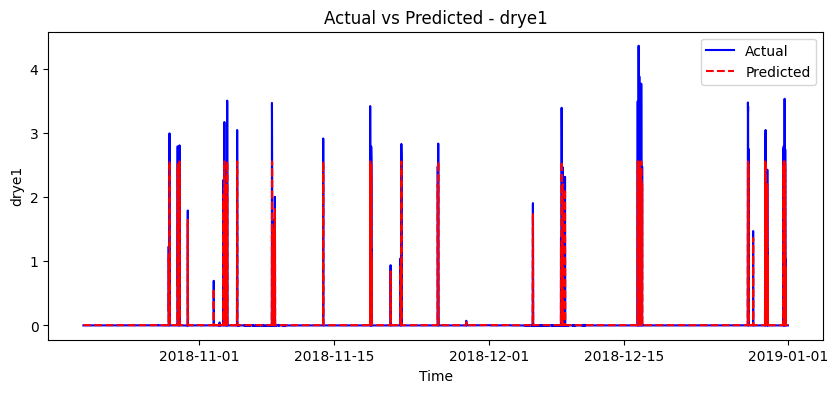

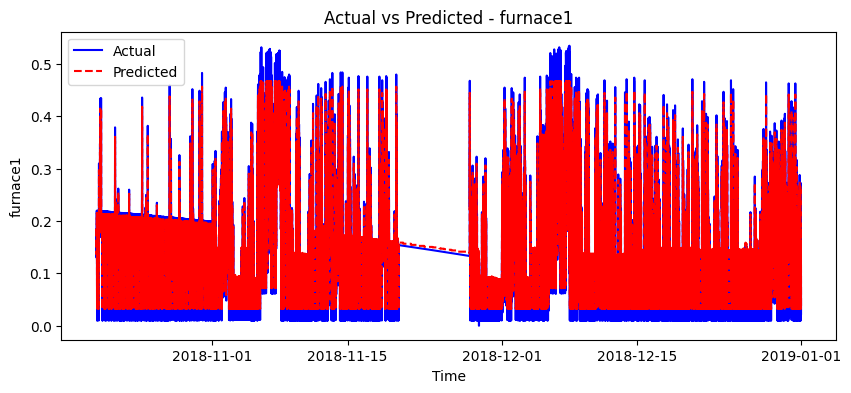

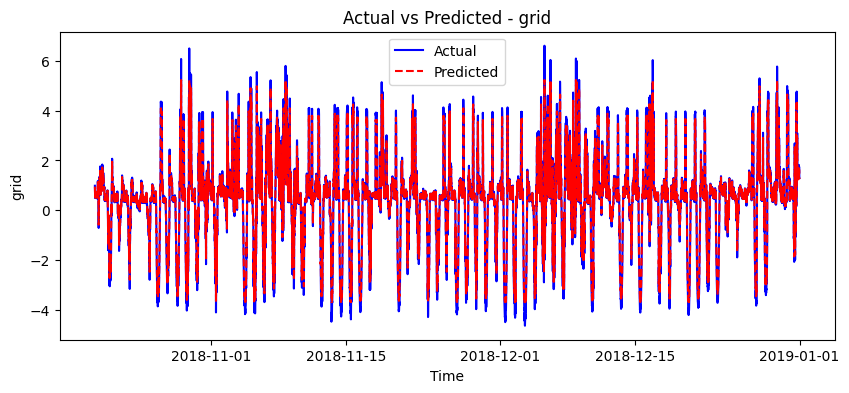

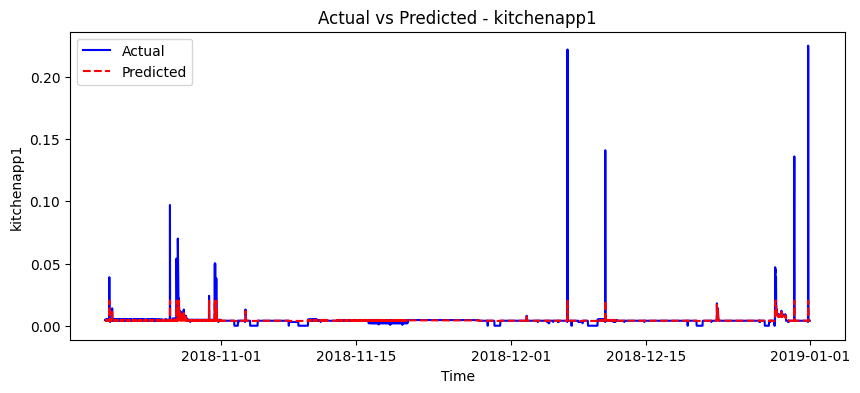

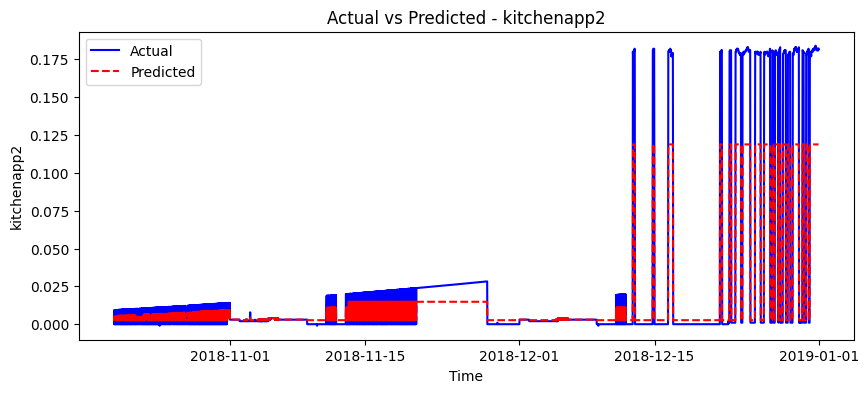

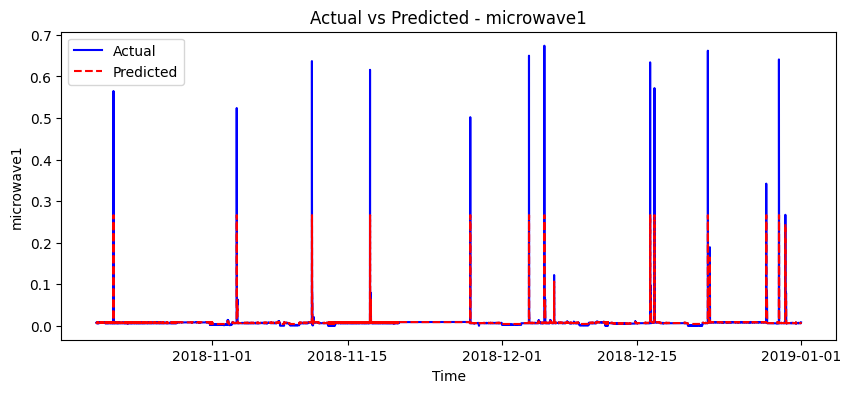

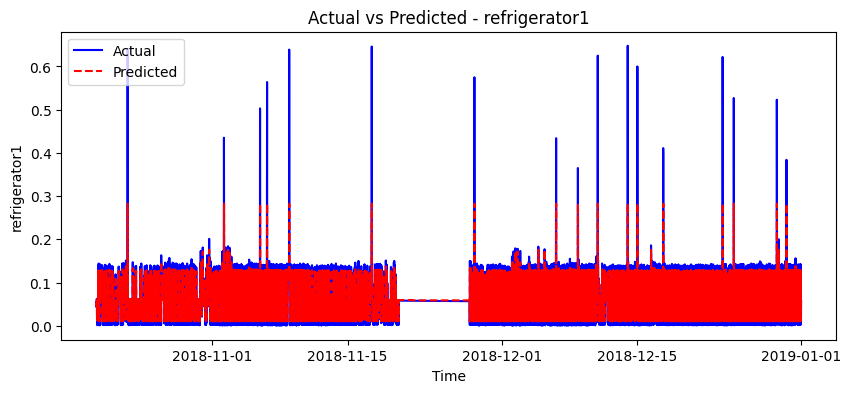

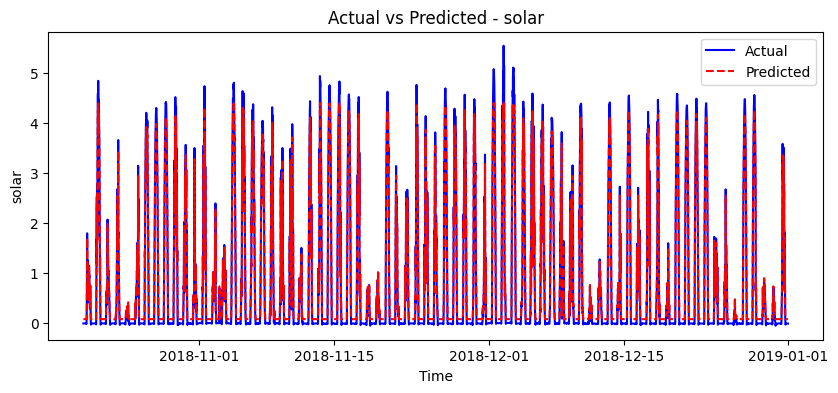

Final Model Evaluation Metrics:
           air1  bathroom1      car1  clotheswasher1  dishwasher1     drye1  \
MAE    0.047152   0.000431  0.034791        0.003836     0.001786  0.008760   
SMAPE  1.757251   0.083391  1.566816        1.396820     0.598254  1.846717   
RMSE   0.049917   0.003752  0.073958        0.031186     0.017140  0.045150   
R2     0.985366   0.106057  0.990707        0.744791     0.832308  0.976664   

       furnace1      grid  kitchenapp1  kitchenapp2  microwave1  \
MAE    0.010262  0.103734     0.000625     0.008949    0.001075   
SMAPE  0.226530  0.109922     0.185677     0.886498    0.143033   
RMSE   0.012793  0.158815     0.003736     0.019427    0.009865   
R2     0.985656  0.991909     0.366263     0.858878    0.823111   

       refrigerator1     solar  
MAE         0.004769  0.099313  
SMAPE       0.316956  1.201380  
RMSE        0.011594  0.122188  
R2          0.943005  0.991699  

🔹 Overall R² Score: 0.8151
⚠️ Model may be overfitting, consider tunin

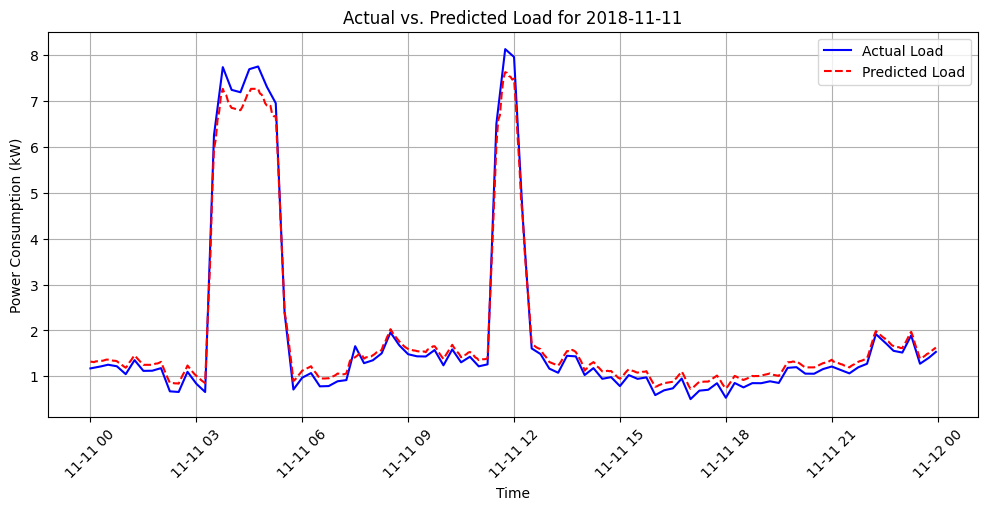

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "house_661_data4.csv"
data = pd.read_csv(file_path)

data["local_3min"] = pd.to_datetime(data["local_3min"], format="%d-%m-%Y %H:%M", errors="coerce")
data = data.dropna(subset=["local_3min"]).sort_values(by="local_3min").reset_index(drop=True)

data = data.drop(columns=["dataid", "leg1v", "leg2v"], errors="ignore")

def create_lag_features(df, lags=1):
    df_lagged = df.copy()
    for col in df.columns:
        if col != "local_3min":
            for lag in range(1, lags + 1):
                df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)
            df_lagged[f"{col}_rolling_mean"] = df[col].rolling(window=2).mean()
    return df_lagged

data_lagged = create_lag_features(data, lags=1)
data_lagged = data_lagged.dropna().reset_index(drop=True)

split_idx = int(len(data_lagged) * 0.8)
val_idx = int(split_idx * 0.9)
train, val, test = data_lagged.iloc[:val_idx], data_lagged.iloc[val_idx:split_idx], data_lagged.iloc[split_idx:]

features = [col for col in train.columns if col != "local_3min"]

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

results = {}
overall_r2_scores = []

np.random.seed(42)

y_pred_total = test[["local_3min"]].copy()
y_actual_total = test[["local_3min"]].copy()

for target_col in data.columns:
    if target_col == "local_3min":
        continue
    
    X_train, y_train = train[features], train[target_col]
    X_val, y_val = val[features], val[target_col]
    X_test, y_test = test[features], test[target_col]
    
    noise_factor = 0.01 * np.std(y_train)
    y_train_noisy = y_train + np.random.normal(0, noise_factor, y_train.shape)

    model = xgb.XGBRegressor(
        objective="reg:squarederror", 
        n_estimators=500,
        learning_rate=0.005,
        max_depth=5,
        min_child_weight=100,
        reg_alpha=80,
        reg_lambda=100,
        colsample_bytree=1.0,
        subsample=1.0,
        gamma=0,
        verbosity=0
    )
    
    model.fit(
        X_train, y_train_noisy, 
        eval_set=[(X_val, y_val)], 
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    smape_score = smape(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    overall_r2_scores.append(r2)
    
    results[target_col] = {"MAE": mae, "SMAPE": smape_score, "RMSE": rmse, "R2": r2}
    
    y_pred_total[target_col] = y_pred
    y_actual_total[target_col] = y_test.values
    
    plt.figure(figsize=(10, 4))
    plt.plot(test["local_3min"], y_test, label="Actual", color="blue")
    plt.plot(test["local_3min"], y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(target_col)
    plt.title(f"Actual vs Predicted - {target_col}")
    plt.legend()
    plt.show()

overall_r2 = np.mean(overall_r2_scores)
is_generalized = overall_r2 > 0.85

print("Final Model Evaluation Metrics:")
print(pd.DataFrame(results))

print(f"\n🔹 Overall R² Score: {overall_r2:.4f}")
if is_generalized:
    print("✅ Model is well-generalized, overfitting is minimal.")
else:
    print("⚠️ Model may be overfitting, consider tuning hyperparameters.")

y_pred_total["Total_Load_Predicted"] = y_pred_total.drop(columns=["local_3min"], errors="ignore").sum(axis=1)
y_actual_total["Total_Load_Actual"] = y_actual_total.drop(columns=["local_3min"], errors="ignore").sum(axis=1)

def plot_actual_vs_predicted(date_str):
    date_filtered_pred = y_pred_total[y_pred_total["local_3min"].dt.strftime('%Y-%m-%d') == date_str]
    date_filtered_actual = y_actual_total[y_actual_total["local_3min"].dt.strftime('%Y-%m-%d') == date_str]
    
    if date_filtered_pred.empty or date_filtered_actual.empty:
        print("No data available for the entered date.")
        return
    
    plt.figure(figsize=(12, 5))
    plt.plot(date_filtered_actual["local_3min"], date_filtered_actual["Total_Load_Actual"], label="Actual Load", color="blue")
    plt.plot(date_filtered_pred["local_3min"], date_filtered_pred["Total_Load_Predicted"], label="Predicted Load", color="red", linestyle='dashed')
    plt.xlabel("Time")
    plt.ylabel("Power Consumption (kW)")
    plt.title(f"Actual vs. Predicted Load for {date_str}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

user_date = input("Enter date in YYYY-MM-DD format: ")
plot_actual_vs_predicted(user_date)
